In [134]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [135]:
# Load the data
# df1 = pd.read_csv("muaBanNhaDat.csv")
# df1.head()

In [136]:
def convert_price(price_str):
    if not isinstance(price_str, str):
        # Handle cases where the value is not a string (e.g., NaN or numeric values)
        return np.nan
    try:
        if 'tỷ' in price_str:
            return float(price_str.replace(' tỷ', '').replace(',', '.')) * 1e9
        elif 'triệu' in price_str:
            return float(price_str.replace(' triệu', '').replace(',', '.')) * 1e6
        elif 'nghìn' in price_str:
            return float(price_str.replace(' nghìn', '').replace(',', '.')) * 1e3
        else:
            # Handle cases where the value is already numeric
            return float(price_str.replace(',', '.'))
    except ValueError:
        print(f"ValueError: Could not convert {price_str} to float.")
        return np.nan

In [137]:
import re
# Function to clean and convert room and toilet columns
def clean_rooms_toilets(value):
    if pd.isna(value):
        return 0
    value = str(value).lower()
    # Extract number if the string contains 'nhiều hơn'
    if 'nhiều hơn' in value:
        match = re.search(r'\d+', value)
        if match:
            return int(match.group(0))
    # Clean and convert the value
    return int(value.replace('phòng', '').strip())

In [138]:
def convert_district_to_districtId(district):
    # Mapping dictionary for district names to district IDs
    district_mapping = {
        "Quận 1": 1,
        "Quận 2": 2,
        "Quận 3": 3,
        "Quận 4": 4,
        "Quận 5": 5,
        "Quận 6": 6,
        "Quận 7": 7,
        "Quận 8": 8,
        "Quận 9": 9,
        "Quận 10": 10,
        "Quận 11": 11,
        "Quận 12": 12,
        "Quận Thủ Đức": 13,
        "Quận Bình Tân": 14,
        "Quận Bình Thạnh": 15,
        "Quận Gò Vấp": 16,
        "Quận Phú Nhuận": 17,
        "Quận Tân Bình": 18,
        "Quận Tân Phú": 19,
        "Huyện Bình Chánh": 20,
        "Huyện Cần Giờ": 21,
        "Huyện Củ Chi": 22,
        "Huyện Hóc Môn": 23,
        "Huyện Nhà Bè": 24,
    }
    
    # Check if the district name exists in the mapping dictionary
    return district_mapping.get(district, np.nan)  # Returns np.nan if district is not found


In [139]:
def convert_ward_to_wardId(ward, districtId):
    # Mapping dictionary for ward names to ward IDs
    ward_mapping = {
        ("Phường Bến Nghé", 1): 1,
        ("Phường Bến Thành", 1): 2,
        ("Phường Cầu Kho", 1): 3,
        ("Phường Cầu Ông Lãnh", 1): 4,
        ("Phường Cô Giang", 1): 5,
        ("Phường Đa Kao", 1): 6,
        ("Phường Nguyễn Cư Trinh", 1): 7,
        ("Phường Nguyễn Thái Bình", 1): 8,
        ("Phường Phạm Ngũ Lão", 1): 9,
        ("Phường Tân Định", 1): 10,

        ("Phường An Khánh", 2): 11,
        ("Phường An Lợi Đông", 2): 12,
        ("Phường An Phú", 2): 13,
        ("Phường Bình Trưng Đông", 2): 14,
        ("Phường Bình Trưng Tây", 2): 15,
        ("Phường Cát Lái", 2): 16,
        ("Phường Thạnh Mỹ Lợi", 2): 17,
        ("Phường Thảo Điền", 2): 18,
        ("Phường Thủ Thiêm", 2): 19,
        ("Phường Bình An", 2): 315,
        ("Phường Bình Khánh", 2): 316,

        ("Phường Võ Thị Sáu", 3): 20,
        ("Phường 1", 3): 21,
        ("Phường 2", 3): 22,
        ("Phường 3", 3): 23,
        ("Phường 4", 3): 24,
        ("Phường 5", 3): 25,
        ("Phường 9", 3): 26,
        ("Phường 10", 3): 27,
        ("Phường 11", 3): 28,
        ("Phường 12", 3): 29,
        ("Phường 13", 3): 30,
        ("Phường 14", 3): 31,

        ("Phường 1", 4): 32,
        ("Phường 2", 4): 33,
        ("Phường 3", 4): 34,
        ("Phường 4", 4): 35,
        ("Phường 6", 4): 36,
        ("Phường 8", 4): 37,
        ("Phường 9", 4): 38,
        ("Phường 10", 4): 39,
        ("Phường 13", 4): 40,
        ("Phường 14", 4): 41,
        ("Phường 15", 4): 42,
        ("Phường 16", 4): 43,
        ("Phường 18", 4): 44,
        
        ("Phường 1", 5): 45,
        ("Phường 2", 5): 46,
        ("Phường 3", 5): 47,
        ("Phường 4", 5): 48,
        ("Phường 5", 5): 49,
        ("Phường 6", 5): 50,
        ("Phường 7", 5): 51,
        ("Phường 8", 5): 52,
        ("Phường 9", 5): 53,
        ("Phường 10", 5): 54,
        ("Phường 11", 5): 55,
        ("Phường 12", 5): 56,
        ("Phường 13", 5): 57,
        ("Phường 14", 5): 58,

        ("Phường 1", 6): 59,
        ("Phường 2", 6): 60,
        ("Phường 3", 6): 61,
        ("Phường 4", 6): 62,
        ("Phường 5", 6): 63,
        ("Phường 6", 6): 64,
        ("Phường 7", 6): 65,
        ("Phường 8", 6): 66,
        ("Phường 9", 6): 67,
        ("Phường 10", 6): 68,
        ("Phường 11", 6): 69,
        ("Phường 12", 6): 70,
        ("Phường 13", 6): 71,
        ("Phường 14", 6): 72,

        ("Phường Bình Thuận", 7): 73,
        ("Phường Phú Mỹ", 7): 74,
        ("Phường Phú Thuận", 7): 75,
        ("Phường Tân Hưng", 7): 76,
        ("Phường Tân Kiểng", 7): 77,
        ("Phường Tân Phong", 7): 78,
        ("Phường Tân Phú", 7): 79,
        ("Phường Tân Quy", 7): 80,
        ("Phường Tân Thuận Đông", 7): 81,
        ("Phường Tân Thuận Tây", 7): 82,

        ("Phường 1", 8): 83,
        ("Phường 2", 8): 84,
        ("Phường 3", 8): 85,
        ("Phường 4", 8): 86,
        ("Phường 5", 8): 87,
        ("Phường 6", 8): 88,
        ("Phường 7", 8): 89,
        ("Phường 8", 8): 90,
        ("Phường 9", 8): 91,
        ("Phường 10", 8): 92,
        ("Phường 11", 8): 93,
        ("Phường 12", 8): 94,
        ("Phường 13", 8): 95,
        ("Phường 14", 8): 96,
        ("Phường 15", 8): 97,
        ("Phường 16", 8): 98,

        ("Phường Hiệp Phú", 9): 99,
        ("Phường Long Bình", 9): 100,
        ("Phường Long Phước", 9): 101,
        ("Phường Long Thạnh Mỹ", 9): 102,
        ("Phường Long Trường", 9): 103,
        ("Phường Phú Hữu", 9): 104,
        ("Phường Phước Bình", 9): 105,
        ("Phường Phước Long A", 9): 106,
        ("Phường Phước Long B", 9): 107,
        ("Phường Tân Phú", 9): 108,
        ("Phường Tăng Nhơn Phú A", 9): 109,
        ("Phường Tăng Nhơn Phú B", 9): 110,
        ("Phường Trường Thạnh", 9): 111,

        ("Phường 1", 10): 112,
        ("Phường 2", 10): 113,
        ("Phường 3", 10): 114,
        ("Phường 4", 10): 115,
        ("Phường 5", 10): 116,
        ("Phường 6", 10): 117,
        ("Phường 7", 10): 118,
        ("Phường 8", 10): 119,
        ("Phường 9", 10): 120,
        ("Phường 10", 10): 121,
        ("Phường 11", 10): 122,
        ("Phường 12", 10): 123,
        ("Phường 13", 10): 124,
        ("Phường 14", 10): 125,
        ("Phường 15", 10): 126,

        ("Phường 1", 11): 127,
        ("Phường 2", 11): 128,
        ("Phường 3", 11): 129,
        ("Phường 4", 11): 130,
        ("Phường 5", 11): 131,
        ("Phường 6", 11): 132,
        ("Phường 7", 11): 133,
        ("Phường 8", 11): 134,
        ("Phường 9", 11): 135,
        ("Phường 10", 11): 136,
        ("Phường 11", 11): 137,
        ("Phường 12", 11): 138,
        ("Phường 13", 11): 139,
        ("Phường 14", 11): 140,
        ("Phường 15", 11): 141,
        ("Phường 16", 11): 142,

        ("Phường Thới An", 12): 143,
        ("Phường Trung Mỹ Tây", 12): 144,
        ("Phường An Phú Đông", 12): 145,
        ("Phường Đông Hưng Thuận", 12): 146,
        ("Phường Hiệp Thành", 12): 147,
        ("Phường Tân Chánh Hiệp", 12): 148,
        ("Phường Tân Hưng Thuận", 12): 149,
        ("Phường Tân Thới Hiệp", 12): 150,
        ("Phường Tân Thới Nhất", 12): 151,
        ("Phường Thạnh Lộc", 12): 152,
        ("Phường Thạnh Xuân", 12): 153,

        ("Phường Bình Chiểu", 13): 154,
        ("Phường Bình Thọ", 13): 155,
        ("Phường Hiệp Bình Chánh", 13): 156,
        ("Phường Hiệp Bình Phước", 13): 157,
        ("Phường Linh Chiểu", 13): 158,
        ("Phường Linh Đông", 13): 159,
        ("Phường Linh Tây", 13): 160,
        ("Phường Linh Trung", 13): 161,
        ("Phường Linh Xuân", 13): 162,
        ("Phường Tam Bình", 13): 163,
        ("Phường Tam Phú", 13): 164,
        ("Phường Trường Thọ", 13): 165,

        ("Phường An Lạc", 14): 166,
        ("Phường An Lạc A", 14): 167,
        ("Phường Bình Hưng Hòa", 14): 168,
        ("Phường Bình Hưng Hoà A", 14): 169,
        ("Phường Bình Hưng Hoà B", 14): 170,
        ("Phường Bình Trị Đông", 14): 171,
        ("Phường Bình Trị Đông A", 14): 172,
        ("Phường Bình Trị Đông B", 14): 173,
        ("Phường Tân Tạo", 14): 174,
        ("Phường Tân Tạo A", 14): 175,

        ("Phường 1", 15): 176,
        ("Phường 2", 15): 177,
        ("Phường 3", 15): 178,
        ("Phường 5", 15): 179,
        ("Phường 6", 15): 180,
        ("Phường 7", 15): 181,
        ("Phường 11", 15): 182,
        ("Phường 12", 15): 183,
        ("Phường 13", 15): 184,
        ("Phường 14", 15): 185,
        ("Phường 15", 15): 186,
        ("Phường 17", 15): 187,
        ("Phường 19", 15): 188,
        ("Phường 21", 15): 189,
        ("Phường 22", 15): 190,
        ("Phường 24", 15): 191,
        ("Phường 25", 15): 192,
        ("Phường 26", 15): 193,
        ("Phường 27", 15): 194,
        ("Phường 28", 15): 195,

        ("Phường 1", 16): 196,
        ("Phường 3", 16): 197,
        ("Phường 4", 16): 198,
        ("Phường 5", 16): 199,
        ("Phường 6", 16): 200,
        ("Phường 7", 16): 201,
        ("Phường 8", 16): 202,
        ("Phường 9", 16): 203,
        ("Phường 10", 16): 204,
        ("Phường 11", 16): 205,
        ("Phường 12", 16): 206,
        ("Phường 13", 16): 207,
        ("Phường 14", 16): 208,
        ("Phường 15", 16): 209,
        ("Phường 16", 16): 210,
        ("Phường 17", 16): 211,

        ("Phường 1", 17): 212,
        ("Phường 2", 17): 213,
        ("Phường 3", 17): 214,
        ("Phường 4", 17): 215,
        ("Phường 5", 17): 216,
        ("Phường 7", 17): 217,
        ("Phường 8", 17): 218,
        ("Phường 9", 17): 219,
        ("Phường 10", 17): 220,
        ("Phường 11", 17): 221,
        ("Phường 13", 17): 222,
        ("Phường 15", 17): 223,
        ("Phường 17", 17): 224,

        ("Phường 1", 18): 226,
        ("Phường 2", 18): 227,
        ("Phường 3", 18): 228,
        ("Phường 4", 18): 229,
        ("Phường 5", 18): 230,
        ("Phường 6", 18): 231,
        ("Phường 7", 18): 232,
        ("Phường 8", 18): 233,
        ("Phường 9", 18): 234,
        ("Phường 10", 18): 235,
        ("Phường 11", 18): 236,
        ("Phường 12", 18): 237,
        ("Phường 13", 18): 238,
        ("Phường 14", 18): 239,
        ("Phường 15", 18): 225,

        ("Phường Hiệp Tân", 19): 240,
        ("Phường Hòa Thạnh", 19): 241,
        ("Phường Phú Thạnh", 19): 242,
        ("Phường Phú Thọ Hòa", 19): 243,
        ("Phường Phú Trung", 19): 244,
        ("Phường Sơn Kỳ", 19): 245,
        ("Phường Tân Quý", 19): 246,
        ("Phường Tân Sơn Nhì", 19): 247,
        ("Phường Tân Thành", 19): 248,
        ("Phường Tân Thới Hòa", 19): 249,
        ("Phường Tây Thạnh", 19): 250,

        ("Thị trấn Tân Túc", 20): 251,
        ("Xã An Phú Tây", 20): 252,
        ("Xã Bình Chánh", 20): 253,
        ("Xã Bình Hưng", 20): 254,
        ("Xã Bình Lợi", 20): 255,
        ("Xã Đa Phước", 20): 256,
        ("Xã Hưng Long", 20): 257,
        ("Xã Lê Minh Xuân", 20): 258,
        ("Xã Phạm Văn Hai", 20): 259,
        ("Xã Phong Phú", 20): 260,
        ("Xã Quy Đức", 20): 261,
        ("Xã Tân Kiên", 20): 262,
        ("Xã Tân Nhựt", 20): 263,
        ("Xã Tân Quý Tây", 20): 264,
        ("Xã Vĩnh Lộc A", 20): 265,
        ("Xã Vĩnh Lộc B", 20): 266,

        ("Thị trấn Cần Thạnh", 21): 267,
        ("Xã An Thới Đông", 21): 268,
        ("Xã Bình Khánh", 21): 269,
        ("Xã Long Hòa", 21): 270,
        ("Xã Lý Nhơn", 21): 271,
        ("Xã Tam Thôn Hiệp", 21): 272,
        ("Xã Thạnh An", 21): 273,

        ("Thị trấn Củ Chi", 22): 274,
        ("Xã An Nhơn Tây", 22): 275,
        ("Xã An Phú", 22): 276,
        ("Xã Bình Mỹ", 22): 277,
        ("Xã Hòa Phú", 22): 278,
        ("Xã Nhuận Đức", 22): 279,
        ("Xã Phạm Văn Cội", 22):280 ,
        ("Xã Phú Hòa Đông", 22): 281,
        ("Xã Phú Mỹ Hưng", 22): 282,
        ("Xã Phước Hiệp", 22): 283,
        ("Xã Phước Thạnh", 22): 284,
        ("Xã Phước Vĩnh An", 22): 285,
        ("Xã Tân An Hội", 22): 286,
        ("Xã Tân Phú Trung", 22): 287,
        ("Xã Tân Thạnh Đông", 22): 288,
        ("Xã Tân Thạnh Tây", 22): 289,
        ("Xã Tân Thông Hội", 22): 290,
        ("Xã Thái Mỹ", 22): 291,
        ("Xã Trung An", 22): 292,
        ("Xã Trung Lập Hạ", 22): 293,
        ("Xã Trung Lập Thượng", 22): 294,

        ("Thị trấn Hóc Môn", 23): 295,
        ("Xã Bà Điểm", 23): 296,
        ("Xã Đông Thạnh", 23): 297,
        ("Xã Nhị Bình", 23): 298,
        ("Xã Tân Hiệp", 23): 299,
        ("Xã Tân Thới Nhì", 23): 300,
        ("Xã Tân Xuân", 23): 301,
        ("Xã Thới Tam Thôn", 23): 302,
        ("Xã Trung Chánh", 23): 303,
        ("Xã Xuân Thới Đông", 23): 304,
        ("Xã Xuân Thới Sơn", 23): 305,
        ("Xã Xuân Thới Thượng", 23): 306,

        ("Thị trấn Nhà Bè", 24): 307,
        ("Xã Hiệp Phước", 24): 308,
        ("Xã Long Thới", 24): 309,
        ("Xã Nhơn Đức", 24): 310,
        ("Xã Phú Xuân", 24): 311,
        ("Xã Phước Kiển", 24): 312,
        ("Xã Phước Lộc", 24): 313,
    }
    
    # Check if the ward name exists in the mapping dictionary
    return ward_mapping.get((ward, districtId), np.nan)  # Returns np.nan if ward is not found


In [140]:
def convert_street_to_streetId(street, wardId):
    # Mapping dictionary for street names to street IDs
    street_mapping = {
        ("Hai Bà Trưng", 1): 1,
        ("Hàm Nghi", 1): 3,
        ("Lê Thánh Tôn", 1): 4,
        ("Mạc Đĩnh Chi", 1): 5,
        ("Mạc Thị Bưởi", 1): 6,
        ("Ngô Văn Năm", 1): 7,
        ("Nguyễn Bỉnh Khiêm", 1): 8,
        ("Nguyễn Thị Minh Khai", 1): 9,
        ("Nguyễn Trung Ngạn", 1): 10,
        ("Pasteur", 1): 11,
        ("Thái Văn Lung", 1): 12,
        ("Thi Sách", 1): 13,
        ("Tôn Đức Thắng", 1): 14,
        ("Tôn Thất Đạm", 1): 15,

        ("Bùi Thị Xuân", 2): 16,
        ("Đặng Trần Côn", 2): 17,
        ("Lê Anh Xuân", 2): 18,
        ("Lê Lai", 2): 19,
        ("Lê Lợi", 2): 20,
        ("Lê Thánh Tôn", 2): 21,
        ("Lê Thị Riêng", 2): 22,
        ("Lý Tự Trọng", 2): 23,
        ("Nguyễn An Ninh", 2): 24,
        ("Nguyễn Du", 2): 25,
        ("Nguyễn Thị Minh Khai", 2): 26,
        ("Nguyễn Thị Nghĩa", 2): 27,
        ("Nguyễn Trãi", 2): 28,
        ("Phạm Hồng Thái", 2): 30,
        ("Phan Chu Trinh", 2): 31,
        ("Sương Nguyệt Ánh", 2): 32,
        ("Thủ Khoa Huân", 2): 33,
        ("Tôn Thất Tùng", 2): 34,

        ("Nguyễn Cảnh Chân", 3): 35,
        ("Nguyễn Văn Cừ", 3): 36,
        ("Trần Đình Xu", 3): 37,
        ("Trần Hưng Đạo", 3): 38,
        ("Võ Văn Kiệt", 3): 39,

        ("Cô Giang", 4): 40,
        ("Đề Thám", 4): 41,
        ("Lê Thị Hồng Gấm", 4): 42,
        ("Nguyễn Thái Học", 4): 43,
        ("Trần Hưng Đạo", 4): 44,
        ("Võ Văn Kiệt", 4): 45,

        ("Cô Bắc", 5): 46,
        ("Cô Giang", 5): 47,
        ("Đề Thám", 5): 48,
        ("Hồ Hảo Hớn", 5): 49,
        ("Nguyễn Khắc Nhu", 5): 50,
        ("Trần Đình Xu", 5): 51,
        ("Trần Hưng Đạo", 5): 52,

        ("Cây Điệp", 6): 53,
        ("Điện Biên Phủ", 6): 54,
        ("Đinh Tiên Hoàng", 6): 55,
        ("Hai Bà Trưng", 6): 56,
        ("Hoàng Sa", 6): 57,
        ("Huỳnh Khương Ninh", 6): 58,
        ("Mạc Đĩnh Chi", 6): 59,
        ("Mai Thị Lựu", 6): 60,
        ("Nguyễn Bỉnh Khiêm", 6): 61,
        ("Nguyễn Đình Chiểu", 6): 62,
        ("Nguyễn Huy Tự", 6): 63,
        ("Nguyễn Thành Ý", 6): 64,
        ("Nguyễn Thị Minh Khai", 6): 65,
        ("Nguyễn Văn Giai", 6): 66,
        ("Nguyễn Văn Thủ", 6): 67,
        ("Phan Kế Bính", 6): 68,
        ("Phan Tôn", 6): 68,
        ("Trương Hán Siêu", 6): 70,
        ("Võ Thị Sáu", 6): 71,
        
        ("Cao Bá Nhạ", 7): 72,
        ("Cống Quỳnh", 7): 73,
        ("Nguyễn Cảnh Chân", 7): 74,
        ("Nguyễn Cư Trinh", 7): 75,
        ("Nguyễn Thị Minh Khai", 7): 76,
        ("Nguyễn Trãi", 7): 77,
        ("Phạm Viết Chánh", 7): 78,
        ("Trần Đình Xu", 7): 79,
        ("Trần Hưng Đạo", 7): 80,

        ("Calmette", 8): 81,
        ("Đặng Thị Nhu", 8): 82,
        ("Ký Con", 8): 83,
        ("Lê Thị Hồng Gấm", 8): 84,
        ("Nguyễn Công Trứ", 8): 85,
        ("Phó Đức Chính", 8): 87,
        ("Yersin", 8): 88,

        ("Bùi Thị Xuân", 9): 89,
        ("Bùi Viện", 9): 90,
        ("Cống Quỳnh", 9): 91,
        ("Đề Thám", 9): 92,
        ("Ðỗ Quang Ðẩu", 9): 93,
        ("Lương Hữu Khánh", 9): 94,
        ("Nam Quốc Cang", 9): 95,
        ("Nguyễn Thái Học", 9): 96,
        ("Nguyễn Thị Minh Khai", 9): 97,
        ("Nguyễn Trãi", 9): 98,
        ("Tôn Thất Tùng", 9): 99,
        ("Yersin", 9): 100,

        ("Bà Lê Chân", 10): 101,
        ("Đặng Dung", 10): 102,
        ("Đinh Công Tráng", 10): 103,
        ("Hai Bà Trưng", 10): 104,
        ("Hoàng Sa", 10): 105,
        ("Nguyễn Hữu Cầu", 10): 106,
        ("Nguyễn Phi Khanh", 10): 107,
        ("Nguyễn Văn Nguyễn", 10): 108,
        ("Thạch Thị Thanh", 10): 109,
        ("Trần Khắc Chân", 10): 110,
        ("Trần Khánh Dư", 10): 111,
        ("Trần Nhật Duật", 10): 112,
        ("Trần Quang Khải", 10): 113,
        ("Trần Quý Khoách", 10): 114,
        ("Võ Thị Sáu", 10): 115,

        ("Lương Định Của", 11): 116,
        ("Nguyễn Văn Hưởng", 11): 117,
        ("Thảo Điền", 11): 118,

        ("Mai Chí Thọ", 12): 119,
        ("Nguyễn Cơ Thạch", 12): 120,

        ("An Phú", 13): 121,
        ("Bùi Tá Hán", 13): 122,
        ("Cao Đức Lân", 13): 123,
        ("Đỗ Pháp Thuận", 13): 124,
        ("Đỗ Xuân Hợp", 13): 125,
        ("Đoàn Hữu Trưng", 13): 126,
        ("Đường số 1", 13): 127,
        ("Đường số 11", 13): 128,
        ("Đường số 13", 13): 129,
        ("Đường số 14", 13): 130,
        ("Đường số 15", 13): 131,
        ("Đường số 19", 13): 132,
        ("Đường số 2", 13): 133,
        ("Đường số 27", 13): 134,
        ("Đường số 34", 13): 135,
        ("Đường số 5", 13): 136,
        ("Đường số 52", 13): 137,
        ("Đường số 59", 13): 138,
        ("Đường số 7", 13): 139,
        ("Đường số 8", 13): 140,
        ("Dương Văn An", 13): 141,
        ("Liên Tỉnh Lộ 25B", 13): 142,
        ("Lương Định Của", 13): 143,
        ("Mai Chí Thọ", 13): 144,
        ("Nguyễn Hoàng", 13): 145,
        ("Nguyễn Quý Cảnh", 13): 146,
        ("Nguyễn Quý Đức", 13): 147,
        ("Nguyễn Thị Định", 13): 148,
        ("Song Hành", 13): 149,
        ("Thân Văn Nhiếp", 13): 150,
        ("Trần Lựu", 13): 151,
        ("Trần Não", 13): 155,
        ("Võ Trường Toản", 13): 156,
        ("Vũ Tông Phan", 13): 154,
        ("Xa Lộ Hà Nội", 13): 155,

        ("Đường số 42", 14): 156,
        ("Đường số 48", 14): 157,
        ("Đường số 7", 14): 158,
        ("Nguyễn Duy Trinh", 14): 159,
        ("Nguyễn Trung Nguyệt", 14): 160,
        ("Nguyễn Tư Nghiêm", 14): 161,

        ("Bát Nàn", 15): 162,
        ("Đường số 10", 15): 163,
        ("Đường số 104", 15): 164,
        ("Đường số 14", 15): 165,
        ("Đường số 39", 15): 166,
        ("Đường số 5", 15): 167,
        ("Đường số 6", 15): 168,
        ("Lê Hữu Kiều", 15): 169,
        ("Lê Văn Thịnh", 15): 170,
        ("Nguyễn Duy Trinh", 15): 171,
        ("Nguyễn Thị Định", 15): 172,
        ("Nguyễn Tuyển", 15): 173,

        ("Đồng Văn Cống", 16): 174,
        ("Đường số 10", 16): 175,
        ("Đường số 30", 16): 176,
        ("Đường số 35", 16): 177,
        ("Lê Phụng Hiếu", 16): 178,
        ("Lê Văn Thịnh", 16): 179,
        ("Nguyễn Thị Định", 16): 180,
        ("Nguyễn Thị Định 2", 16): 181,

        ("Bát Nàn", 17): 182,
        ("Đặng Như Mai", 17): 183,
        ("Đồng Văn Cống", 17): 184,
        ("Lê Hiến Mai", 17): 185,
        ("Liên Tỉnh Lộ 25B", 17): 186,
        ("Nguyễn Khoa Đăng", 17): 187,
        ("Nguyễn Thanh Sơn", 17): 188,
        ("Nguyễn Thị Định", 17): 189,
        ("Nguyễn Văn Kỉnh", 17): 190,
        ("Phạm Công Trứ", 17): 191,
        ("Phan Văn Đáng", 17): 192,
        ("Sử Hy Nhan", 17): 193,
        ("Tạ Hiện", 17): 194,
        ("Thạnh Mỹ Lợi", 17): 195,
        ("Tỉnh Lộ 25B", 17): 196,
        ("Trương Gia Mô", 17): 197,
        ("Trương Văn Bang", 17): 198,

        ("Đường số 1", 18): 199,
        ("Đường số 11", 18): 200,
        ("Đường số 2", 18): 201,
        ("Đường số 4", 18): 202,
        ("Đường số 41", 18): 203,
        ("Đường số 42", 18): 204,
        ("Đường số 43", 18): 205,
        ("Đường số 44", 18): 206,
        ("Đường số 46", 18): 207,
        ("Đường số 47", 18): 208,
        ("Đường số 54", 18): 209,
        ("Đường số 59", 18): 210,
        ("Đường số 64", 18): 211,
        ("Đường số 65", 18): 212,
        ("Đường số 66", 18): 213,
        ("Đường số 9", 18): 214,
        ("Lê Văn Miến", 18): 215,
        ("Ngô Quang Huy", 18): 216,
        ("Nguyễn Bá Huân", 18): 217,
        ("Nguyễn Cừ", 18): 218,
        ("Nguyễn Duy Trinh", 18): 219,
        ("Nguyễn Ư Dĩ", 18): 220,
        ("Nguyễn Văn Hưởng", 18): 221,
        ("Quốc Hương", 18): 222,
        ("Thái Thuận", 18): 223,
        ("Thảo Điền", 18): 224,
        ("Trần Não", 18): 225,
        ("Trần Ngọc Diện", 18): 226,
        ("Võ Trường Toản", 18): 227,
        ("Xa Lộ Hà Nội", 18): 228,
        ("Xuân Thủy", 18): 229,

        ("Đường số 5", 19): 230,
        ("Mai Chí Thọ", 19): 231,

        ("Điện Biên Phủ", 20): 288,
        ("Hai Bà Trưng", 20): 289,
        ("Hồ Xuân Hương", 20): 290,
        ("Lê Quý Đôn", 20): 291,
        ("Nam Kỳ Khởi Nghĩa", 20): 292,
        ("Ngô Thời Nhiệm", 20): 293,
        ("Nguyễn Đình Chiểu", 20): 294,
        ("Nguyễn Gia Thiều", 20): 295,
        ("Nguyễn Thị Diệu", 20): 296,
        ("Pasteur", 20): 297,
        ("Phạm Ngọc Thạch", 20): 298,
        ("Sư Thiện Chiếu", 20): 299,
        ("Trần Quốc Thảo", 20): 300,
        ("Trương Định", 20): 301,
        ("Võ Văn Tần", 20): 302,

        ("Điện Biên Phủ", 21): 257,
        ("Lý Thái Tổ", 21): 258,
        ("Nguyễn Đình Chiểu", 21): 259,
        ("Nguyễn Thiện Thuật", 21): 260,

        ("Cao Thắng", 22): 261,
        ("Lý Thái Tổ", 22): 262,
        ("Nguyễn Đình Chiểu", 22): 263,
        ("Nguyễn Thị Minh Khai", 22): 264,
        ("Nguyễn Thiện Thuật", 22): 265,

        ("Bàn Cờ", 23): 266,
        ("Cao Thắng", 23): 267,
        ("Điện Biên Phủ", 23): 268,
        ("Nguyễn Đình Chiểu", 23): 269,
        ("Nguyễn Thiện Thuật", 23): 270,

        ("Cách Mạng Tháng 8", 24): 271,
        ("Cao Thắng", 24): 272,
        ("Cư xá Đô Thành", 24): 273,
        ("Điện Biên Phủ", 24): 274,
        ("Đường số 2", 24): 275,
        ("Đường số 4", 24): 276,
        ("Nguyễn Đình Chiểu", 24): 277,
        ("Nguyễn Hiền", 24): 278,
        ("Vườn Chuối", 24): 279,

        ("Cách Mạng Tháng 8", 25): 280,
        ("Cao Thắng", 25): 281,
        ("Nguyễn Đình Chiểu", 25): 282,
        ("Nguyễn Sơn Hà", 25): 283,
        ("Nguyễn Thị Minh Khai", 25): 284,
        ("Nguyễn Thượng Hiền", 25): 285,
        ("Võ Văn Tần", 25): 286,

        ("Bà Huyện Thanh Quan", 26): 303,
        ("Hoàng Sa", 26): 304,
        ("Kỳ Đồng", 26): 305,
        ("Lý Chính Thắng", 26): 306,
        ("Nguyễn Phúc Nguyên", 26): 307,
        ("Nguyễn Thông", 26): 308,
        ("Rạch Bùng Binh", 26): 309,
        ("Trần Quốc Thảo", 26): 310,
        ("Trần Văn Đang", 26): 311,
        ("Trương Định", 26): 312,

        ("Cách Mạng Tháng 8", 27): 313,
        ("Nguyễn Phúc Nguyên", 27): 314,

        ("Cách Mạng Tháng 8", 28): 315,
        ("Hoàng Sa", 28): 316,
        ("Trần Văn Đang", 28): 317,

        ("Lê Văn Sỹ", 29): 318,
        ("Trường Sa", 29): 319,

        ("Lê Văn Sỹ", 30): 320,
        ("Trần Quang Diệu", 30): 321,
        ("Trường Sa", 30): 322,

        ("Lê Văn Sỹ", 31): 323,
        ("Trần Quang Diệu", 31): 324,
        ("Trường Sa", 31): 325,

        ("Bến Vân Đồn", 32): 326,
        ("Nguyễn Khoái", 32): 327,
        ("Tôn Thất Thuyết", 32): 328,
        ("Đào Sư Tích", 32): 2754,

        ("Lê Quốc Hưng", 33): 329,
        ("Nguyễn Khoái", 33): 330,

        ("Đường số 12A", 34): 331,
        ("Đường số 48", 34): 332,
        ("Khánh Hội", 34): 333,
        ("Tôn Thất Thuyết", 34): 334,
        ("Vĩnh Hội", 34): 335,

        ("Khánh Hội", 35): 336,
        ("Tôn Đản", 35): 337,
        ("Tôn Thất Thuyết", 35): 338,
        ("Vĩnh Hội", 35): 339,
        ("Xóm Chiếu", 35): 340,
        ("Bến Vân Đồn", 35): 341,
        ("Đoàn Như Hài", 35): 342,
        ("Hoàng Diệu", 35): 343,

        ("Bến Vân Đồn", 36): 344,
        ("Hoàng Diệu", 36): 345,
        ("Lê Quốc Hưng", 36): 346,
        ("Tân Vĩnh", 36): 347,

        ("Bến Vân Đồn", 37): 348,
        ("Hoàng Diệu", 37): 349,
        ("Nguyễn Hữu Hào", 37): 350,
        ("Tôn Đản", 37): 351,

        ("Đoàn Văn Bơ", 38): 352,
        ("Hoàng Diệu", 38): 353,

        ("Đoàn Văn Bơ", 39): 354,
        ("Tôn Đản", 39): 355,
        ("Vĩnh Khánh", 39): 356,

        ("Bến Vân Đồn", 40): 357,
        ("Đinh Lễ", 40): 358,
        ("Đoàn Như Hài", 40): 359,
        ("Đoàn Văn Bơ", 40): 360,
        ("Hoàng Diệu", 40): 361,
        ("Lê Quốc Hưng", 40): 362,
        ("Lê Văn Linh", 40): 363,
        ("Nguyễn Tất Thành", 40): 364,
        ("Nguyễn Trường Tộ", 40): 365,
        ("Xóm Chiếu", 40): 366,
        ("Lê Thạch", 40): 367,
        ("Ngô Văn Sở", 40): 368,
        ("Tôn Đản", 40): 369,

        ("Đoàn Văn Bơ", 41): 370,
        ("Tôn Đản", 41): 371,
        ("Xóm Chiếu", 41): 372,

        ("Tôn Đản", 42): 373,
        ("Tôn Thất Thuyết", 42): 374,
        ("Xóm Chiếu", 42): 375,

        ("Tôn Thất Thuyết", 43): 376,
        ("Xóm Chiếu", 43): 377,

        ("Đoàn Văn Bơ", 44): 378,
        ("Nguyễn Tất Thành", 44): 379,
        ("Tôn Thất Thuyết", 44): 380,

        ("Cao Đạt", 45): 381,
        ("Huỳnh Mẫn Đạt", 45): 382,
        ("Nguyễn Biểu", 45): 383,
        ("Nguyễn Văn Cừ", 45): 384,
        ("Trần Bình Trọng", 45): 385,
        ("Trần Hưng Đạo", 45): 386,
        ("Võ Văn Kiệt", 45): 387,

        ("Huỳnh Mẫn Đạt", 46): 388,
        ("Lê Hồng Phong", 46): 389,
        ("Nguyễn Biểu", 46): 390,
        ("Nguyễn Trãi", 46): 391,
        ("Nguyễn Văn Cừ", 46): 392,
        ("Phan Văn Trị", 46): 393,
        ("Trần Bình Trọng", 46): 394,
        ("Trần Hưng Đạo", 46): 395,

        ("An Dương Vương", 47): 396,
        ("Gia Phú", 47): 397,
        ("Huỳnh Mẫn Đạt", 47): 398,
        ("Lê Hồng Phong", 47): 399,
        ("Nguyễn Trãi", 47): 400,
        ("Trần Bình Trọng", 47): 401,

        ("An Dương Vương", 48): 402,
        ("Bạch Vân", 48): 403,
        ("Huỳnh Mẫn Đạt", 48): 404,
        ("Lê Hồng Phong", 48): 405,
        ("Nguyễn Văn Cừ", 48): 406,
        ("Trần Bình Trọng", 48): 407,
        ("Trần Phú", 48): 408 ,

        ("An Bình", 49): 409,
        ("Bạch Vân", 49): 410,
        ("Bùi Hữu Nghĩa", 49): 411,
        ("Đào Tấn", 49): 412,
        ("Kim Biên", 49): 413,
        ("Nghĩa Thục", 49): 414,
        ("Nhiêu Tâm", 49): 415,
        ("Trần Hưng Đạo", 49): 416,
        ("Trần Tuấn Khải", 49): 417,

        ("An Bình", 50): 418,
        ("Hàm Tử", 50): 419,
        ("Ngô Quyền", 50): 420,
        ("Nguyễn Tri Phương", 50): 421,
        ("Nguyễn Văn Đừng", 50): 422,
        ("Trần Hưng Đạo", 50): 423,
        ("Trần Hưng Đạo B", 50): 424,

        ("An Bình", 51): 425,
        ("Bùi Hữu Nghĩa", 51): 426,
        ("Huỳnh Mẫn Đạt", 51): 427,
        ("Nguyễn Trãi", 51): 428,
        ("Nguyễn Tri Phương", 51): 429,
        ("Phan Văn Trị", 51): 430,
        ("Trần Hưng Đạo", 51): 431,
        ("Trần Phú", 51): 432,
        ("Trần Xuân Hòa", 51): 433,

        ("Huỳnh Mẫn Đạt", 52): 434,
        ("Ngô Quyền", 52): 435,
        ("Nguyễn Trãi", 52): 436,
        ("Nguyễn Tri Phương", 52): 437,
        ("Phước Hưng", 52): 438,
        ("Trần Phú", 52): 439,

        ("An Dương Vương", 53): 440,
        ("Hùng Vương", 53): 441,
        ("Nguyễn Chí Thanh", 53): 442,
        ("Nguyễn Duy Dương", 53): 443,
        ("Trần Nhân Tôn", 53): 444,

        ("An Điềm", 54): 445,
        ("Hải Thượng Lãn Ông", 54): 446,
        ("Phan Phú Tiên", 54): 447,
        ("Tản Đà", 54): 448,
        ("Trần Hưng Đạo B", 54): 449,
        
        ("Châu Văn Liêm", 55): 450,
        ("Hồng Bàng", 55): 451,
        ("Ký Hòa", 55): 452,
        ("Lương Nhữ Học", 55): 453,
        ("Nguyễn Trãi", 55): 454,
        ("Tản Đà", 55): 455,
        ("Trần Hưng Đạo", 55): 456,
        ("Trần Hưng Đạo B", 55): 457,

        ("Hồng Bàng", 56): 458,
        ("Hùng Vương", 56): 459,
        ("Nguyễn Chí Thanh", 56): 460,
        ("Phó Cơ Điều", 56): 461,
        ("Tân Hưng", 56): 462,
        ("Tân Thành", 56): 463,
        ("Tăng Bạt Hổ", 56): 464,
        ("Hà Tôn Quyền", 56): 495,
        ("Phạm Hữu Chí", 56): 466,
        ("Tạ Uyên", 56): 467,
        ("Tân Thành", 56): 468,
        ("Võ Trường Toản", 56): 469,

        ("Gò Công", 57): 470,
        ("Trịnh Hoài Đức", 57): 471,
        ("Vạn Tượng", 57): 472,

        ("Châu Văn Liêm", 58): 473,
        ("Dương Tử Giang", 58): 474,
        ("Hồng Bàng", 58): 475,
        ("Nguyễn Trãi", 58): 476,
        ("Phùng Hưng", 58): 477,
        ("Trần Hưng Đạo", 58): 478,

        ("Bình Tây", 59): 479,
        ("Cao Văn Lầu", 59): 480,
        ("Chu Văn An", 59): 481,
        ("Chu Văn An", 59): 482,
        ("Mai Xuân Thưởng", 59): 483,

        ("Bãi Sậy", 60): 484,
        ("Cao Văn Lầu", 60): 485,
        ("Chu Văn An", 60): 486,
        ("Lê Quang Sung", 60): 487,
        ("Mai Xuân Thưởng", 60): 488,
        ("Nguyễn Thị Nhỏ", 60): 489,
        ("Phạm Đình Hổ", 60): 490,
        ("Phan Văn Khỏe", 60): 491,
        
        ("Gia Phú", 62): 492,
        ("Mai Xuân Thưởng", 62): 493,
        ("Phạm Phú Thứ", 62): 494,
        ("Võ Văn Kiệt", 62): 495,
        ("Bình Phú", 62): 496,
        ("Mai Xuân Thưởng", 62): 497,
        ("Phạm Phú Thứ", 62): 498,
        ("Phạm Văn Chí", 62): 499,

        ("Bửu Đình", 64): 500,
        ("Hậu Giang", 64): 501,
        ("Lò Gốm", 64): 502,
        ("Minh Phụng", 64): 503,
        ("Phan Văn Khỏe", 63): 504,

        ("Hậu Giang", 64): 505,
        ("Hồng Bàng", 64): 506,
        ("Lê Quang Sung", 64): 507,
        ("Minh Phụng", 64): 508,
        ("Phạm Đình Hổ", 64): 509,

        ("Bình Tiên", 65): 510,
        ("Nguyễn Văn Luông", 65): 511,
        ("Phạm Văn Chí", 65): 512,
        ("Võ Văn Kiệt", 65): 513,

        ("Bãi Sậy", 66): 514,
        ("Bến Phú Lâm", 66): 515,
        ("Bình Tiên", 66): 516,
        ("Văn Thân", 66): 517,
        
        ("Bến Lò Gốm", 67): 518,
        ("Bến Phú Lâm", 67): 519,
        ("Lê Quang Sung", 67): 520,
        ("Hồng Bàng", 67): 521,

        ("An Dương Vương", 68): 522,
        ("Bình Phú", 68): 523,
        ("Bình Tiên", 68): 524,
        ("Cư xá Phú Lâm D", 68): 525,
        ("Đường số 21", 68): 526,
        ("Đường số 23", 68): 527,
        ("Đường số 26", 68): 528,
        ("Đường số 32", 68): 529,
        ("Đường số 43", 68): 530,
        ("Đường số 44", 68): 531,
        ("Đường số 45", 68): 532,
        ("Đường số 49", 68): 533,
        ("Đường số 55", 68): 534,
        ("Đường số 59", 68): 535,
        ("Đường số 72", 68): 536,
        ("Hậu Giang", 68): 537,
        ("Lý Chiêu Hoàng", 68): 538,
        ("Nguyễn Văn Luông", 68): 539,
        ("Song Hành", 68): 540,
        ("Trần Văn Kiểu", 68): 541,

        ("An Dương Vương", 69): 542,
        ("Bình Phú", 69): 543,
        ("Chợ Lớn", 69): 544,
        ("Đường số 23", 69): 545,
        ("Đường số 27", 69): 546,
        ("Hậu Giang", 69): 547,
        ("Nguyễn Văn Luông", 69): 548,
        ("Trần Văn Kiểu", 69): 549,

        ("Cư xá Phú Lâm A", 70): 550,
        ("Hậu Giang", 70): 551,
        ("Hồng Bàng", 70): 552,
        ("Kinh Dương Vương", 70): 553,
        ("Nguyễn Văn Luông", 70): 554,

        ("An Dương Vương", 71): 555,
        ("Bà Hom", 71): 556,
        ("Cư xá Phú Lâm B", 71): 557,
        ("Đặng Nguyên Cẩn", 71): 558,
        ("Đường số 10", 71): 559,
        ("Đường số 11", 71): 560,
        ("Đường số 2", 71): 561,
        ("Đường số 9", 71): 562,
        ("Kinh Dương Vương", 71): 563,
        ("Lê Tuấn Mậu", 71): 564,
        ("Tân Hòa Đông", 71): 565,

        ("Tân Hóa", 72): 566,
        ("Tân Hòa Đông", 72): 567,

        ("Đường số 1", 73): 568,
        ("Đường số 10", 73): 569,
        ("Đường số 3", 73): 570,
        ("Đường số 47", 73): 571,
        ("Đường số 49", 73): 572,
        ("Đường số 51", 73): 573,
        ("Đường số 7", 73): 574,
        ("Đường số 8", 73): 575,
        ("Huỳnh Tấn Phát", 73): 576,
        ("Lâm Văn Bền", 73): 577,
        ("Lý Phục Man", 73): 578,
        ("Nguyễn Thị Thập", 73): 579,
        ("Nguyễn Văn Linh", 73): 580,

        ("Chuyên Dùng", 74): 581,
        ("Đào Trí", 74): 582,
        ("D1", 74): 583,
        ("D5B", 74): 584,
        ("Đường số 3", 74): 585,
        ("Hoàng Quốc Việt", 74): 586,
        ("Huỳnh Tấn Phát", 74): 587,
        ("Nguyễn Lương Bằng", 74): 588,
        ("Phạm Hữu Lầu", 74): 589,

        ("Đường số 1", 76): 590,
        ("Gò Ô Môi", 76): 591,
        ("Hoàng Quốc Việt", 76): 592,
        ("Đào Trí", 76): 593,
        ("Huỳnh Tấn Phát", 76): 594,
        ("Lê Thị Chợ", 76): 595,
        ("Lê Văn Lương", 76): 596,
        ("Lê Văn Thiêm", 76): 597,
        ("Nam Long", 76): 598,
        ("Nguyễn Văn Quỳ", 76): 599,
        ("Phạm Viết Chánh", 76): 600,
        ("Phú Thuận", 75): 601,

        ("D4", 76): 602,
        ("Đường số 11", 76): 603,
        ("Đường số 16", 76): 604,
        ("Đường số 5", 76): 605,
        ("Hoàng Trọng Mậu", 76): 606,
        ("Lê Văn Lương", 76): 607,
        ("Nguyễn Hữu Thọ", 76): 608,
        ("Nguyễn Lương Bằng", 76): 609,
        ("Nguyễn Thị Thập", 76): 610,
        ("Nguyễn Văn Linh", 76): 611,
        ("Phạm Viết Chánh", 76): 612,
        ("Tạ Quang Bửu", 76): 613,
        ("Tân Phú", 76): 614,
        ("Trần Xuân Soạn", 76): 615,

        ("Bế Văn Cấm", 77): 616,
        ("Đường số 1", 77): 617,
        ("Đường số 11", 77): 618,
        ("Đường số 13", 77): 619,
        ("Đường số 17", 77): 620,
        ("Đường số 3", 77): 621,
        ("Đường số 9", 77): 622,
        ("Hoàng Quốc Việt", 77): 623,
        ("Lâm Văn Bền", 77): 624,
        ("Lê Văn Lương", 77): 625,
        ("Phạm Viết Chánh", 77): 626,
        ("Phan Huy Thực", 77): 627,
        ("Trần Văn Khánh", 77): 628,
        ("Trần Xuân Soạn", 77): 629,

        ("Bùi Bằng Đoàn", 78): 630,
        ("Cao Triều Phát", 78): 631,
        ("Đường số 12", 78): 632,
        ("Đường số 16", 78): 633,
        ("Đường số 2", 78): 634,
        ("Đường số 27", 78): 635,
        ("Đường số 28", 78): 636,
        ("Đường số 30", 78): 637,
        ("Đường số 32", 78): 638,
        ("Đường số 38", 78): 639,
        ("Đường số 40", 78): 640,
        ("Đường số 41", 78): 641,
        ("Đường số 43", 78): 642,
        ("Đường số 48", 78): 643,
        ("Đường số 52", 78): 644,
        ("Đường số 53", 78): 645,
        ("Đường số 6", 78): 646,
        ("Đường số 61", 78): 647,
        ("Đường số 63", 78): 648,
        ("Đường số 65", 78): 649,
        ("Đường số 66", 78): 650,
        ("Đường số 67", 78): 651,
        ("Đường số 7", 78): 652,
        ("Đường số 71", 78): 653,
        ("Đường Số 75", 78): 654,
        ("Đường số 8", 78): 655,
        ("Hà Huy Tập", 78): 656,
        ("Hưng Gia 3", 78): 657,
        ("Hưng Gia 4", 78): 658,
        ("Lê Văn Lương", 78): 659,
        ("Lê Văn Thiêm", 78): 660,
        ("Lý Long Tường", 78): 661,
        ("Nguyễn Cao", 78): 662,
        ("Nguyễn Đức Cảnh", 78): 663,
        ("Nguyễn Hữu Thọ", 78): 664,
        ("Nguyễn Thị Thập", 78): 665,
        ("Nguyễn Văn Linh", 78): 666,
        ("Phạm Hữu Lầu", 78): 667,
        ("Phạm Thái Bường", 78): 668,
        ("Phạm Văn Nghị", 78): 669,
        ("Tân Quy Đông", 78): 670,
        ("Tôn Dật Tiên", 78): 671,

        ("Đường số 1", 79): 672,
        ("Đường số 16", 79): 673,
        ("Đường số 17", 79): 674,
        ("Đường số 22", 79): 675,
        ("Đường số 3", 79): 676,
        ("Đường số 4", 79): 677,
        ("Huỳnh Tấn Phát", 79): 678,
        ("Nguyễn Đổng Chi", 79): 679,
        ("Nguyễn Lương Bằng", 79): 680,
        ("Nguyễn Thị Thập", 79): 681,
        ("Nguyễn Văn Linh", 79): 682,
        ("Nguyễn Văn Tưởng", 79): 683,
        ("Phạm Viết Chánh", 79): 684,
        ("Phú Thuận", 79): 685,
        ("Tân Mỹ", 79): 686,
        ("Tân Phú", 79): 687,
        ("Tôn Dật Tiên", 79): 688,
        ("Trần Văn Khánh", 79): 689,

        ("Đường số 10", 80): 690,
        ("Đường số 15", 80): 691,
        ("Đường số 17", 80): 692,
        ("Đường số 19", 80): 693,
        ("Đường số 21", 80): 694,
        ("Đường số 23", 80): 695,
        ("Đường số 25", 80): 696,
        ("Đường số 25A", 80): 697,
        ("Đường số 27", 80): 698,
        ("Đường số 39", 80): 699,
        ("Đường số 41", 80): 800,
        ("Đường số 43", 80): 801,
        ("Đường số 45", 80): 802,
        ("Đường số 47", 80): 803,
        ("Đường số 49", 80): 804,
        ("Đường số 51", 80): 805,
        ("Đường số 53", 80): 806,
        ("Đường số 77", 80): 807,
        ("Đường số 79", 80): 808,
        ("Đường số 8", 80): 809,
        ("Đường số 81", 80): 810,
        ("Đường số 85", 80): 811,
        ("Lâm Văn Bền", 80): 812,
        ("Lê Văn Lương", 80): 813,
        ("Mai Văn Vĩnh", 80): 814,
        ("Nguyễn Thị Thập", 80): 715,

        ("Bến Nghé", 81): 716,
        ("Bùi Văn Ba", 81): 717,
        ("Đường số 1", 81): 718,
        ("Đường số 7", 81): 719,
        ("Huỳnh Tấn Phát", 81): 720,
        ("Lưu Trọng Lư", 81): 721,
        ("Nguyễn Văn Quỳ", 81): 722,
        ("Trần Trọng Cung", 81): 723,
        ("Trần Văn Khánh", 81): 724,
        ("Võ Thị Nhờ", 81): 725,

        ("Đường số 14A", 82): 726,
        ("Đường số 15", 82): 727,
        ("Đường số 17", 82): 728,
        ("Huỳnh Tấn Phát", 82): 729,
        ("Lâm Văn Bền", 82): 730,
        ("Nguyễn Thị Xiếu", 82): 731,
        ("Nguyễn Văn Linh", 82): 732,
        ("Tân Mỹ", 82): 733,
        ("Tân Thuận Tây", 82): 734,
        ("Trần Xuân Soạn", 82): 735,

        ("Âu Dương Lân", 83): 736,
        ("Dương Bá Trạc", 83): 737,
        ("Nguyễn Văn Cừ", 83): 738,
        ("Phạm Thế Hiển", 83): 739,

        ("Âu Dương Lân", 84): 740,
        ("Bùi Điền", 84): 741,
        ("Dạ Nam", 84): 742,
        ("Đặng Chất", 84):743 ,
        ("Dương Bá Trạc", 84): 744,
        ("Hưng Phú", 84): 745,
        ("Nguyễn Thị Tần", 84): 746,
        ("Phạm Thế Hiển", 84): 747,
        ("Tạ Quang Bửu", 84): 748,

        ("Âu Dương Lân", 85): 749,
        ("Ba Đình", 85): 750,
        ("Bông Sao", 85): 751,
        ("Chánh Hưng", 85): 752,
        ("Dạ Nam", 85): 753,
        ("Đặng Chất", 85): 754,
        ("Nguyễn Thị Tần", 85): 755,
        ("Phạm Thế Hiển", 85): 756,
        ("Tạ Quang Bửu", 85): 757,
        
        ("Bùi Điền", 86): 758,
        ("Cao Lỗ", 86): 759,
        ("Cây Sung", 86): 760,
        ("Chánh Hưng", 86): 761,
        ("Đặng Chất", 86): 762,
        ("Đặng Thúc Liêng", 86): 763,
        ("Đào Cam Mộc", 86): 764,
        ("Đông Hồ", 86): 765,
        ("Đường 270 Cao Lỗ", 86): 766,
        ("Đường số 4", 86): 767,
        ("Đường số 5", 86): 768,
        ("Đường số 9", 86): 769,
        ("Hồ Thành Biên", 86): 770,
        ("Huỳnh Thị Phụng", 86): 771,
        ("Lê Ninh", 86): 772,
        ("Lê Quyên", 86): 773,
        ("Nguyễn Thị Mười", 86): 774,
        ("Phạm Hùng", 86): 775,
        ("Phạm Nhữ Tăng", 86): 776,
        ("Phạm Thế Hiển", 86): 777,
        ("Tạ Quang Bửu", 86): 778,
        ("Tám Danh", 86): 779,
        ("Trần Thị Ngôi", 86): 780,
        ("Trần Thị Nơi", 86): 781,
        ("Tùng Thiện Vương", 86): 782,
        ("Võ Liêm Sơn", 86): 783,

        ("Bến Xóm Củi", 87): 784,
        ("Bông Sao", 87): 785,
        ("Bùi Điền", 87): 786,
        ("Bùi Minh Trực", 87): 787,
        ("Cao Lỗ", 87): 788,
        ("Chánh Hưng", 87): 789,
        ("Đường 320 Bông Sao", 87): 790,
        ("Đường 817A", 87): 791,
        ("Dương Quang Đông", 87): 792,
        ("Hoàng Minh Đạo", 87): 793,
        ("Lê Quyên", 87): 794,
        ("Liên Tỉnh 5", 87): 795,
        ("Lương Văn Can", 87): 796,
        ("Ngô Sỹ Liên", 87): 797,
        ("Nguyễn Duy", 87): 798,
        ("Phạm Hùng", 87): 799,
        ("Phạm Thế Hiển", 87): 800,
        ("Quốc Lộ 50", 87): 801,
        ("Tạ Quang Bửu", 87): 802,
        ("Thanh Loan", 87): 803,
        ("Vạn Kiếp", 87): 804,

        ("Âu Dương Lân", 88): 805,
        ("Ba Đình", 88): 806,
        ("Bông Sao", 88): 807,
        ("Bùi Minh Trực", 88): 808,
        ("Đường số 7", 88): 809,
        ("Mai Hắc Đế", 88): 810,
        ("Ngô Sỹ Liên", 88): 811,
        ("Nguyễn Thị Tần", 88): 812,
        ("Nguyễn Tri Phương", 88): 813,
        ("Phạm Thế Hiển", 88): 814,
        ("Tạ Quang Bửu", 88): 816,

        ("An Tài", 89): 817,
        ("Âu Dương Lân", 89): 818,
        ("Ba Tơ", 89): 819,
        ("Đông Hồ", 89): 820,
        ("Đường 3052 Phạm Thế Hiển", 89): 821,
        ("Đường 3158A Phạm Thế Hiển", 89): 822,
        ("Đường số 3", 89): 823,
        ("Lê Bôi", 89): 824,
        ("Lưu Quý Kỳ", 89): 825,
        ("Nguyễn Duy", 89): 826,
        ("Nguyễn Văn Linh", 89): 827,
        ("Nối Phạm Thế Hiển-BaTơ", 89): 828,
        ("Phạm Thế Hiển", 89): 829,
        ("Quản Trọng Linh", 89): 830,
        ("Rạch Cát", 89): 831,
        ("Trịnh Quang Nghị", 89): 832,

        ("Ba Đình", 90): 833,
        ("Hưng Phú", 90): 834,
        ("Lê Quang Kim", 90): 835,
        ("Nguyễn Thị Thập", 90): 836,

        ("Ba Đình", 91): 837,
        ("Đường số 111", 91): 838,
        ("Hưng Phú", 91): 839,
        ("Nguyễn Duy", 91): 840,
        ("Phạm Hùng", 91): 841,
        ("Tạ Quang Bửu", 91): 842,
        ("Võ Trứ", 91): 843,

        ("Ba Đình", 92): 844,
        ("Hưng Phú", 92): 845,
        ("Lưu Quý Kỳ", 92): 846,
        ("Phạm Hùng", 92): 847,

        ("Tùng Thiện Vương", 93): 848,
        ("Xóm Củi", 93): 849,

        ("Bến Cần Giuộc", 94): 850,
        ("Cao Xuân Dục", 94): 851,
        ("Mạc Vân", 94): 852,
        ("Nguyễn Chế Nghĩa", 94): 853,
        ("Nguyễn Duy", 94): 854,
        ("Nguyễn Thị Tần", 94): 855,
        ("Phong Phú", 94): 856,
        ("Tùng Thiện Vương", 94): 857,

        ("Lương Ngọc Quyến", 95): 858,
        ("Mạc Vân", 95): 859,
        ("Nguyễn Chế Nghĩa", 95): 860,
        ("Trần Nguyên Hãn", 95): 861,

        ("Bến Bình Đông", 96): 862,
        ("Bình Đông", 96): 863,
        ("Cây Sung", 96): 864,
        ("Hoài Thanh", 96): 865,
        ("Ngô Sỹ Liên", 96): 866,

        ("Bến Bình Đông", 97): 867,
        ("Bến Mễ Cốc", 97): 868,
        ("Bình Đông", 97): 869,
        ("Lương Văn Can", 97): 870,
        ("Lưu Hữu Phước", 97): 871,
        ("Mai Hắc Đế", 97): 872,
        ("Mễ Cốc", 97): 873,
        ("Nguyễn Sĩ Cố", 97): 874,

        ("An Dương Vương", 98): 875,
        ("Bến Phú Định", 98): 876,
        ("Phạm Đức Sơn", 98): 877,
        ("Phú Định", 98): 878,
        ("Trương Đình Hội", 98): 879,
        ("Võ Văn Kiệt", 98): 880,

        ("Lê Văn Việt", 99): 881,
        ("Quang Trung", 99): 882,
        ("Tân Hòa II", 99): 883,
        ("Tân Lập I", 99): 884,
        ("Tân Lập II", 99): 885,
        ("Trịnh Hoài Đức", 99): 886,
        ("Trương Văn Thành", 99): 887,
        ("Xa Lộ Hà Nội", 99): 888,

        ("Đường số 13", 100): 889,
        ("Đường số 8", 100): 890,
        ("Hoàng Hữu Nam", 100): 891,
        ("Long Sơn", 100): 892,
        ("Nguyễn Xiển", 100): 893,
        ("Phước Thiện", 100): 894,

        ("Cầu Đình", 101): 895,
        ("Đường số 8", 101): 896,
        ("Long Phước", 101): 897,
        ("Long Thuận", 101): 898,

        ("Hàng Tre", 102): 899,
        ("Hoàng Hữu Nam", 102): 900,
        ("Nguyễn Văn Tăng", 102): 901,
        ("Nguyễn Xiển", 102): 902,
        ("Phước Thiện", 102): 903,

        ("Cầu Đình", 103): 904,
        ("Đường số 1", 103): 905,
        ("Đường số 4", 103): 906,
        ("Đường số 6", 103): 907,
        ("Đường số 9", 103): 908,
        ("Lã Xuân Oai", 103): 909,
        ("Nguyễn Duy Trinh", 103): 910,
        ("Trường Lưu", 103): 911,
        ("Võ Văn Hát", 103): 912,

        ("Bưng Ông Thoàn", 104): 913,
        ("Đỗ Xuân Hợp", 104): 914,
        ("Đường số 2", 104): 915,
        ("Đường số 836", 104): 916,
        ("Đường số 990", 104): 917,
        ("Gò Cát", 104): 918,
        ("Gò Nổi", 104): 919,
        ("Liên Phường", 104): 920,
        ("Nguyễn Duy Trinh", 104): 921,
        ("Nguyễn Thị Tư", 104): 922,
        ("Song Hành", 104): 923,
        ("Vành Đai 2", 104): 924,
        ("Võ Chí Công", 104): 925,

        ("Đại Lộ 2", 105): 926,
        ("Đại lộ 3", 105): 927,
        ("Đỗ Xuân Hợp", 105): 928,
        ("Đường số 1", 105): 929,
        ("Đường số 5", 105): 930,
        ("Đường số 7", 105): 931,
        ("Đường số 8", 105): 932,
        ("Đường số 9", 105): 933,

        ("Đỗ Xuân Hợp", 106): 934,
        ("Đường 112", 106): 935,
        ("Đường số 109", 106): 936,
        ("Đường số 26", 106): 937,
        ("Hồ Bá Phấn", 106): 938,
        ("Nam Hòa", 106): 939,
        ("Tây Hòa", 106): 940,
        ("Thủy Lợi", 106): 941,
        ("Xa Lộ Hà Nội", 106): 942,

        ("Đình Phong Phú", 107): 943,
        ("Đỗ Xuân Hợp", 107): 944,
        ("Đường 297", 107): 945,
        ("Đường 475", 107): 946,
        ("Đường 655", 107): 947,
        ("D1", 107): 948,
        ("Dương Đình Hội", 107): 949,
        ("Đường số 14", 107): 950,
        ("Đường số 147", 107): 951,
        ("Đường số 22", 107): 952,
        ("Đường số 297", 107): 953,
        ("Đường số 339", 107): 954,
        ("Đường số 359", 107): 955,
        ("Đường số 475", 107): 956,
        ("Đường số 50", 107): 957,
        ("Đường số 61", 107): 958,
        ("Đường số 79", 107): 959,
        ("Huy Cận", 107): 560,
        ("Liên Phường", 107): 561,
        ("Phước Thiện", 107): 562,
        ("Tăng Nhơn Phú", 107): 563,
        ("Vành Đai 2", 107): 564,
        ("Võ Chí Công", 107): 965,

        ("Cầu xây", 108): 966,
        ("Đường số 138", 108): 967,
        ("Đường số 245", 108): 968,
        ("Đường số 671", 108): 969,
        ("Hoàng Hữu Nam", 108): 970,
        ("Lê Văn Việt", 108): 971,
        ("Nam Cao", 108): 972,
        ("Xa Lộ Hà Nội", 108): 973,

        ("D2", 109): 974,
        ("Đường số 102", 109): 975,
        ("Đường số 160", 109): 976,
        ("Đường số 182", 109): 977,
        ("Đường số 2", 109): 978,
        ("Đường số 379", 109): 979,
        ("Đường số 385", 109): 980,
        ("Đường số 449", 109): 981,
        ("Đường số 494", 109): 982,
        ("Đường số 8", 109): 983,
        ("Lã Xuân Oai", 109): 984,
        ("Làng Tăng Phú", 109): 985,
        ("Lê Văn Việt", 109): 986,
        ("Man Thiện", 109): 987,

        ("Đình Phong Phú", 110): 988,
        ("Dương Đình Hội", 110): 989,
        ("Đường số 10", 110): 990,
        ("Đường số 12", 110): 991,
        ("Đường số 2", 110): 992,
        ("Đường số 3", 110): 993,
        ("Đường số 6", 110): 994,
        ("Đường số 8", 110): 995,
        ("Lê Văn Việt", 110): 996,
        ("Quang Trung", 110): 997,
        ("Tăng Nhơn Phú", 110): 998,

        ("Đường số 12", 111): 999,
        ("Đường số 8", 111): 1000,
        ("Ích Thạnh", 111): 1001,
        ("Lò Lu", 111): 1002,
        ("Long Thuận", 111): 1003,
        ("Nguyễn Duy Trinh", 111): 1004,
        ("Nguyễn Xiển", 111): 1005,
        ("Tam Đa", 111): 1006,

        ("Đường 3/2", 112): 1007,
        ("Hồ Thị Kỷ", 112): 1008,
        ("Hùng Vương", 112): 1009,
        ("Lê Hồng Phong", 112): 1010,
        ("Lý Thái Tổ", 112): 1011,
        ("Nguyễn Trung Trực", 112): 1012,
        ("Trần Bình Trọng", 112): 1013,

        ("Ba Vì", 113): 1014,
        ("Đường 3/2", 113): 1015,
        ("Hùng Vương", 113): 1016,
        ("Ngô Gia Tự", 113): 1018,
        ("Sư Vạn Hạnh", 113): 1018,
        ("Trần Nhân Tôn", 113): 1020,
        ("Vĩnh Viễn", 113): 1021,

        ("Ngô Gia Tự", 114): 1022,
        ("Nguyễn Chí Thanh", 114): 1023,
        ("Nguyễn Duy Dương", 114): 1024,
        ("Sư Vạn Hạnh", 114): 1025,

        ("Bà Hạt", 115): 1026,
        ("Bắc Hải", 115): 1027,
        ("Đường 3/2", 115): 1028,
        ("Hòa Hảo", 115): 1029,
        ("Ngô Gia Tự", 115): 1030,
        ("Nguyễn Duy Dương", 115): 1031,
        ("Nguyễn Tri Phương", 115): 1032,
        ("Vĩnh Viễn", 115): 1033,

        ("Đào Duy Từ", 116): 1034,
        ("Đường 3/2", 116): 1035,
        ("Hòa Hảo", 116): 1036,
        ("Ngô Quyền", 116): 1037,
        ("Nguyễn Tiểu La", 116): 1038,
        ("Nguyễn Tri Phương", 116): 1039,
        ("Vĩnh Viễn", 116): 1040,

        ("Bà Hạt", 117): 1041,
        ("Đào Duy Từ", 117): 1042,
        ("Đường 3 Tháng 2", 117): 1043,
        ("Ngô Quyền", 117): 1044,
        ("Nguyễn Kim", 117): 1045,
        ("Nguyễn Lâm", 117): 1046,
        ("Nhật Tảo", 117): 1047,
        ("Tân Phước", 117): 1048,
        ("Vĩnh Viễn", 117): 1049,

        ("Đường 3 Tháng 2", 118): 1050,
        ("Đường 3/2", 118): 1051,
        ("Hòa Hảo", 118): 1052,
        ("Lý Thường Kiệt", 118): 1053,
        ("Nguyễn Kim", 118): 1054,
        ("Tân Phước", 118): 1055,

        ("Bà Hạt", 119): 1056,
        ("Đường 3 Tháng 2", 119): 1057,
        ("Đường 3/2", 119): 1058,
        ("Ngô Quyền", 119): 1059,
        ("Nguyễn Tiểu La", 119): 1060,
        ("Nguyễn Tri Phương", 119): 1061,
        ("Vĩnh Viễn", 119): 1062,

        ("Bà Hạt", 120): 1063,
        ("Lý Thái Tổ", 120): 1064,
        ("Ngô Gia Tự", 120): 1065,
        ("Nguyễn Duy Dương", 120): 1066,
        ("Nguyễn Tri Phương", 120): 1067,
        ("Sư Vạn Hạnh", 120): 1068,
        ("Vĩnh Viễn", 120): 1069,

        ("Bửu Long", 121): 1070,
        ("Điện Biên Phủ", 121): 1071,
        ("Đường 3 Tháng 2", 121): 1072,
        ("Đường 3/2", 121): 1073,
        ("Lê Hồng Phong", 121): 1074,
        ("Lý Thái Tổ", 121): 1075,
        ("Nguyễn Trung Trực", 121): 1076,
        ("Sư Vạn Hạnh", 121): 1077,
        ("Trần Minh Quyền", 121): 1078,

        ("Cao Thắng", 122): 1079,
        ("Điện Biên Phủ", 122): 1080,
        ("Đường 3 Tháng 2", 122): 1081,
        ("Đường 3/2", 122): 1082,
        ("Nguyễn Thượng Hiền", 122): 1083,
        ("Nguyễn Trung Trực", 122): 1084,
        ("Trần Minh Quyền", 122): 1085,

        ("Cách Mạng Tháng 8", 124): 1086,
        ("Cao Thắng", 124): 1087,
        ("Đường 3 Tháng 2", 124): 1088,
        ("Đường 3/2", 124): 1089,
        ("Hoà Hưng", 124): 1090,
        ("Hoàng Dư Khương", 124): 1091,
        ("Lê Hồng Phong", 124): 1092,
        ("Nguyễn Trung Trực", 124): 1093,
        ("Sư Vạn Hạnh", 124): 1094,
        ("Thành Thái", 124): 1095,
        ("Tô Hiến Thành", 124): 1096,
        ("Trần Thiện Chánh", 123): 1097,

        ("Cách Mạng Tháng 8", 124): 1098,
        ("Đường 3/2", 124): 1099,
        ("Hoà Hưng", 124): 1100,
        ("Sư Vạn Hạnh", 124): 1101,
        ("Tô Hiến Thành", 124): 1102,

        ("Bắc Hải", 125): 1103,
        ("Đường 3 Tháng 2", 125): 1104,
        ("Đường 3/2", 125): 1105,
        ("Lý Thường Kiệt", 125): 1106,
        ("Nguyễn Ngọc Lộc", 125): 1107,
        ("Thành Thái", 125): 1108,
        ("Tô Hiến Thành", 125): 1109,

        ("Ba Vì", 126): 1110,
        ("Bắc Hải", 126): 1111,
        ("Bạch Mã", 126): 1112,
        ("Bửu Long", 126): 1113,
        ("Cách Mạng Tháng 8", 126): 1114,
        ("Cửu Long", 126): 1115,
        ("Đồng Nai", 126): 1116,
        ("Hồ Bá Kiện", 126): 1117,
        ("Hương Giang", 126): 1118,
        ("Nguyễn Duy Dương", 126): 1119,
        ("Nguyễn Giản Thanh", 126): 1120,
        ("Thất Sơn", 126): 1121,
        ("Tô Hiến Thành", 126): 1122,
        ("Trường Sơn", 126): 1123,

        ("Đường 3/2", 127): 1124,
        ("Hàn Hải Nguyên", 127): 1125,
        ("Hồng Bàng", 127): 1126,
        ("Lạc Long Quân", 127): 1127,
        ("Phú Thọ", 127): 1128,

        ("Âu Cơ", 128): 1129,
        ("Đường 3 Tháng 2", 128): 1130,
        ("Đường 3/2", 128): 1131,
        ("Hàn Hải Nguyên", 128): 1132,
        ("Khuông Việt", 128): 1133,
        ("Minh Phụng", 128): 1134,
        ("Phú Thọ", 128): 1135,
        ("Thái Phiên", 128): 1136,

        ("Đặng Minh Khiêm", 129): 1137,
        ("Hòa Bình", 129): 1138,
        ("Lạc Long Quân", 129): 1139,

        ("Đặng Minh Khiêm", 130): 1140,
        ("Đào Nguyên Phổ", 130): 1141,
        ("Đội Cung", 130): 1142,
        ("Dương Đình Nghệ", 130): 1143,
        ("Hà Tôn Quyền", 130): 1144,
        ("Lê Đại Hành", 130): 1145,
        ("Nguyễn Chí Thanh", 130): 1146,
        ("Nguyễn Thị Nhỏ", 130): 1147,
        ("Tạ Uyên", 130): 1148,
        ("Tân Khai", 130): 1149,
        ("Trần Quý", 130): 1150,

        ("Âu Cơ", 131): 1151,
        ("Cư Xá Phú Bình", 131): 1152,
        ("Đào Nguyên Phổ", 131): 1153,
        ("Hòa Bình", 131): 1154,
        ("Lạc Long Quân", 131): 1155,
        ("Ông Ích Khiêm", 131): 1156,
        ("Tống Văn Trân", 131): 1157,
        ("Trịnh Đình Trọng", 131): 1158,

        ("Đường 3 Tháng 2", 132): 1159,
        ("Dương Đình Nghệ", 132): 1160,
        ("Phó Cơ Điều", 132): 1161,
        ("Tạ Uyên", 132): 1162,
        ("Trần Quý", 132): 1163,

        ("Cư Xá Phú Bình", 133): 1164,
        ("Đường 3 Tháng 2", 133): 1165,
        ("Lãnh Binh Thăng", 133): 1166,
        ("Lý Nam Đế", 133): 1167,
        ("Lý Thường Kiệt", 133): 1168,
        ("Nguyễn Chí Thanh", 133): 1169,
        ("Nhật Tảo", 133): 1170,

        ("Đội Cung", 134): 1171,
        ("Đường 3/2", 134): 1172,
        ("Dương Đình Nghệ", 134): 1173,
        ("Đường số 7", 134): 1174,
        ("Đường số 7A", 134): 1175,
        ("Hàn Hải Nguyên", 134): 1176,
        ("Lãnh Binh Thăng", 134): 1177,
        ("Lê Đại Hành", 134): 1178,
        ("Lò Siêu", 134): 1179,
        ("Thái Phiên", 134): 1180,
        ("Xóm Đất", 134): 1181,

        ("Bình Thới", 135): 1182,
        ("Đội Cung", 135): 1183,
        ("Hàn Hải Nguyên", 135): 1184,
        ("Khuông Việt", 135): 1185,
        ("Minh Phụng", 135): 1186,
        ("Thái Phiên", 135): 1187,

        ("Bình Thới", 136): 1188,
        ("Cư Xá Phú Bình", 136): 1189,
        ("Hàn Hải Nguyên", 136): 1190,
        ("Lạc Long Quân", 136): 1191,
        ("Minh Phụng", 136): 1192,
        ("Xóm Đất", 136): 1193,

        ("Bình Thới", 137): 1194,
        ("Đội Cung", 137): 1195,
        ("Lãnh Binh Thăng", 137): 1196,
        ("Lê Đại Hành", 137): 1197,
        ("Lê Thị Bạch Cát", 137): 1198,

        ("Công Chúa Ngọc Hân", 138): 1199,
        ("Đường 3 Tháng 2", 138): 1200,
        ("Lãnh Binh Thăng", 138): 1201,
        ("Tuệ Tĩnh", 138): 1202,

        ("Công Chúa Ngọc Hân", 139): 1203,
        ("Lãnh Binh Thăng", 139): 1204,
        ("Lê Đại Hành", 139): 1205,
        ("Lê Thị Bạch Cát", 139): 1206,
        ("Lê Tung", 139): 1207,
        ("Tôn Thất Hiệp", 139): 1208,
        ("Tuệ Tĩnh", 139): 1209,

        ("Âu Cơ", 140): 1210,
        ("Bình Thới", 140): 1211,
        ("Ông Ích Khiêm", 140): 1212,

        ("Đường 3 Tháng 2", 141): 1213,
        ("Đường số 3", 141): 1214,
        ("Hồng Bàng", 141): 1215,
        ("Lê Đại Hành", 141): 1216,
        ("Lữ Gia", 141): 1217,
        ("Lý Thường Kiệt", 141): 1218,
        ("Nguyễn Thị Nhỏ", 141): 1219,
        ("Thiên Phước", 141): 1220,

        ("Hàn Hải Nguyên", 142): 1221,
        ("Hồng Bàng", 142): 1222,
        ("Lò Siêu", 142): 1223,
        ("Nguyễn Chí Thanh", 142): 1224,
        ("Phan Xích Long", 142): 1225,
        ("Tân Thành", 142): 1226,

        ("Lê Thị Riêng", 143): 1227,
        ("Lê Văn Khương", 143): 1228,
        ("Nguyễn Thị Kiêu", 143): 1229,
        ("Quốc Lộ 1A", 143): 1230,
        ("Thới An 11", 143): 1231,
        ("Thới An 13", 143): 1232,
        ("Thới An 15", 143): 1233,
        ("Thới An 16", 143): 1234,
        ("Thới An 20", 143): 1235,
        ("Thới An 22", 143): 1236,
        ("Trần Thị Cờ", 143): 1237,

        ("Hà Đặc", 144): 1238,
        ("Nguyễn Ảnh Thủ", 144): 1239,
        ("Quốc Lộ 1A", 144): 1240,
        ("Quốc Lộ 22", 144): 1241,
        ("Trung Mỹ Tây", 144): 1242,
        ("Trung Mỹ Tây 13", 144): 1243,
        ("Trung Mỹ Tây 2A", 144): 1244,

        ("An Phú Đông", 145): 1245,
        ("An Phú Đông 25", 145): 1246,
        ("An Phú Đông 27", 145): 1247,
        ("An Phú Đông 3", 145): 1248,
        ("An Phú Đông 9", 145): 1249,
        ("Đình Hanh Phú", 145): 1250,
        ("T15", 145): 1251,
        ("Quốc Lộ 1A", 145): 1252,
        ("Võ Thị Liễu", 145): 1253,
        ("Võ Thị Thừa", 145): 1254,
        ("Vườn Lài", 145): 1255,

        ("Đông Hưng Thuận 02", 146): 1256,
        ("Đông Hưng Thuận 17", 146): 1257,
        ("Đông Hưng Thuận 27", 146): 1258,
        ("Nguyễn Văn Quá", 146): 1259,
        ("Tô Ký", 146): 1260,
        ("Trường Chinh", 146): 1261,

        ("Bùi Văn Ngữ", 147): 1262,
        ("HT 13", 147): 1263,
        ("HT 17", 147): 1264,
        ("Dương Thị Mười", 147): 1265,
        ("Hiệp Thành 13", 147): 1266,
        ("Hiệp Thành 17", 147): 1267,
        ("Hiệp Thành 26", 147): 1268,
        ("Lê Văn Khương", 147): 1269,
        ("Liên Khu 2-5", 147): 1270,
        ("Nguyễn Ảnh Thủ", 147): 1271,
        ("Nguyễn Thị Búp", 147): 1272,
        ("Nguyễn Thị Đặng", 147): 1273,
        ("Nguyễn Thị Kiểu", 147): 1274,
        ("Trần Thị Hè", 147): 1275,

        ("Bùi Văn Ngữ", 148): 1276,
        ("Đông Bắc", 148): 1277,
        ("Dương Thị Mười", 148): 1278,
        ("Huỳnh Thị Hai", 148): 1279,
        ("Lâm Thị Hố", 148): 1280,
        ("Nguyễn Ảnh Thủ", 148): 1281,
        ("Nguyễn Thị Búp", 148): 1282,
        ("Tân Chánh Hiệp 03", 148): 1283,
        ("Tân Chánh Hiệp 05", 148): 1284,
        ("Tân Chánh Hiệp 07", 148): 1285,
        ("Tân Chánh Hiệp 08", 148): 1286,
        ("Tân Chánh Hiệp 10", 148): 1287,
        ("Tân Chánh Hiệp 16", 148): 1288,
        ("Tân Chánh Hiệp 18", 148): 1289,
        ("Tân Chánh Hiệp 21", 148): 1290,
        ("Tân Chánh Hiệp 35", 148): 12921,
        ("Tô Ký", 148): 1292,

        ("Đông Hưng Thuận 6", 149): 1293,
        ("DD11", 149): 1294,
        ("DD12", 149): 1295,
        ("DD4", 149): 1296,
        ("DD5", 149): 1297,
        ("DN 10", 149): 1298,
        ("Nguyễn Văn Quá", 149): 1299,
        ("Quốc Lộ 1A", 149): 1300,
        ("Trường Chinh", 149): 1301,

        ("Dương Thị Mười", 150): 1302,
        ("Nguyễn Thị Đăng", 150): 1303,
        ("Nguyễn Thị Đặng", 150): 1304,
        ("Nguyễn Văn Quá", 150): 1305,
        ("Quốc Lộ 1A", 150): 1306,
        ("Tân Chánh Hiệp 21", 150): 1307,
        ("Tân Thới Hiệp", 150): 1308,
        ("Tân Thới Hiệp 14", 150): 1309,
        ("Tân Thới Hiệp 21", 150): 1310,
        ("Tân Thới Hiệp 29", 150): 1311,
        ("Tân Thới Hiệp 7", 150): 1312,

        ("Dương Thị Giang", 151): 1313,
        ("Phan Văn Hớn", 151): 1314,
        ("Quốc Lộ 1A", 151): 1315,
        ("Tân Thới Nhất 1", 151): 1316,
        ("Tân Thới Nhất 12", 151): 1317,
        ("Tân Thới Nhất 13", 151): 1318,
        ("Tân Thới Nhất 5", 151): 1319,
        ("Trường Chinh", 151): 1320,

        ("Hà Huy Giáp", 152): 1321,
        ("Nguyễn Thị Sáu", 152): 1322,
        ("Thạnh Lộc 04", 152): 1323,
        ("Thạnh Lộc 08", 152): 1324,
        ("Thạnh Lộc 13", 152): 1325,
        ("Thạnh Lộc 15", 152): 1326,
        ("Thạnh Lộc 156", 152): 1327,
        ("Thạnh Lộc 17", 152): 1328,
        ("Thạnh Lộc 19", 152): 1329,
        ("Thạnh Lộc 26", 152): 1330,
        ("Thạnh Lộc 27", 152): 1331,
        ("Thạnh Lộc 28", 152): 1332,
        ("Thạnh Lộc 29", 152): 1333,
        ("Thạnh Lộc 31", 152): 1334,
        ("Thạnh Lộc 37", 152): 1335,
        ("Thạnh Lộc 40", 152): 1336,
        ("Thạnh Lộc 41", 152): 1337,
        ("Thạnh Lộc 47", 152): 1338,
        ("Thạnh Lộc 48", 152): 1339,
        ("Thạnh Lộc 50", 152): 1340,
        ("Thạnh Lộc 51", 152): 1341,

        ("TX 21", 153): 1342,
        ("TX 22", 153): 1343,
        ("TX 25", 153): 1344,
        ("TX 43", 153): 1345,
        ("TX33", 153): 1346,
        ("Hà Huy Giáp", 153): 1347,
        ("Quốc Lộ 1A", 153): 1348,
        ("Thạnh Xuân 13", 153): 1349,
        ("Thạnh Xuân 14", 153): 1350,
        ("Thạnh Xuân 21", 153): 1351,
        ("Thạnh Xuân 22", 153): 1352,
        ("Thạnh Xuân 24", 153): 1353,
        ("Thạnh Xuân 25", 153): 1354,
        ("Thạnh Xuân 31", 153): 1355,
        ("Thạnh Xuân 33", 153): 1356,
        ("Thạnh Xuân 38", 153): 1357,
        ("Thạnh Xuân 39", 153): 1358,
        ("Thạnh Xuân 40", 153): 1359,
        ("Thạnh Xuân 43", 153): 1360,
        ("Thạnh Xuân 48", 153):1361 ,
        ("Thạnh Xuân 52", 153): 1362,
        ("Tô Ngọc Vân", 153): 1363,

        ("Bình Chiểu", 155): 1364,
        ("D6", 155): 1365,
        ("Đường số 15", 155): 1366,
        ("Đường số 22", 155): 1367,
        ("Đường số 9", 155): 1368,
        ("Lê Thị Hoa", 155): 1369,
        ("Ngô Chí Quốc", 155): 1370,
        ("Tỉnh lộ 43", 154): 1371,

        ("Chu Mạnh Trinh", 155): 1372,
        ("Dân Chủ", 155): 1373,
        ("Đặng Văn Bi", 155): 1374,
        ("Đường số 13", 155): 1375,
        ("Đường số 2", 155): 1376,
        ("Hàn Thuyên", 155): 1377,
        ("Hữu Nghị", 155): 1378,
        ("Nguyễn Khuyến", 155): 1379,
        ("Thống Nhất", 155): 1380,
        ("Võ Văn Ngân", 155): 1381,

        ("Đường số 10", 156): 1382,
        ("Đường số 12", 156): 1383,
        ("Đường số 14", 156): 1384,
        ("Đường số 16", 156): 1385,
        ("Đường số 17", 156): 1386,
        ("Đường số 18", 156): 1387,
        ("Đường số 19", 156): 1388,
        ("Đường số 20", 156): 1389,
        ("Đường số 23", 156): 1390,
        ("Đường số 25", 156): 1391,
        ("Đường số 26", 156): 1392,
        ("Đường số 27", 156): 1393,
        ("Đường số 3", 156): 1394,
        ("Đường số 37", 156): 1395,
        ("Đường số 38", 156): 1396,
        ("Đường số 40", 156): 1397,
        ("Đường số 42", 156): 1398,
        ("Đường số 45", 156): 1399,
        ("Đường số 46", 156): 1400,
        ("Đường số 47", 156): 1401,
        ("Đường số 48", 156): 1402,
        ("Đường số 49", 156): 1403,
        ("Đường số 50", 156): 1404,
        ("Đường số 51", 156): 1405,
        ("Đường số 53", 156): 1406,
        ("Đường số 6", 156): 1407,
        ("Đường số 8", 156): 1408,
        ("Đường số 9", 156): 1409,
        ("Hiệp Bình", 156): 1410,
        ("Kha Vạn Cân", 156): 1411,
        ("Phạm Văn Đồng", 156): 1412,
        ("Quốc Lộ 13", 156): 1413,
        ("Tam Bình", 156): 1414,

        ("Đinh Thị Thi", 157): 1415,
        ("Đường số 10", 157): 1416,
        ("Đường số 12", 157): 1417,
        ("Đường số 14", 157): 1418,
        ("Đường số 2", 157): 1419,
        ("Đường số 21", 157): 1420,
        ("Đường số 3", 157): 1421,
        ("Đường số 4", 157): 1422,
        ("Đường số 8", 157): 1423,
        ("Đường số 9", 157): 1424,
        ("Gò Dưa", 157): 1425,
        ("Hiệp Bình", 157): 1426,
        ("Nguyễn Thị Nhung", 157): 1427,
        ("Quốc Lộ 13", 157): 1428,
        ("Quốc Lộ 13 cũ", 157): 1429,

        ("Chương Dương", 158): 1430,
        ("Đường số 10", 158): 1431,
        ("Đường số 12", 158): 1432,
        ("Đường số 13", 158): 1433,
        ("Đường số 14", 158): 1434,
        ("Đường số 16", 158): 1435,
        ("Đường số 17", 158): 1436,
        ("Đường số 19", 158): 1437,
        ("Đường số 20", 158): 1438,
        ("Đường số 5", 158): 1439,
        ("Hoàng Diệu 2", 158): 1440,
        ("Kha Vạn Cân", 158): 1441,
        ("Võ Văn Ngân", 158): 1442,

        ("Đường số 18", 159): 1443,
        ("Đường số 20", 159): 1444,
        ("Đường số 22", 159): 1445,
        ("Đường số 24", 159): 1446,
        ("Đường số 28", 159): 1447,
        ("Đường số 30", 159): 1448,
        ("Đường số 34", 159): 1449,
        ("Đường số 36", 159): 1450,
        ("Đường số 40", 159): 1451,
        ("Đường số 5", 159): 1452,
        ("Đường số 6", 159): 1453,
        ("Đường số 8", 159): 1454,
        ("Linh Đông", 159): 1455,
        ("Lý Tế Xuyên", 159): 1456,
        ("Phạm Văn Đồng", 159): 1457,

        ("Đào Trinh Nhất", 160): 1458,
        ("Đường số 13", 160): 1459,
        ("Đường số 4", 160): 1460,
        ("Đường số 6", 160): 1461,
        ("Đường số 7", 160): 1462,
        ("Đường số 9", 160): 1463,
        ("Kha Vạn Cân", 160): 1464,
        ("Phạm Văn Đồng", 160): 1465,
        ("Tâm Tâm Xã", 160): 1466,
        ("Tô Ngọc Vân", 160): 1467,

        ("Đường số 1", 162): 1468,
        ("Đường số 10", 162): 1469,
        ("Đường số 11", 162): 1470,
        ("Đường số 16", 162): 1471,
        ("Đường số 5", 162): 1472,
        ("Đường số 7", 162): 1473,
        ("Đường số 8", 162): 1474,
        ("Đường số 9", 162): 1475,
        ("Hoàng Diệu", 162): 1476,
        ("Hoàng Diệu 2", 162): 1477,
        ("Kha Vạn Cân", 162): 1478,
        ("Lê Văn Chí", 162): 1479,
        ("Linh Trung", 162): 1480,
        ("Võ Văn Ngân", 162): 1481,
        ("Đường số 1", 162): 1482,
        ("Đường số 10", 162): 1483,
        ("Đường số 11", 162): 1484,
        ("Đường số 13", 162): 1485,
        ("Đường số 15", 162): 1486,
        ("Đường số 2", 162): 1487,
        ("Đường số 3", 162): 1498,
        ("Đường số 4", 162): 1489,
        ("Đường số 5", 162): 1490,
        ("Đường số 6", 162): 1491,
        ("Đường số 8", 162): 1492,
        ("Đường số 9", 162): 1493,
        ("Quốc Lộ 1A", 162): 1494,
        ("Quốc Lộ 1K", 162): 1495,
        ("Suối Cái", 162): 1496,
        ("Xa Lộ Hà Nội", 162): 1497,

        ("Đường số 11", 163): 1498,
        ("Đường số 12", 163): 1499,
        ("Đường số 13", 163): 1500,
        ("Đường số 2", 163): 1501,
        ("Đường số 3", 163): 1502,
        ("Đường số 7", 163): 1503,
        ("Gò Dưa", 163): 1504,
        ("Ngô Chí Quốc", 163): 1505,
        ("Phú Châu", 163): 1506,
        ("Tô Ngọc Vân", 163): 1507,

        ("Cây Keo", 164): 1508,
        ("Tam Bình", 164): 1509,
        ("Tam Châu", 164): 1510,
        ("Tam Hà", 164): 1511,
        ("Tô Ngọc Vân", 164): 1512,
        ("Ụ Ghe", 164): 1513,

        ("Đặng Văn Bi", 165): 1514,
        ("Đường số 1", 165): 1515,
        ("Đường số 11", 165): 1516,
        ("Đường số 12", 165): 1517,
        ("Đường số 2", 165): 1518,
        ("Đường số 3", 165): 1519,
        ("Đường số 4", 165): 1520,
        ("Đường số 5", 165): 1521,
        ("Đường số 8", 165): 1522,
        ("Đường số 9", 165): 1523,
        ("Hồ Văn Tư", 165): 1524,
        ("Nguyễn Văn Bá", 165): 1525,

        ("An Dương Vương", 166): 1526,
        ("Bùi Tư Toàn", 166): 1527,
        ("Đường Sinco", 166): 1528,
        ("Đường số 1", 166): 1529,
        ("Đường số 10", 166): 1530,
        ("Đường số 2", 166): 1531,
        ("Đường số 3", 166): 1532,
        ("Đường số 4", 166): 1533,
        ("Đường số 6", 166): 1534,
        ("Đường số 7", 166): 1535,
        ("Hồ Học Lãm", 166): 1536,
        ("Kinh Dương Vương", 166): 1537,
        ("Lê Cơ", 166): 1538,
        ("Lê Công Phép", 166): 1539,
        ("Lê Đình Dương", 166): 1540,
        ("Lê Tấn Bê", 166): 1541,
        ("Nguyễn Hới", 166): 1542,
        ("Nguyễn Quý Yêm", 166): 1543,
        ("Quốc Lộ 1A", 166): 1544,
        ("Tên Lửa", 166): 1545,
        ("Võ Văn Kiệt", 166): 1546,

        ("An Dương Vương", 167): 1547,
        ("Bùi Hữu Diên", 167): 1548,
        ("Đoàn Phú Tứ", 167): 1549,
        ("Đường số 1", 167): 1550,
        ("Đường số 10", 167): 1551,
        ("Đường số 12", 167): 1552,
        ("Đường số 1D", 167): 1553,
        ("Đường số 4", 167): 1554,
        ("Đường số 6", 167): 1555,
        ("Đường số 7", 167): 1556,
        ("Hoàng Văn Hợp", 167): 1557,
        ("Khiếu Năng Tỉnh", 167): 1558,
        ("Kinh Dương Vương", 167): 1559,
        ("Nguyễn Thức Đường", 167): 1560,
        ("Nguyễn Thức Tự", 167): 1561,
        ("Nguyễn Trọng Trí", 167): 1562,
        ("Phạm Bành", 167): 1563,
        ("Phùng Tá Chu", 167): 1564,
        ("Tên Lửa", 167): 1565,
        ("Tỉnh Lộ 10", 167): 1566,

        ("Bình Long", 168): 1567,
        ("Đường 26 Tháng 3", 168): 1568,
        ("M1", 168): 1569,
        ("Đường số 10", 168): 1570,
        ("Đường số 11", 168): 1571,
        ("Đường số 12", 168): 1572,
        ("Đường số 13", 168): 1573,
        ("Đường số 15", 168): 1574,
        ("Đường số 16", 168): 1575,
        ("Đường số 18", 168): 1576,
        ("Đường số 2", 168): 1577,
        ("Đường số 3", 168): 1578,
        ("Đường số 5", 168): 1579,
        ("Đường số 7", 168): 1580,
        ("Đường số 8", 168): 1581,
        ("Đường số 9", 168): 1582,
        ("Lê Cơ", 168): 1583,
        ("Lê Trọng Tấn", 168): 1584,
        ("Phạm Đăng Giảng", 168): 1585,
        ("Tân Kỳ Tân Quý", 168): 1586,

        ("Ấp Chiến Lược", 169): 1587,
        ("Bình Long", 169): 1588,
        ("Đường 18E", 169): 1589,
        ("Đường số 1", 169): 1590,
        ("Đường số 12", 169): 1591,
        ("Đường số 13", 169): 1592,
        ("Đường số 14", 169): 1593,
        ("Đường số 14A", 169): 1594,
        ("Đường số 16", 169): 1595,
        ("Đường số 16A", 169): 1596,
        ("Đường số 18", 169): 1597,
        ("Đường số 18A", 169): 1598,
        ("Đường số 18B", 169): 1599,
        ("Đường số 19", 169): 1600,
        ("Đường số 1A", 169): 1601,
        ("Đường số 2", 169): 1602,
        ("Đường số 20", 169): 1603,
        ("Đường số 22", 169): 1604,
        ("Đường số 24", 169): 1605,
        ("Đường số 3", 169): 1606,
        ("Đường số 3B", 169): 1607,
        ("Đường số 4", 169): 1608,
        ("Đường số 5", 169): 1609,
        ("Đường số 5A", 169): 1610,
        ("Đường số 5C", 169): 1611,
        ("Đường số 5F", 169): 1612,
        ("Đường số 6", 169): 1613,
        ("Đường số 8", 169): 1614,
        ("Đường số 8B", 169): 1615,
        ("Gò Xoài", 169): 1616,
        ("Kênh Nước Đen", 169): 1617,
        ("Lê Văn Quới", 169): 1618,
        ("Liên Khu 8-9", 169): 1619,
        ("Lô Tư", 169): 1620,
        ("Mã Lò", 169): 1621,
        ("Miếu Bình Đông", 169): 1622,
        ("Miếu Gò Xoài", 169): 1623,
        ("Quốc Lộ 1A", 169): 1624,
        ("Tân Kỳ Tân Quý", 169): 1625,

        ("Bình Thành", 170): 1626,
        ("Bùi Dương Lịch", 170): 1627,
        ("Cây Cám", 170): 1628,
        ("G1", 170): 1629,
        ("G7", 170): 1630,
        ("G8", 170): 1631,
        ("Đường số 1", 170): 1632,
        ("Đường số 10", 170): 1633,
        ("Đường số 12A", 170): 1634,
        ("Đường số 1A", 170): 1635,
        ("Đường số 1B", 170): 1636,
        ("Đường số 2", 170): 1637,
        ("Đường số 2B", 170): 1638,
        ("Đường số 3", 170): 1639,
        ("Đường số 4", 170): 1640,
        ("Đường số 5C", 170): 1641,
        ("Đường số 6", 170): 1642,
        ("Đường số 6B", 170): 1643,
        ("Đường số 8", 170): 1644,
        ("Hồ Văn Long", 170): 1645,
        ("Hương lộ 80", 170): 1646,
        ("Liên khu 4-5", 170): 1647,
        ("Liên khu 5-6", 170): 1648,
        ("Nguyễn Thị Tú", 170): 1649,
        ("Quốc Lộ 1A", 170): 1650,

        ("An Dương Vương", 171): 1651,
        ("Bình Trị Đông", 171): 1652,
        ("Chiến Lược", 171): 1653,
        ("Đình Nghi Xuân", 171): 1654,
        ("Hồ Văn Long", 171): 1655,
        ("Hương Lộ 2", 171): 1656,
        ("Lê Văn Quới", 171): 1657,
        ("Liên khu 10-11", 171): 1658,
        ("Liên Khu 1-6", 171): 1659,
        ("Liên Khu 5-11-12", 171): 1660,
        ("Phan Anh", 171): 1661,
        ("Tân Hòa Đông", 171): 1662,
        ("Tỉnh Lộ 10", 171): 1663,
        ("Trương Phước Phan", 171): 1664,

        ("Ao Đôi", 172): 1665,
        ("Bến Lội", 172): 1666,
        ("Bình Trị Đông", 172): 1667,
        ("Chiến Lược", 172): 1668,
        ("Đất Mới", 172): 1669,
        ("Hương Lộ 2", 172): 1670,
        ("Lê Văn Quới", 172): 1671,
        ("Mã Lò", 172): 1672,
        ("Tây Lân", 172): 1673,
        ("Tỉnh Lộ 10", 172): 1674,

        ("Đường Sinco", 173): 1675,
        ("Đường số 1", 173): 1676,
        ("Đường số 13", 173): 1677,
        ("Đường số 13C", 173): 1678,
        ("Đường số 16", 173): 1679,
        ("Đường số 17A", 173): 1680,
        ("Đường số 17B", 173): 1681,
        ("Đường số 18", 173): 1682,
        ("Đường số 19", 173): 1683,
        ("Đường số 19E", 173): 1684,
        ("Đường số 1A", 173): 1685,
        ("Đường số 1B", 173): 1686,
        ("Đường số 21", 173): 1687,
        ("Đường số 21A", 173): 1688,
        ("Đường số 21B", 173): 1689,
        ("Đường số 21D", 173): 1690,
        ("Đường số 24", 173): 1691,
        ("Đường số 24A", 173): 1692,
        ("Đường số 24B", 173): 1693,
        ("Đường số 25", 173): 1694,
        ("Đường số 25A", 173): 1695,
        ("Đường số 26", 173): 1696,
        ("Đường số 27", 173): 1697,
        ("Đường số 29", 173): 1698,
        ("Đường số 3", 173): 1699,
        ("Đường số 30", 173): 1700,
        ("Đường số 32A", 173): 1701,
        ("Đường số 33A", 173): 1702,
        ("Đường số 34", 173): 1703,
        ("Đường số 3A", 173): 1704,
        ("Đường số 4", 173): 1705,
        ("Đường số 4A", 173): 1706,
        ("Đường số 5", 173): 1707,
        ("Đường số 6E", 173): 1708,
        ("Đường số 7", 173): 1709,
        ("Đường số 7A", 173): 1710,
        ("Đường số 8", 173): 1711,
        ("Đường số 8B", 173): 1712,
        ("Hồ Học Lãm", 173): 1713,
        ("Kinh Dương Vương", 173): 1714,
        ("Tên Lửa", 173): 1715,
        ("Tỉnh Lộ 10", 173): 1716,
        ("Vành Đai Trong", 173): 1717,

        ("Bia Truyền Thống", 174): 1718,
        ("Đường số 2", 174): 1719,
        ("Đường số 38", 174): 1720,
        ("Đường số 42", 174): 1721,
        ("Đường số 47", 174): 1722,
        ("Đường số 53D", 174): 1723,
        ("Đường số 55", 174): 1724,
        ("Đường số 7", 174): 1725,
        ("Hồ Văn Long", 174): 1726,
        ("Lê Đình Cẩn", 174): 1727,
        ("Nguyễn Triệu Luật", 174): 1728,
        ("Nguyễn Văn Cự", 174): 1729,
        ("Quốc Lộ 1A", 174): 1730,
        ("Sông Suối", 174): 1731,
        ("Tỉnh Lộ 10", 174): 1732,
        ("Trần Văn Giàu", 174): 1733,

        ("Bờ sông", 175): 1734,
        ("Đường số 1", 175): 1735,
        ("Đường số 3", 175): 1736,
        ("Đường số 4", 175): 1737,
        ("Lộ Tẻ", 175): 1738,
        ("Nguyễn Cửu Phú", 175): 1739,
        ("Nguyễn Văn Cự", 175): 1740,
        ("Quốc Lộ 1A", 175): 1741,
        ("Tân Tạo", 175): 1742,
        ("Tỉnh Lộ 10", 175): 1743,
        ("Trần Đại Nghĩa", 175): 1744,
        ("Trần Thanh Mại", 175): 1745,

        ("Bạch Đằng", 176): 1746,
        ("Bùi Hữu Nghĩa", 176): 1747,
        ("Diên Hồng", 176): 1748,
        ("Đinh Tiên Hoàng", 176): 1749,
        ("Lê Văn Duyệt", 176): 1750,
        ("Nguyễn Thái Học", 176): 1751,
        ("Phó Đức Chính", 176): 1752,
        ("Trường Sa", 176): 1753,
        ("Vũ Tùng", 176): 1754,
        ("Yên Đỗ", 176): 1755,

        ("Bạch Đằng", 177): 1756,
        ("Bùi Hữu Nghĩa", 177): 1757,
        ("Phan Chu Trinh", 177): 1758,
        ("Vũ Tùng", 177): 1759,

        ("Chu Văn An", 178): 1760,
        ("Đinh Tiên Hoàng", 178): 1761,
        ("Lê Văn Duyệt", 178): 1762,
        ("Nguyễn An Ninh", 178): 1763,
        ("Nguyễn Duy", 178): 1764,
        ("Nguyễn Lâm", 178): 1765,
        ("Phan Đăng Lưu", 178): 1766,
        ("Phan Xích Long", 178): 1767,
        ("Phan Xích Long", 178): 1768,
        ("Vạn Kiếp", 178): 1769,
        ("Vũ Huy Tấn", 178): 1770,

        ("Hoàng Hoa Thám", 179): 1771,
        ("Lê Quang Định", 179): 1772,
        ("Nguyễn Thượng Hiền", 179): 1773,
        ("Nguyễn Trung Trực", 179): 1774,
        ("Nguyễn Xí", 179): 1775,
        ("Trần Bình Trọng", 179): 1776,

        ("Hoàng Hoa Thám", 180): 1777,
        ("Lam Sơn", 180): 1778,
        ("Nguyễn Thượng Hiền", 180): 1779,
        ("Nguyễn Văn Đậu", 180): 1780,
        ("Phan Đăng Lưu", 180): 1781,
        ("Vũ Tùng", 180): 1782,

        ("Hoàng Hoa Thám", 181): 1783,
        ("Lê Quang Định", 181): 1784,
        ("Lê Trực", 181): 1785,
        ("Nguyễn Văn Đậu", 181): 1786,
        ("Nơ Trang Long", 181): 1787,

        ("Chu Văn An", 182): 1788,
        ("Lê Quang Định", 182): 1789,
        ("Mai Xuân Thưởng", 182): 1790,
        ("Nguyên Hồng", 182): 1792,
        ("Nguyễn Văn Đậu", 182): 1792,
        ("Nơ Trang Long", 182): 1793,
        ("Phạm Văn Đồng", 182): 1794,
        ("Phan Văn Trị", 182): 1795,
        ("Tăng Bạt Hổ", 182): 1796,
        ("Trần Quý Cáp", 182): 1797,

        ("Trần Quý Cáp", 183): 1798,
        ("Chu Văn An", 183): 1799,
        ("Ngô Đức Kế", 183): 1800,
        ("Nguyễn Khuyến", 183): 1801,
        ("Nơ Trang Long", 183): 1802,
        ("Phan Chu Trinh", 183): 1803,
        ("Phan Văn Trị", 183): 1804,

        ("Bình Lợi", 184): 1805,
        ("Cửu Long", 184): 1806,
        ("Đặng Thùy Trâm", 184): 1807,
        ("Đường Trục", 184): 1808,
        ("Nguyễn Xí", 184): 1809,
        ("Nơ Trang Long", 184): 1810,
        ("Phan Chu Trinh", 184): 1811,

        ("Bạch Đằng", 185): 1812,
        ("Lê Quang Định", 185): 1813,
        ("Nguyễn An Ninh", 185): 1814,
        ("Nguyễn Huy Lượng", 185): 1815,
        ("Phan Chu Trinh", 185): 1816,
        ("Phan Đăng Lưu", 185): 1817,
        ("Phan Văn Trị", 185): 1818,
        ("Trần Văn Kỷ", 185): 1819,

        ("Bạch Đằng", 186): 1820,
        ("Điện Biên Phủ", 186): 1821,
        ("Đinh Bộ Lĩnh", 186): 1822,
        ("Trường Sa", 186): 1823,

        ("Điện Biên Phủ", 187): 1824,
        ("Nguyễn Cửu Vân", 187): 1825,
        ("Phan Văn Hân", 187): 1826,
        ("Võ Oanh", 187): 1827,
        ("Xô Viết Nghệ Tĩnh", 187): 1828,

        ("Huỳnh Mẫn Đạt", 188): 1829,
        ("Huỳnh Tịnh Của", 188): 1830,
        ("Nguyễn Ngọc Phương", 188): 1831,
        ("Phạm Viết Chánh", 188): 1832,
        ("Xô Viết Nghệ Tĩnh", 188): 1833,

        ("Điện Biên Phủ", 189): 1838,
        ("Ngô Tất Tố", 189): 1837,
        ("Xô Viết Nghệ Tĩnh", 189): 1836,

        ("Điện Biên Phủ", 190): 1837,
        ("Ngô Tất Tố", 190): 1838,
        ("Nguyễn Hữu Cảnh", 190): 1839,
        ("Trường Sa", 190): 1840,
        ("Võ Duy Ninh", 190): 1841,

        ("Bạch Đằng", 191): 1842,
        ("Bùi Đình Túy", 191): 1843,
        ("Đinh Bộ Lĩnh", 191): 1844,
        ("Huỳnh Đình Hai", 191): 1845,
        ("Phan Chu Trinh", 191): 1846,
        ("Xô Viết Nghệ Tĩnh", 191): 1847,

        ("Điện Biên Phủ", 192): 1848,
        ("D1", 192): 1849,
        ("D2", 192): 1850,
        ("D2 nối dài", 192): 1851,
        ("D3", 192): 1852,
        ("D5", 192): 1853,
        ("Nguyễn Gia Trí", 192):1854 ,
        ("Nguyễn Văn Thương", 192): 1855,
        ("Tân Cảng", 192): 1856,
        ("Ung Văn Khiêm", 192): 1857,
        ("Võ Oanh", 192): 1858,
        ("Xô Viết Nghệ Tĩnh", 192): 1859,

        ("Bùi Đình Túy", 193): 1860,
        ("Chu Văn An", 193): 1861,
        ("Đinh Bộ Lĩnh", 193): 1862,
        ("Đường số 5", 193): 1863,
        ("Nguyễn Xí", 193): 1864,
        ("Quốc Lộ 13", 193): 1865,
        ("Tầm Vu", 193): 1866,
        ("Xô Viết Nghệ Tĩnh", 193): 1867,

        ("Bình Quới", 194): 1868,
        ("Thanh Đa", 194): 1869,

        ("Bình Quới", 195): 1870,

        ("An Hội", 196): 1871,
        ("Hoàng Hoa Thám", 196): 1872,
        ("Lê Quang Định", 196): 1873,
        ("Nguyễn Bỉnh Khiêm", 196): 1874,
        ("Nguyên Hồng", 196): 1875,
        ("Nguyễn Thượng Hiền", 196): 1876,
        ("Phạm Văn Đồng", 196): 1877,
        ("Thích Bửu Đăng", 196): 1878,
        ("Thiên Hộ Dương", 196): 1879,
        ("Trần Quốc Tuấn", 196): 1880,
        ("Trương Đăng Quế", 196): 1881,

        ("Bạch Đằng", 197): 1882,
        ("Đường số 2", 197): 1883,
        ("Đường số 7", 197): 1884,
        ("Lê Lai", 197): 1885,
        ("Lê Lợi", 197): 1886,
        ("Nguyễn Kiệm", 197): 1887,
        ("Nguyễn Thái Sơn", 197): 1888,
        ("Nguyễn Văn Công", 197): 1889,
        ("Phạm Văn Đồng", 197): 1890,
        ("Trương Đăng Quế", 197): 1891,

        ("Đường số 1", 198): 1892,
        ("Lê Lợi", 198): 1893,
        ("Lý Thường Kiệt", 198): 1894,
        ("Nguyễn Thái Sơn", 198): 1895,
        ("Nguyễn Văn Nghi", 198): 1896,
        ("Phạm Ngũ Lão", 198): 1897,

        ("Dương Quảng Hàm", 199): 1898,
        ("Đường số 20", 199): 1899,
        ("Huỳnh Khương An", 199): 1900,
        ("Lê Đức Thọ", 199): 1901,
        ("Lương Ngọc Quyến", 199): 1902,
        ("Nguyễn Thái Sơn", 199): 1903,
        ("Nguyễn Văn Nghi", 199): 1904,
        ("Phạm Huy Thông", 199): 1905,
        ("Phan Văn Trị", 199): 1906,
        ("Trần Bá Giao", 199): 1907,

        ("Dương Quảng Hàm", 200): 1908,
        ("Đường số 27", 200): 1909,
        ("Đường số 28", 200): 1910,
        ("Đường số 29", 200): 1911,
        ("Đường số 30", 200): 1912,
        ("Lê Đức Thọ", 200): 1913,
        ("Nguyễn Oanh", 200): 1914,
        ("Nguyễn Văn Dung", 200): 1915,
        ("Nguyễn Văn Lượng", 200): 1916,
        ("Phạm Huy Thông", 200): 1917,

        ("Dương Quảng Hàm", 201): 1918,
        ("Đường số 2", 201): 1919,
        ("Đường số 4", 201): 1920,
        ("Đường số 6", 201): 1921,
        ("Đường số 7", 201): 1922,
        ("Lê Đức Thọ", 201): 1923,
        ("Lê Thị Hồng", 201): 1924,
        ("Nguyễn Du", 201): 1925,
        ("Nguyễn Oanh", 201): 1926,
        ("Nguyễn Văn Nghi", 201): 1927,
        ("Phạm Huy Thông", 201): 1928,
        ("Phạm Ngũ Lão", 201): 1929,
        ("Phan Văn Trị", 201): 1930,
        ("Trần Thị Nghỉ", 201): 1931,

        ("Cây Trâm", 202): 1932,
        ("Đường số 10", 202): 1933,
        ("Đường số 14", 202): 1934,
        ("Đường số 18", 202): 1935,
        ("Đường số 19", 202): 1936,
        ("Đường số 20", 202): 1937,
        ("Đường số 21", 202): 1938,
        ("Đường số 4", 202): 1939,
        ("Lê Văn Thọ", 202): 1940,
        ("Nguyễn Văn Khối", 202): 1941,
        ("Phạm Văn Chiêu", 202): 1942,
        ("Quang Trung", 202): 1943,

        ("Cây Trâm", 203): 1944,
        ("Đường số 11", 203): 1945,
        ("Đường số 3", 203): 1946,
        ("Đường số 9", 203): 1947,
        ("Lê Văn Thọ", 203): 1948,
        ("Nguyễn Văn Khối", 203): 1949,
        ("Phạm Văn Chiêu", 203): 1950,

        ("Nguyễn Oanh", 204): 1951,
        ("Nguyễn Văn Khối", 204): 1952,
        ("Nguyễn Văn Lượng", 204): 1953,
        ("Phan Văn Trị", 204): 1954,
        ("Quang Trung", 204): 1955,
        ("Thống Nhất", 204): 1956,
        ("Thông Tây Hội", 204): 1957,

        ("Đường số 1", 205): 1958,
        ("Đường số 11", 205): 1959,
        ("Đường số 12", 205): 1960,
        ("Đường số 17", 205): 1961,
        ("Đường số 4", 205): 1962,
        ("Đường số 8", 205): 1963,
        ("Lê Văn Thọ", 205): 1964,
        ("Nguyễn Văn Khối", 205): 1965,
        ("Quang Trung", 205): 1966,
        ("Thống Nhất", 205): 1967,

        ("Bùi Quang Là", 206): 1968,
        ("Đỗ Thúc Tịnh", 206): 1969,
        ("Huỳnh Văn Nghệ", 206): 1970,
        ("Nguyễn Duy Cung", 206): 1971,
        ("Nguyễn Tư Giản", 206): 1972,
        ("Phạm Văn Bạch", 206): 1973,
        ("Phan Huy Ích", 206): 1974,
        ("Quang Trung", 206): 1975,
        ("Tân Sơn", 206): 1976,

        ("An Hội", 207): 1977,
        ("Đường số 1", 207): 1978,
        ("Lê Đức Thọ", 207): 1979,
        ("Lê Văn Thọ", 207): 19761980,
        ("Phạm Văn Chiêu", 207): 1981,
        ("Thống Nhất", 207): 1982,

        ("Đường số 44", 208): 1983,
        ("Đường số 45", 208): 1984,
        ("Đường số 51", 208): 1985,
        ("Đường số 53", 208): 1986,
        ("Đường số 59", 208): 1987,
        ("Lê Đức Thọ", 208): 1988,
        ("Lê Văn Thọ", 208): 1989,
        ("Phạm Văn Chiêu", 208): 1990,
        ("Phan Huy Ích", 208): 1991,
        ("Quang Trung", 208): 1992,

        ("Đường số 6", 209): 1993,
        ("Lê Đức Thọ", 209): 1994,
        ("Phạm Văn Bạch", 209): 1995,
        ("Phạm Văn Chiêu", 209): 1996,
        ("Thống Nhất", 209): 1997,
        ("Tô Ngọc Vân", 209): 1998,

        ("Đường số 1", 210): 1999,
        ("Đường số 14", 210): 2000,
        ("Đường số 2", 210): 2001,
        ("Đường số 9", 210): 2002,
        ("Huỳnh Khương An", 210): 2003,
        ("Lê Đức Thọ", 210): 2004,
        ("Lê Văn Thọ", 210): 2005,
        ("Nguyễn Oanh", 210): 2006,
        ("Nguyễn Văn Lượng", 210): 2007,
        ("Phạm Văn Chiêu", 210): 2008,
        ("Thống Nhất", 210): 2009,

        ("An Nhơn", 211): 2010,
        ("Đường số 5", 211): 2011,
        ("Đường số 7", 211): 2012,
        ("Lê Đức Thọ", 211): 2013,
        ("Lê Hoàng Phái", 211): 2014,
        ("Lê Thị Hồng", 211): 2015,
        ("Nguyễn Oanh", 211): 2016,
        ("Nguyễn Văn Lượng", 211): 2017,

        ("Cô Bắc", 212): 2018,
        ("Cô Giang", 212): 2019,
        ("Đoàn Thị Điểm", 212): 2020,
        ("Phan Đăng Lưu", 212): 2021,
        ("Phan Đình Phùng", 212): 2022,
        ("Phan Xích Long", 212): 2023,

        ("Cô Giang", 213): 2024,
        ("Cù Lao", 213): 2025,
        ("Hoa Đào", 213): 2026,
        ("Hoa Hồng", 213): 2027,
        ("Hoa Lan", 213): 2028,
        ("Hoa Mai", 213): 2029,
        ("Hoa Phượng", 213): 2030,
        ("Hoa Sứ", 213): 2031,
        ("Phan Đăng Lưu", 213): 2032,
        ("Phan Đình Phùng", 213): 2033,
        ("Phan Xích Long", 213): 2034,
        ("Trường Sa", 213): 2035,

        ("Đỗ Tấn Phong", 214): 2036,
        ("Hoa Đào", 214): 2037,
        ("Nguyễn Đình Chiểu", 214): 2038,
        ("Nguyễn Kiệm", 214): 2039,
        ("Phan Đăng Lưu", 214): 2040,
        ("Phan Xích Long", 214): 2041,
        ("Thích Quảng Đức", 214): 2042,

        ("Hoa Trà", 215): 2043,
        ("Lê Tự Tài", 215): 2044,
        ("Nguyễn Đình Chiểu", 215): 2045,
        ("Nguyễn Kiệm", 215): 2046,
        ("Thích Quảng Đức", 215): 2047,

        ("Hoàng Hoa Thám", 216): 2048,
        ("Lam Sơn", 216): 2049,
        ("Nguyễn Thượng Hiền", 216): 2050,
        ("Nguyễn Văn Đậu", 216): 2051,
        ("Phan Đăng Lưu", 216): 2052,
        ("Thích Quảng Đức", 216): 2053,

        ("Cầm Bá Thước", 217): 2054,
        ("Đặng Thai Mai", 217): 2055,
        ("Hoa Cau", 217): 2056,
        ("Hoa Cúc", 217): 2057,
        ("Hoa Sứ", 217): 2058,
        ("Hoa Sữa", 217): 2059,
        ("Nguyễn Công Hoan", 217): 2060,
        ("Nguyễn Lâm", 217): 2061,
        ("Nhiêu Tứ", 217): 2062,
        ("Phan Đăng Lưu", 217): 2063,
        ("Phan Tây Hồ", 217): 2064,
        ("Phan Xích Long", 217): 2065,
        ("Phùng Văn Cung", 217): 2066,
        ("Trần Kế Xương", 217): 2067,

        ("Hoàng Văn Thụ", 218): 2068,
        ("Nguyễn Thị Huỳnh", 218): 2069,
        ("Nguyễn Trọng Tuyển", 218): 2070,
        ("Nguyễn Văn Trỗi", 218): 2071,
        ("Trần Huy Liệu", 218): 2072,
        ("Trương Quốc Dung", 218): 2073,

        ("Bùi Văn Thêm", 219): 2074,
        ("Đào Duy Anh", 219): 2075,
        ("Hồ Văn Huê", 219): 2076,
        ("Hoàng Minh Giám", 219): 2077,
        ("Hoàng Văn Thụ", 219): 2078,
        ("Hồng Hà", 219): 2079,
        ("Nguyễn Kiệm", 219): 2080,
        ("Phổ Quang", 219): 2081,
        ("Trần Khắc Chân", 219): 2082,

        ("Đặng Văn Ngữ", 220): 2083,
        ("Hoàng Diệu", 220): 2084,
        ("Huỳnh Văn Bánh", 220): 2085,
        ("Lê Văn Sỹ", 220): 2086,
        ("Mai Văn Ngọc", 220): 2087,
        ("Nguyễn Trọng Tuyển", 220): 2088,
        ("Nguyễn Văn Trỗi", 220): 2089,
        ("Trần Hữu Trang", 220): 2090,
        ("Trương Quốc Dung", 220): 2091,

        ("Hồ Biểu Chánh", 221): 2092,
        ("Huỳnh Văn Bánh", 221): 2093,
        ("Lê Văn Sỹ", 221): 2094,
        ("Nguyễn Đình Chính", 221): 2095,
        ("Nguyễn Văn Trỗi", 221): 2096,
        ("Trần Hữu Trang", 221): 2097,
        ("Hồ Biểu Chánh", 221): 2098,
        ("Huỳnh Văn Bánh", 221): 2099,
        ("Nguyễn Văn Trỗi", 221): 2100,
        ("Trần Cao Vân", 221): 2101,
        ("Trần Huy Liệu", 221): 2102,

        ("Huỳnh Văn Bánh", 222): 2103,
        ("Lê Văn Sỹ", 222): 2104,
        ("Trường Sa", 222): 2105,
        ("Đặng Văn Ngữ", 222): 2106,

        ("Duy Tân", 223): 2107,
        ("Hoàng Văn Thụ", 223): 2108,
        ("Huỳnh Văn Bánh", 223): 2109,
        ("Nguyễn Trọng Tuyển", 223): 2110,
        ("Nguyễn Văn Trỗi", 223): 2111,
        ("Phan Đình Phùng", 223): 2112,
        ("Trần Huy Liệu", 223): 2113,
        ("Trần Khắc Chân", 223): 2114,

        ("Huỳnh Văn Bánh", 224): 2115,
        ("Nguyễn Văn Trỗi", 224): 2116,

        ("Cầu Cống Lở", 225): 2117,
        ("Cống Lở", 225): 2118,
        ("Hoàng Bật Đạt", 225): 2119,
        ("Huỳnh Văn Nghệ", 225): 2120,
        ("Nguyễn Phúc Chu", 225): 2121,
        ("Nguyễn Sỹ Sách", 225): 2122,
        ("Phạm Văn Bạch", 225): 2123,
        ("Phan Huy Ích", 225): 2124,
        ("Tân Trụ", 225): 2125,
        ("Trần Thái Tông", 225): 2126,
        ("Trần Thánh Tông", 225): 2127,

        ("Bùi Thị Xuân", 226): 2128,
        ("Hoàng Văn Thụ", 226): 2129,
        ("Lê Văn Sỹ", 226): 2130,
        ("Nguyễn Trọng Tuyển", 226): 2131,
        ("Nguyễn Văn Trỗi", 226): 2132,

        ("Bạch Đằng", 227): 2133,
        ("Bạch Đằng 2", 227): 2134,
        ("Bùi Thị Xuân", 227): 2135,
        ("Cửu Long", 227): 2136,
        ("Đồng Nai", 227): 2137,
        ("Hát Giang", 227): 2138,
        ("Hoàng Văn Thụ", 227): 2139,
        ("Hồng Hà", 227): 2140,
        ("Huỳnh Lan Khanh", 227): 2141,
        ("Lam Sơn", 227): 2142,
        ("Lê Văn Sỹ", 227): 2143,
        ("Ngô Thị Thu Minh", 227): 2144,
        ("Nguyễn Thanh Tuyền", 227): 2145,
        ("Nguyễn Trọng Tuyển", 227): 2146,
        ("Phạm Cự Lượng", 227): 2147,
        ("Phan Đình Giót", 227): 2148,
        ("Phổ Quang", 227): 2149,
        ("Sông Đà", 227): 2150,
        ("Tân Sơn Hòa", 227): 2151,
        ("Tản Viên", 227): 2152,
        ("Thích Minh Nguyệt", 227): 2153,
        ("Trà Khúc", 227): 2154,
        ("Trường Sơn", 227): 2155,
        ("Yên Thế", 227): 2156,

        ("Đường số 4", 228): 2157,
        ("Phạm Văn Hai", 228): 2158,
        ("Trường Sa", 228): 2159,

        ("Ba Vì", 229): 2160,
        ("Cách Mạng Tháng 8", 229): 2161,
        ("Cộng Hòa", 229): 2162,
        ("Đại Lộ Thăng Long", 229): 2163,
        ("Giải Phóng", 229):2164 ,
        ("Hậu Giang", 229): 2165,
        ("Hiệp Nhất", 229): 2166,
        ("Hoàng Văn Thụ", 229): 2167,
        ("Hoàng Việt", 229): 2168,
        ("Lê Bình", 229): 2169,
        ("Nguyễn Cảnh Dị", 229): 2170,
        ("Nguyễn Đình Khơi", 229): 2171,
        ("Nguyễn Thái Bình", 229): 2172,
        ("Nguyễn Trọng Lội", 229): 2173,
        ("Phan Thúc Duyện", 229): 2174,
        ("Sầm Sơn", 229): 2175,
        ("Tân Khai", 229): 2176,
        ("Thăng Long", 229): 2177,
        ("Trần Quốc Hoàn", 229): 2178,
        ("Trường Sơn", 229): 2179,
        ("Tự Lập", 229): 2180,
        ("Út Tịch", 229): 2181,
        ("Xuân Diệu", 229): 2182,

        ("Bùi Thị Xuân", 230): 2183,
        ("Cách Mạng Tháng 8", 230): 2184,
        ("Hoàng Sa", 230): 2185,
        ("Lưu Nhân Chú", 230): 2186,
        ("Phạm Văn Hai", 230): 2187,

        ("Bắc Hải", 231): 2188,
        ("Bành Văn Trân", 231): 2189,
        ("Chấn Hưng", 231): 2190,
        ("Dân Trí", 231): 2191,
        ("Đất Thánh", 231): 2192,
        ("Nghĩa Hòa", 231): 2193,
        ("Nghĩa Phát", 231): 2194,
        ("Tứ Hải", 231): 2195,

        ("Ba Gia", 232): 2196,
        ("Bành Văn Trân", 232): 2197,
        ("Cách Mạng Tháng 8", 232): 2198,
        ("Lê Minh Xuân", 232): 2199,
        ("Lý Thường Kiệt", 232): 2200,
        ("Sao Mai", 232): 2201,
        ("Vân Côi", 232): 2202,

        ("Đông Hồ", 233): 2203,
        ("C1", 233): 2204,
        ("Lạc Long Quân", 233): 2205,
        ("Lê Minh Xuân", 233): 2206,
        ("Thành Mỹ", 233): 2207,

        ("Âu Cơ", 234): 2208,
        ("Đồng Đen", 234): 2209,
        ("Lý Thường Kiệt", 234): 2210,
        ("Nguyễn Thị Nhỏ", 234): 2211,
        ("Thiên Phước", 234): 2212,
        ("Trần Văn Hoàng", 234): 2213,

        ("Âu Cơ", 235): 2214,
        ("Bùi Thế Mỹ", 235): 2215,
        ("Đặng Minh Trứ", 235): 2216,
        ("Đồng Đen", 235): 2217,
        ("Gò Cẩm Đệm", 235): 2218,
        ("Hồng Lạc", 235): 2219,
        ("Lạc Long Quân", 235): 2220,
        ("Ni Sư Huỳnh Liên", 235): 2221,
        ("Thái Thị Nhạn", 235): 2222,
        ("Trần Văn Quang", 235): 2223,

        ("Bàu Cát", 236): 2224,
        ("Đồng Đen", 236): 2225,
        ("Lạc Long Quân", 236): 2226,
        ("Lý Thường Kiệt", 236): 2227,
        ("Nguyễn Bá Tòng", 236): 2228,
        ("Phạm Phú Thứ", 236): 2229,
        ("Tái Thiết", 236): 2230,
        ("Trường Chinh", 236): 2231,
        ("Võ Thành Trang", 236): 2232,

        ("Bàu Cát", 237): 2233,
        ("Bàu Cát 1", 237): 2234,
        ("Bàu Cát 2", 237): 2235,
        ("Bàu Cát 3", 237): 2236,
        ("Cộng Hòa", 237): 2237,
        ("Đồng Đen", 237): 2238,
        ("A4", 237): 2239,
        ("B6", 237): 2240,
        ("C18", 237): 2241,
        ("C22", 237): 2242,
        ("Hoàng Hoa Thám", 237): 2243,
        ("Hoàng Kế Viêm", 237): 2244,
        ("Lê Duy Nhuận", 237): 2245,
        ("Lê Lai", 237): 2246,
        ("Lê Trung Nghĩa", 237): 2247,
        ("Nguyễn Minh Hoàng", 237): 2248,
        ("Nguyễn Thái Bình", 237): 2249,
        ("Phan Bá Phiến", 237): 2250,
        ("Thép Mới", 237): 2251,
        ("Trần Mai Ninh", 237): 2252,
        ("Trường Chinh", 237): 2253,
        ("Trương Hoàng Thanh", 237): 2254,
        ("Xuân Hồng", 237): 2255,

        ("Ấp Bắc", 238): 2256,
        ("Bàu Bàng", 238): 2257,
        ("Bình Giã", 238): 2258,
        ("Cộng Hòa", 238): 2259,
        ("Đồng Xoài", 238): 2260,
        ("C1", 238): 2261,
        ("Hoàng Hoa Thám", 238): 2262,
        ("Lê Tấn Quốc", 238): 2263,
        ("Lê Văn Huân", 238): 2264,
        ("Ngô Bệ", 238): 2265,
        ("Nguyễn Chánh Sắt", 238): 2266,
        ("Nguyễn Đức Thuận", 238): 2267,
        ("Nguyễn Quang Bích", 238): 2268,
        ("Nhất Chi Mai", 238): 2269,
        ("Phan Văn Sửu", 238): 2270,
        ("Tân Hải", 238): 2271,
        ("Thân Nhân Trung", 238): 2272,
        ("Trần Văn Dư", 238): 2273,
        ("Trường Chinh", 238): 2274,
        ("Văn Chung", 238): 2275,

        ("Âu Cơ", 239): 2276,
        ("Ba Vân", 239): 2277,
        ("Bàu Cát", 239): 2278,
        ("Bàu Cát 1", 239): 2279,
        ("Bàu Cát 2", 239): 2280,
        ("Bàu Cát 3", 239): 2281,
        ("Bàu Cát 4", 239): 2282,
        ("Bàu Cát 5", 239): 2283,
        ("Bàu Cát 6", 239): 2284,
        ("Bàu Cát 8", 239): 2285,
        ("Bế Văn Đàn", 239): 2286,
        ("Đồng Đen", 239): 2287,
        ("Hồng Lạc", 239): 2288,
        ("Nguyễn Hồng Đào", 239): 2289,
        ("Trường Chinh", 239): 2290,
        ("Trương Công Định", 239): 2291,

        ("Cây Keo", 240): 2292,
        ("Chu Thiên", 240): 2293,
        ("Dương Khuê", 240): 2294,
        ("Hòa Bình", 240): 2295,
        ("Lê Sao", 240): 2296,
        ("Lương Trúc Đàm", 240): 2297,
        ("Lũy Bán Bích", 240): 2298,
        ("Lý Thánh Tông", 240): 2299,
        ("Nguyễn Văn Vịnh", 240): 2300,
        ("Nguyễn Văn Yến", 240): 2301,
        ("Phan Anh", 240): 2302,
        ("Thạch Lam", 240): 2303,
        ("Tô Hiệu", 240): 2304,
        ("Trần Văn Giáp", 240): 2305,
        ("Ỷ Lan", 240): 2306,

        ("Âu Cơ", 241): 2307,
        ("Huỳnh Thiện Lộc", 241): 2308,
        ("Kênh Tân Hóa", 241): 2309,
        ("Lũy Bán Bích", 241): 2310,
        ("Phạm Văn Xảo", 241): 2311,
        ("Thoại Ngọc Hầu", 241): 2312,
        ("Trịnh Đình Thảo", 241): 2313,
        ("Trịnh Đình Trọng", 241): 2314,

        ("Bình Long", 242): 2315,
        ("Đỗ Bí", 242): 2316,
        ("A", 242): 2317,
        ("Hiền Vương", 242): 2318,
        ("Lê Lâm", 242): 2319,
        ("Lê Lộ", 242): 2320,
        ("Lê Niệm", 242): 2321,
        ("Lê Sao", 242): 2322,
        ("Lũy Bán Bích", 242): 2323,
        ("Nguyễn Hữu Tiến", 242): 2324,
        ("Nguyễn Sơn", 242): 2325,
        ("Quách Đình Bảo", 242): 2326,
        ("Thạch Lam", 242): 2327,
        ("Thoại Ngọc Hầu", 242): 2328,
        ("Trần Quang Cơ", 242): 2329,
        ("Trần Thủ Độ", 242): 2330,
        ("Võ Văn Dũng", 242): 2331,

        ("Bình Long", 243): 2332,
        ("Đỗ Đức Dục", 243): 2333,
        ("Hoàng Ngọc Phách", 243): 2334,
        ("Lê Lăng", 243): 2335,
        ("Lê Lư", 243): 2336,
        ("Lê Quốc Trinh", 243): 2337,
        ("Lê Thúc Hoạch", 243): 2338,
        ("Lê Văn Phan", 243): 2339,
        ("Lê Vĩnh Hòa", 243): 2340,
        ("Lũy Bán Bích", 243): 2341,
        ("Nguyễn Nhữ Lãm", 243): 2342,
        ("Nguyễn Sơn", 243): 2343,
        ("Phạm Vấn", 243): 2344,
        ("Phạm Văn Xảo", 243): 2345,
        ("Phan Thị Hành", 243): 2346,
        ("Phú Thọ Hòa", 243): 2347,
        ("Thoại Ngọc Hầu", 243): 2348,
        ("Trịnh Lỗi", 243): 2349,
        ("Văn Cao", 243): 2350,
        ("Vườn Lài", 243): 2351,

        ("Âu Cơ", 244): 2352,
        ("Cao Văn Ngọc", 244): 2353,
        ("Hoàng Xuân Nhị", 244): 2354,
        ("Huỳnh Văn Chính", 244): 2355,
        ("Kênh Tân Hóa", 244): 2356,
        ("Khuông Việt", 244): 2357,
        ("Lê Ngã", 244): 2358,
        ("Nguyễn Minh Châu", 244): 2359,
        ("Thạch Lam", 244): 2360,
        ("Trần Đình Trọng", 244): 2361,
        ("Trịnh Đình Thảo", 244): 2362,
        ("Trịnh Đình Trọng", 244): 2363,

        ("Bình Long", 245): 2364,
        ("Bờ Bao Tân Thắng", 245): 2365,
        ("Đô Đốc Chấn", 245): 2366,
        ("Đỗ Nhuận", 245): 2367,
        ("Đoàn Giỏi", 245): 2368,
        ("CN 11", 245): 2369,
        ("CN1", 245): 2370,
        ("DC11", 245): 2371,
        ("Kênh 19 Tháng 5", 245): 2372,
        ("N1", 245): 2373,
        ("Đường số 27", 245): 2374,
        ("Lê Trọng Tấn", 245): 2375,
        ("Nguyễn Quý Anh", 245): 2376,
        ("Sơn Kỳ", 245): 2377,
        ("Tân Kỳ Tân Quý", 245): 2378,
        ("Tân Thành", 245): 2379,

        ("Cầu Xéo", 246): 2380,
        ("Đỗ Công Tường", 246): 2381,
        ("Đô Đốc Lộc", 246): 2382,
        ("Đô Đốc Long", 246): 2383,
        ("Đỗ Thị Tâm", 246): 2384,
        ("Đỗ Thừa Luông", 246): 2385,
        ("Độc Lập", 246): 2386,
        ("Đường số 18", 246): 2387,
        ("Dương Thiệu Tước", 246): 2388,
        ("Dương Văn Dương", 246): 2389,
        ("Gò Dầu", 246): 2390,
        ("Lê Đình Thám", 246): 2391,
        ("Lê Liễu", 246): 2392,
        ("Lê Sát", 246): 2393,
        ("Lê Thúc Hoạch", 246): 2394,
        ("Lý Tuệ", 246): 2395,
        ("Nguyễn Dữ", 246): 2396,
        ("Nguyễn Háo Vĩnh", 246): 2397,
        ("Nguyễn Ngọc Nhựt", 246): 2398,
        ("Nguyễn Quang Diêu", 246): 2399,
        ("Nguyễn Súy", 246): 2400,
        ("Phạm Ngọc", 246): 2401,
        ("Phạm Quý Thích", 246): 2402,
        ("Phùng Chí Kiên", 246): 2403,
        ("Tân Hương", 246): 2404,
        ("Tân Kỳ Tân Quý", 246): 2405,
        ("Tân Quý", 246): 2406,
        ("Tây Sơn", 246): 2407,

        ("An Phú Đông 27", 247): 2408,
        ("Âu Cơ", 247): 2409,
        ("Cầu Xéo", 247): 2410,
        ("Diệp Minh Châu", 247): 2411,
        ("Gò Dầu", 247): 2412,
        ("Hoa Bằng", 247): 2413,
        ("Nguyễn Cửu Đàm", 247): 2414,
        ("Nguyễn Quý Anh", 247): 2415,
        ("Nguyễn Thế Truyện", 247): 2416,
        ("Nguyễn Văn Săng", 247): 2417,
        ("Tân Kỳ Tân Quý", 247): 2418,
        ("Tân Sơn Nhì", 247): 2419,
        ("Trần Hưng Đạo", 247): 2420,
        ("Trần Tấn", 247): 2421,
        ("Trần Văn Ơn", 247): 2422,
        ("Trường Chinh", 247): 2423,

        ("Âu Cơ", 248): 2424,
        ("Bác Ái", 248): 2425,
        ("Cách Mạng", 248): 2426,
        ("Chân Lý", 248): 2427,
        ("Chu Văn An", 248): 2428,
        ("Cộng Hòa 3", 248): 2429,
        ("Dân Chủ", 248): 2430,
        ("Độc Lập", 248): 2431,
        ("Đường số 1", 248): 2432,
        ("Đường số 2", 248): 2433,
        ("Lũy Bán Bích", 248): 2434,
        ("Nguyễn Hậu", 248): 2435,
        ("Nguyễn Thái Học", 248): 2436,
        ("Nguyễn Trường Tộ", 248): 2437,
        ("Nguyễn Văn Ngọc", 248): 2438,
        ("Nguyễn Văn Tố", 248): 2439,
        ("Nguyễn Xuân Khoát", 248): 2440,
        ("Phan Đình Phùng", 248): 2441,
        ("Tân Hương", 248): 2442,
        ("Tân Thành", 248): 2443,
        ("Thẩm Mỹ", 248): 2444,
        ("Thành Công", 248): 2445,
        ("Thống Nhất", 248): 2446,
        ("Trần Hưng Đạo", 248): 2447,
        ("Trương Vĩnh Ký", 248): 2448,
        ("Tự Do", 248): 2449,
        ("Vạn Hạnh", 248): 2450,
        ("Vườn Lài", 248): 2451,
        ("Yên Đỗ", 248): 2452,

        ("Kênh Tân Hóa", 249): 2453,
        ("Lê Quát", 249): 2454,
        ("Lương Minh Nguyệt", 249): 2455,
        ("Lương Thế Vinh", 249): 2456,
        ("Lũy Bán Bích", 249): 2457,
        ("Lý Thánh Tông", 249): 2458,
        ("Nguyễn Văn Yến", 249): 2459,
        ("Phan Anh", 249): 2460,
        ("Tô Hiệu", 249): 2461,

        ("Bùi Xuân Phái", 250): 2462,
        ("Chế Lan Viên", 250): 2463,
        ("B2", 250): 2464,
        ("B3", 250): 2465,
        ("D10", 250): 2466,
        ("D13", 250): 2467,
        ("D15", 250): 2468,
        ("D9", 250): 2469,
        ("S1", 250): 2470,
        ("S9", 250): 2471,
        ("T6", 250): 2472,
        ("T8", 250): 2473,
        ("Hồ Đắc Di", 250): 2474,
        ("Lưu Chí Hiếu", 250): 2475,
        ("Nguyễn Đỗ Cung", 250): 2476,
        ("Nguyễn Hữu Dật", 250): 2477,
        ("Nguyễn Hữu Tiến", 250): 2478,
        ("Nguyễn Sáng", 250): 2479,
        ("Tân Kỳ Tân Quý", 250): 2480,
        ("Tây Thạnh", 250): 2481,
        ("Trường Chinh", 250): 2482,

        ("Nguyễn Hữu Trí", 251): 2483,
        ("Tân Túc", 251): 2484,

        ("An Phú Tây - Hưng Long", 252): 2485,
        ("Nguyễn Văn Linh", 252): 2486,
        ("Võ Văn Vân", 252): 2487,

        ("Bình Trường", 253): 2488,
        ("Bờ Kinh T14", 253): 2489,
        ("Bờ Nhà Thờ", 253): 2490,
        ("Đinh Đức Thiện", 253): 2491,
        ("Đinh Văn Ước", 253): 2492,
        ("Đoàn Nguyễn Tuân", 253): 2493,
        ("Đoàn Nguyễn Tuấn", 253): 2494,
        ("Hoàng Phan Thái", 253): 2495,
        ("Hương lộ 11", 253): 2496,
        ("Huỳnh Văn Trí", 253): 2497,
        ("Nguyễn Trung Trực", 253): 2498,
        ("Quốc Lộ 1A", 253): 2499,
        ("Trịnh Như Khuê", 253): 2500,
        ("Vĩnh Lộc A", 253): 2501,

        ("Đường số 1", 254): 2502,
        ("Đường số 10", 254): 2503,
        ("Đường số 18", 254): 2504,
        ("Đường số 22", 254): 2505,
        ("Đường số 5", 254): 2506,
        ("Đường số 7", 254): 2507,
        ("Đường số 8", 254): 2508,
        ("Đường số 9", 254): 2509,
        ("Đường số 9A", 254): 2510,
        ("Nguyễn Văn Linh", 254): 2511,
        ("Phạm Hùng", 254): 2512,
        ("Quốc Lộ 50", 254): 2513,

        ("Đường số 10", 255): 2514,
        ("Tỉnh Lộ 10", 255): 2515,
        ("Trần Văn Giàu", 255): 2516,
        ("Vườn Thơm", 255): 2517,

        ("Bà Cả", 256): 2518,
        ("Đa Phước", 256): 2519,
        ("Quốc Lộ 50", 256): 2520,

        ("An Phú Tây", 257): 2521,
        ("An Phú Tây - Hưng Long", 257): 2522,
        ("Đoàn Nguyễn Tuân", 257): 2523,
        ("Đoàn Nguyễn Tuấn", 257): 2524,

        ("Đường số 2", 258): 2525,
        ("Đường số 10", 258): 2526,
        ("Trần Đại Nghĩa", 258): 2527,
        ("Trần Văn Giàu", 258): 2528,

        ("An Hạ", 259): 2529,
        ("Nguyễn Văn Bứa", 259): 2530,
        ("Thanh Niên", 259): 2531,
        ("Tỉnh Lộ 10", 259): 2532,
        ("Trần Văn Giàu", 259): 2533,

        ("Đường số 15", 260): 2534,
        ("Đường số 3A", 260): 2535,
        ("Nguyễn Văn Linh", 260): 2536,
        ("Quốc Lộ 50", 260): 2537,
        ("Tân Liêm", 260): 2538,
        ("Trịnh Quang Nghị", 260): 2539,

        ("Đoàn Nguyễn Tuấn", 261): 2540,
        ("Nguyễn Văn Long", 261): 2541,
        ("Nguyễn Văn Thời", 261): 2542,
        ("Quốc Lộ 50", 261): 2543,
        ("Quy Đức", 261): 2544,

        ("Dương Đình Cúc", 262): 2545,
        ("Hưng Nhơn", 262): 2546,
        ("Huỳnh Bá Chánh", 262): 2547,
        ("Trần Đại Nghĩa", 262): 2548,

        ("Lương Ngang", 263): 2549,

        ("Bờ Kinh T12", 264): 2550,
        ("Đinh Đức Thiện", 264): 2551,
        ("Đoàn Nguyễn Tuấn", 264): 2552,

        ("Lê Thị Ngây", 265): 2553,
        ("Liên Ấp 1-2-3", 265): 2556,
        ("Liên Ấp 2-3-4", 265): 2555,
        ("Liên Ấp 2-6", 265): 2556,
        ("Liên Ấp 6-2", 265): 2557,
        ("Nguyễn Thị Trọn", 265): 2558,
        ("Phạm Văn Sáng", 265): 2559,
        ("Quách Điêu", 265): 2560,
        ("Quốc Lộ 50", 265): 2561,
        ("Thới Hòa", 265): 2562,
        ("Vĩnh Lộc A", 265): 2563,

        ("Cây Cám", 266): 2564,
        ("Đường số 1A", 266): 2565,
        ("Kênh Trung Ương", 266): 2566,
        ("Kinh Liên Vùng", 266): 2567,
        ("Lại Hùng Cường", 266): 2568,
        ("Nguyễn Thị Tú", 266): 2569,
        ("Vĩnh Lộc", 266): 2570,
        ("Vĩnh Lộc B", 266): 2571,
        ("Võ Văn Vân", 266): 2572,

        ("Giồng Ao", 267): 2573,
        ("Tắc Xuất", 267): 2574,

        ("Đường mòn", 268): 2581,

        ("Đê Ec", 269): 2575,
        ("Rừng Sác", 269): 2576,
        ("Trần Quang Đạo", 269): 2577,
        ("Trần Quang Quờn", 269): 2578,

        ("Lương Văn Nho", 270): 2579,

        ("Đường mòn", 271): 2582,

        ("Tam Thôn Hiệp", 272): 2580,

        ("Đường mòn", 273): 2583,

        ("Giáp Hải", 274): 2584,
        ("Liêu Bình Hương", 274): 2585,
        ("Quốc Lộ 22", 274): 2586,
        ("Tỉnh lộ 8", 274): 2587,
        ("Xuyên Á", 274): 2588,

        ("An Nhơn Tây", 275): 2589,
        ("Nguyễn Thị Rành", 275): 2590,
        ("Tỉnh Lộ 7", 275): 2591,

        ("Bến Súc", 276): 2592,

        ("Bình Mỹ", 277): 2593,
        ("Tỉnh lộ 9", 277): 2594,
        ("Võ Văn Bích", 277): 2595,

        ("Bến Than", 278): 2596,
        ("Sông Lu", 278): 2597,
        ("Tỉnh lộ 8", 278): 2598,
        
        ("Bà Thiên", 279): 2698,
        ("Bùi Thị Điệt", 279): 2600,
        ("Nguyễn Thị Rành", 279): 2601,
        ("Nhuận Đức", 279): 2602,

        ("Phạm Văn Cội", 280): 2603,
        
        ("Nguyễn Văn Khạ", 281):2604 ,
        ("Tỉnh Lộ 15", 281): 2605,

        ("Tỉnh Lộ 15", 282): 2606,
        ("Trung Lập", 282): 2607,

        ("Ba Sa", 283): 2608,
        ("Cây Trôm", 283): 2609,

        ("Quốc Lộ 22", 284): 2610,
        ("Tỉnh Lộ 7", 284): 2611,

        ("Cây Bài", 285): 2612,
        ("Đường số 409", 285): 2613,
        ("Tỉnh lộ 2", 285): 2614,
        ("Trần Văn Chẩm", 285): 2615,

        ("Lê Minh Nhựt", 286): 2616,
        ("Nguyễn Văn Khạ", 286): 2617,
        ("Quốc Lộ 22", 286): 2618,
        ("Tỉnh lộ 8", 286): 2619,

        ("Ấp Bến Đò 1", 287): 2620,
        ("Cây Da", 287): 2621,
        ("Đường số 53", 287): 2622,
        ("Hương Lộ 2", 287): 2623,
        ("Nguyễn Thị Lắng", 287): 2624,
        ("Quốc Lộ 22", 287): 2625,

        ("Huỳnh Minh Mương", 288): 2626,
        ("Nguyễn Kim Cương", 288): 2627,
        ("Nguyễn Thị Nếp", 288): 2628,
        ("Tỉnh Lộ 15", 288): 2629,

        ("Nguyễn Kim Cương", 289): 2630,
        ("Tỉnh lộ 8", 289): 2631,

        ("Đường số 21", 290): 2632,
        ("Đường số 55", 290): 2633,
        ("Đường số 7", 290): 2634,
        ("Hương Lộ 2", 290): 2635,
        ("Lê Minh Nhựt", 290): 2636,
        ("Liêu Bình Hương", 290): 2637,
        ("Quốc Lộ 22", 290): 2638,
        ("Trần Tử Bình", 290): 2639,

        ("Cây Trôm - Mỹ Khánh", 291): 2640,
        ("Tỉnh Lộ 7", 291): 2641,
        ("Tỉnh Lộ 822", 291): 2642,

        ("Bàu Trâm", 292): 2643,
        ("Tỉnh Lộ 15", 292): 2645,
        ("Trung An", 292): 2645,

        ("Giáp Hải", 293): 2646,
        ("Hương Lộ 2", 293): 2647,
        ("Nguyễn Thị Rành", 293): 2648,
        ("Tỉnh lộ 2", 293): 2649,
        ("Tỉnh Lộ 7", 293): 2650,

        ("Tỉnh Lộ 7", 294): 2651,
        ("Trung Lập", 294): 2652,

        ("Lê Lợi", 295): 2653,
        ("Nguyễn Văn Bứa", 295): 2654,
        ("Quốc Lộ 22", 295): 2655,
        ("Song Hành Quốc Lộ 22", 295): 2656,
        ("Trần Khắc Chân", 295): 2657,

        ("Ấp Tây Bắc Lân", 296): 2658,
        ("Ấp Tiền Lân", 296): 2659,
        ("Bà Điểm", 296): 2660,
        ("Bà Điểm 11", 296): 2661,
        ("Bà Điểm 4", 296): 2662,
        ("Bà Điểm 5", 296): 2663,
        ("Bà Điểm 8", 296): 2664,
        ("Hậu Lân", 296): 2665,
        ("Hậu Lân - Bà Điểm", 296): 2666,
        ("Nguyễn Ảnh Thủ", 296): 2667,
        ("Nguyễn Thị Huê", 296): 2668,
        ("Phan Văn Đối", 296): 2669,
        ("Phan Văn Hớn", 296): 2670,
        ("Quốc Lộ 22", 296): 2671,
        ("Thái Thị Giữ", 296): 2672,

        ("Đặng Thúc Vịnh", 297): 2673,
        ("Đông Thạnh 3", 297): 2674,
        ("Đông Thạnh 6", 297): 2675,
        ("Trịnh Thị Dối", 297): 2676,

        ("Bùi Công Trừng", 298): 2677,

        ("Đỗ Văn Dậy", 299): 2678,
        ("Dương Công Khi", 299): 2679,
        ("Huỳnh Thị Mài", 299): 2680,
        ("Lê Lợi", 299): 2681,
        ("Liên Xã Thị Trấn - Tân Hiệp", 299): 2682,
        ("Tân Hiệp 14", 299): 2683,
        ("Tân Hiệp 16", 299): 2684,
        ("Tân Hiệp 18", 299): 2685,
        ("Tân Hiệp 31", 299): 2686,
        ("Tân Hiệp 4", 299): 2687,
        ("Tân Hiệp 6", 299): 2688,
        ("Tân Hiệp 8", 299): 2689,

        ("Lê Lợi", 300): 2690,
        ("Liên Xã Tân Thới Nhì - Thị Trấn", 300): 2691,
        ("Quốc Lộ 22", 300): 2692,
        ("Xuyên Á", 300): 2693,

        ("Lê Thị Hà", 301): 2694,
        ("Song Hành", 301): 2695,
        ("Tân Xuân 1", 301): 2696,
        ("Tân Xuân 3", 301): 2697,
        ("Trung Mỹ", 301): 2698,

        ("Ấp Đông", 302): 2699,
        ("Bùi Thị Lùng", 302): 2700,
        ("Đặng Thúc Vịnh", 302): 2701,
        ("Huỳnh Thị Na", 302): 2702,
        ("Nguyễn Thị Ngâu", 302): 2703,
        ("Nguyễn Thị Sáu", 302): 2704,
        ("Nguyễn Thị Thành", 302): 2705,
        ("Phạm Thị Giây", 302): 2706,
        ("Tam Đông", 302): 2707,
        ("Thới Tam Thôn 17", 302): 2708,
        ("Thới Tam Thôn 6", 302): 2709,
        ("Thới Tứ", 302): 2710,
        ("Tô Ký", 302): 2711,
        ("Trần Thị Bốc", 302): 2712,
        ("Trịnh Thị Miếng", 302): 2713,

        ("Mỹ Huề", 303): 2714,
        ("Song Hành Quốc Lộ 22", 303): 2715,
        ("Tô Ký", 303): 2716,
        ("Trung Mỹ", 303): 2717,

        ("Đường số 2", 304): 2718,
        ("Nguyễn Thị Sóc", 304): 2719,
        ("Trần Văn Mười", 304): 2720,
        ("Xuân Thới 2", 304): 2721,

        ("Đặng Công Bỉnh", 305): 2722,
        ("Dương Công Khi", 305): 2723,
        ("Nguyễn Thị Ly", 305): 2724,
        ("Nguyễn Văn Bứa", 305): 2725,
        ("Xuân Thới Sơn 1", 305): 2726,
        ("Xuân Thới Sơn 6", 305): 2727,
        ("Xuân Thới Sơn 8", 305): 2728,

        ("Đặng Công Bỉnh", 306): 2729,
        ("Dương Công Khi", 306): 2730,
        ("Nguyễn Thị Thử", 306): 2731,
        ("Nguyễn Văn Bứa", 306): 2732,
        ("Phan Văn Hớn", 306): 2733,
        ("Trần Văn Mười", 306): 2734,
        ("Xuân Thới Thượng 4", 306): 2735,
        ("Xuân Thới Thượng 59", 306): 2736,
        ("Xuân Thới Thượng 9", 306): 2737,

        ("Đặng Nhữ Lâm", 308): 2738,
        ("Đào Tông Nguyên", 308): 2739,
        ("Dương Cát Lợi", 308): 2740,
        ("Huỳnh Tấn Phát", 308): 2741,
        ("Huỳnh Thị Đồng", 308): 2742,
        ("Liên Ấp 2-3", 308): 2743,
        ("Liên Ấp 3-4", 308): 2744,
        ("Nguyễn Văn Tạo", 308): 2745,
        ("Phan Văn Bảy", 308): 2746,

        ("Nguyễn Văn Tạo", 309): 2747,

        ("Lê Văn Lương", 310): 2748,
        ("Nguyễn Bình", 310): 2749,

        ("Đào Tông Nguyên", 311): 2750,
        ("Dương Thị Năm", 311): 2751,
        ("Huỳnh Tấn Phát", 311): 2752,
        ("Nguyễn Bình", 311): 2753,

        ("Lê Văn Lương", 312): 2755,
        ("Nguyễn Hữu Thọ", 312): 2756,
        ("Phạm Hữu Lầu", 312): 2757,
        ("Trần Thị Liền", 312): 2758,

        ("Đào Sư Tích", 313): 2759,
        ("Phạm Hùng", 313): 2760,

        ("Đường số 10", 315): 232,
        ("Đường số 11", 315): 233,
        ("Đường số 12", 315): 234,
        ("Đường số 14", 315): 235,
        ("Đường số 15", 315): 236,
        ("Đường số 19", 315): 237,
        ("Đường số 19B", 315): 238,
        ("Đường số 2", 315): 239,
        ("Đường số 20", 315): 240,
        ("Đường số 3", 315): 241,
        ("Đường số 31", 315): 242,
        ("Đường số 33", 315): 243,
        ("Đường số 34", 315): 244,
        ("Đường số 37", 315): 245,
        ("Đường số 6", 315): 246,
        ("Đường số 7", 315): 247,
        ("Đường số 8", 315): 248,
        ("Đường số 9", 315): 249,
        ("Lương Định Của", 315): 250,
        ("Trần Lựu", 315): 251,
        ("Trần Não", 315): 252,
        ("Vành Đai Tây", 315): 253,

        ("Đường số 4", 316): 254,
        ("Lương Định Của", 316): 255,
        ("Mai Chí Thọ", 316): 256,
    }
    
    # Check if the street name exists in the mapping dictionary
    return street_mapping.get((street, wardId), np.nan)  # Returns np.nan if street is not found


In [141]:
def map_district_level(DistrictId):
    if DistrictId in [1]:
        return 15
    elif DistrictId in [3, 5]:
        return 11
    elif DistrictId in [10]:
        return 10
    elif DistrictId in [11,15,17,18]:
        return 7
    elif DistrictId in [19,6,16,2]:
        return 6
    elif DistrictId in [7,8]:
        return 5
    elif DistrictId in [13,14]:
        return 4
    elif DistrictId in [24,12,4,9]:
        return 3
    elif DistrictId in [20,21,23]:
        return 2
    elif DistrictId in [22]:
        return 1
    else:
        return 0

In [142]:
def map_street_level(StreetId):
    if StreetId in [13]:
        # 1.5
        return 24
    elif StreetId in [6]:
        # 1.4
        return 23
    elif StreetId in [18]:
        # 1.3
        return 22
    elif StreetId in []:
        # 1.2
        return 21
    elif StreetId in [12,24]:
        # 1.1
        return 20
    elif StreetId in [23]:
        # 1.0
        return 19
    elif StreetId in [30,98]:
        # 0.9
        return 18
    elif StreetId in [19]:
        # 0.8
        return 17
    elif StreetId in [1,16,32,51,82,96]:
        # 0.7
        return 16
    elif StreetId in [4,5,11,15,22,27,28,43,84,87,90,93,291,294,1083,2071]:
        # 0.6
        return 15
    elif StreetId in [3,10,17,25,33,34,36,42,54,67,85,92,302,264,281,1054,1169]:
        # 0.5
        return 14
    elif StreetId in [26,48,52,58,59,61,66,67,76,81,83,88,94,95,104,106,289,292,293,301,259,284,312,396,398,400,415,467,1009,1022,2032,2100,2152]:
        # 0.4
        return 13
    elif StreetId in [20,21,31,40,47,53,55,57,60,62,63,64,65,73,74,75,77,80,89,97,102,112,136,288,290,295,297,298,299,300,261,262,266,272,273,278,282,283,286,306,308,322,333,381,382,385,386,390,391,392,393,395,399,401,402,405,410,411,414,417,428,429,431,435,436,441,442,443,444,450,453,454,460,461,463,471,478,488,1007,1021,1032,1043,1057,1062,1065,1074,1082,1092,1097,1148,1150,1200,1273,1767,2022,2065,2108,2116,240]:
        # 0.3
        return 12
    elif StreetId in [8,35,37,38,45,46,49,50,56,69,70,71,72,78,79,91,99,101,103,107,108,109,110,111,113,114,115,116,122,124,130,131,132,134,135,140,141,146,153,154,186,199,201,202,203,204,205,209,215,220,221,222,227,229,257,260,263,265,267,268,269,270,271,274,275,276,277,279,280,304,305,307,309,316,318,320,321,323,325,359,389,394,407,416,420,422,423,424,426,427,430,432,433,439,440,446,447,449,451,452,456,462,464,465,474,476,482,487,509,526,527,528,529,530,531,533,544,545,549,558,559,560,564,577,604,605,618,619,620,630,634,637,638,639,640,641,649,657,658,661,668,672,675,677,692,693,694,695,710,727,803,809,1010,1011,1012,1015,1016,1018,1020,1023,1024,1026,1028,1029,1030,1034,1036,1037,1038,1039,1040,1041,1044,1045,1046,1049,1053,1056,1058,1060,1061,1063,1066,1067,1068,1069,1072,1073,1076,1077,1078,1079,1080,1081,1084,1086,1087,1088,1089,1091,1093,1094,1095,1101,1102,1104,1105,1106,1107,1108,1113,1115,1116,1117,1118,1120,1121,1124,1130,1132,1146,1147,1159,1170,1179,1180,1182,1183,1215,1218,1221,1222,1467,1769,1831,1850,1851,1852,1853,1854,1855,1856,1861,1863,2020,2021,2025,2028,2033,2034,2035,2051,2055,2069,2070,2074,2076,2086,2102,2104,2112,2114,2115,2129,2132,2136,2137,2141,2142,2143,2144,2147,2148,2149,2150,2151,2154,2156,2163,2164,2165,2169,2170,2172,2175,2177,2178,2182,2206,2225,2227,2234,2241,2242,2243,2244,2248,2249,2250,2254,2255,2277,2278,2281,2350,2354,2423,233,237,238,242,245]:
        # 0.2
        return 11
    elif StreetId in [255,248,249,247,246,244,243,14,39,41,105,121,123,125,126,127,128,129,137,138,139,143,144,147,149,150.151,155,156,167,173,179,191,194,200,206,207,208,210,211,212,216,217,218,224,226,230,231,258,285,303,311,313,315,317,319,324,336,352,378,383,384,387,408,409,418,448,457,466,470,479,480,481,483,489,492,494,499,500,501,502,508,510,512,513,518,519,520,522,523,525,532,534,535,536,537,539,541,542,543,546,547,553,554,555,556,557,561,562,566,568,569,570,571,572,573,574,575,576,578,579,580,583,584,585,586,590,595,598,601,603,608,617,621,622,627,633,635,636,642,643,644,645,647,648,650,651,652,653,654,655,660,665,670,673,676,681,690,691,696,697,698,699,700,701,702,703,704,705,706,707,708,709,711,715,725,726,728,731,733,734,735,737,740,742,743,744,746,748,753,754,756,759,763,766,767,768,769,772,775,776,777,778,779,780,781,783,786,790,791,793,794,795,799,838,843,844,845,846,848,853,857,858,860,861,882,926,927,929,930,931,932,945,982,1008,1013,1019,1025,1031,1033,1047,1048,1050,1052,1055,1059,1064,1071,1075,1085,1090,1096,1098,1100,1109,1110,1111,1112,1114,1119,1122,1123,1126,1127,1128,1129,1131,1134,1136,1139,1144,1154,1155,1156,1158,1161,1162,1165,1171,1173,1175,1176,1184,1186,1187,1190,1192,1193,1197,1198,1199,1201,1202,1204,1205,1206,1208,1209,1210,1211,1212,1214,1217,1220,1223,1224,1225,1226,1241,1289,1315,1316,1377,1378,1379,1380,1383,1408,1418,1421,1435,1448,1454,1475,1506,1511,1522,1526,1528,1531,1532,1535,1542,1560,1561,1562,1564,1569,1573,1587,1604,1622,1676,1677,1678,1679,1681,1682,1683,1684,1685,1686,1687,1688,1689,1690,1691,1692,1693,1694,1695,1696,1697,1698,1699,1700,1701,1702,1703,1704,1705,1706,1707,1708,1709,1710,1711,1712,1717,1719,1721,1723,1725,1746,1747,1748,1749,1750,1751,1752,1753,1755,1756,1757,1759,1761,1765,1766,1768,1770,1771,1772,1773,1774,1776,1777,1778,1779,1780,1781,1783,1784,1785,1786,1787,1789,1790,1791,1792,1793,1794,1795,1796,1797,1798,1799,1800,1802,1804,1805,1807,1808,1809,1810,1812,1813,1814,1818,1819,1820,1821,1822,1828,1830,1832,1833,1834,1838,1839,1841,1842,1843,1844,1846,1847,1848,1849,1857,1858,1859,1860,1862,1864,1865,1867,1871,1872,1873,1877,1879,1880,1881,1885,1887,1888,1889,1890,1893,1895,1898,1899,1900,1903,1906,1907,1908,1909,1912,1913,1916,1917,1919,1920,1922,1923,1925,1926,1927,1928,1929,1930,1931,1932,1941,1942,1943,1953,1954,1955,1956,1958,1959,1961,1962,1966,1972,1973,1976,1978,1987,1989,2002,2007,2009,2011,2013,2014,2015,2017,2018,2019,2023,2026,2027,2029,2030,2031,2038,2039,2040,2041,2042,2044,2045,2046,2047,2048,2049,2050,2052,2053,2054,2059,2060,2061,2063,2066,2067,2068,2072,2075,2078,2080,2081,2082,2083,2084,2085,2087,2088,2089,2090,2091,2092,2093,2094,2095,2097,2098,2099,2103,2105,2106,2109,2110,2111,2113,2117,2118,2121,2127,2128,2131,2133,2134,2135,2138,2139,2140,2145,2146,2153,2155,2158,2159,2161,2162,2166,2167,2168,2171,2173,2174,2176,2183,2184,2185,2186,2187,2188,2189,2190,2191,2192,2193,2194,2196,2197,2198,2199,2200,2201,2202,2203,2205,2207,2208,2210,2211,2212,2213,2214,2215,2216,2220,2224,2226,2228,2229,2230,2231,2232,2233,2236,2238,2239,2240,2245,2246,2247,2251,2252,2253,2256,2257,2258,2259,2260,2261,2262,2263,2264,2265,2268,2269,2270,2271,2272,2273,2274,2275,2276,2279,2280,2282,2283,2284,2285,2286,2287,2289,2290,2291,2294,2297,2300,2306,2309,2311,2312,2316,2317,2319,2321,2322,2326,2327,2330,2331,2332,2333,2334,2335,2336,2337,2338,2339,2340,2341,2342,2343,2344,2345,2347,2349,2353,2356,2358,2360,2361,2362,2363,2365,2366,2367,2368,2369,2371,2374,2377,2378,2380,2381,2383,2384,2385,2389,2390,2393,2397,2398,2400,2402,2404,2405,2406,2407,2409,2411,2412,2413,2414,2415,2416,2417,2420,2421,2425,2427,2428,2429,2432,2433,2434,2435,2436,2437,2438,2439,2440,2441,2442,2443,2444,2445,2446,2447,2449,2450,2451,2452,2453,2454,2459,2460,2462,2464,2465,2467,2468,2470,2471,2472,2475,2476,2477,2480,2481,2503,2506,2508,2509,2511,2742,2758,232,234,235,236,239,241,252,253]:
        # 0.1
        return 10
    elif StreetId in [9,158,182,195,334,338,552,588,591,594,610,615,632,678,686,713,729,732,749,761,765,770,789,801,808,823,834,839,852,854,856,884,886,887,947,953,967,1042,1099,1151,1152,1177,1178,1324,1384,1386,1391,1405,1409,1436,1473,1519,1529,1530,1533,1534,1539,1548,1550,1551,1552,1553,1554,1555,1556,1557,1558,1563,1565,1566,1570,1571,1576,1580,1594,1597,1598,1599,1608,1610,1612,1613,1618,1630,1639,1659,1669,1722,1815,1817,1824,1825,1826,1829,1836,1875,1876,1883,1884,1892,1897,1904,1915,1934,1936,1938,1939,1940,1946,1947,1948,1949,1950,1963,1964,1965,1967,1971,1975,1977,1980,1981,1985,1986,1990,1991,1994,1999,2001,2005,2008,2016,2064,2119,2120,2123,2124,2125,2179,2180,2181,2217,2223,2266,2267,2293,2298,2301,2305,2307,2315,2318,2323,2325,2329,2352,2355,2357,2359,2362,2386,2388,2392,2394,2395,2403,2410,2418,2430,2456,2457,2466,2474,2479,2715]:
        # 0.09
        return 9
    elif StreetId in [100,162,164,165,170,214,347,354,370,373,517,587,589,624,712,718,720,721,723,739,757,773,837,840,875,901,920,937,948,954,980,983,987,1125,1191,1253,1283,1284,1323,1330,1374,1392,1407,1413,1423,1428,1434,1437,1443,1445,1447,1453,1456,1462,1465,1490,1537,1543,1546,1549,1559,1567,1572,1575,1579,1581,1589,1590,1591,1593,1602,1605,1606,1607,1609,1611,1615,1616,1620,1623,1624,1634,1636,1638,1640,1652,1653,1654,1657,1661,1663,1667,1671,1714,1715,1753,1764,1823,1835,1837,1845,1866,1869,1886,1891,1894,1914,1921,1937,1944,1951,1957,1968,1970,1974,1979,1982,1983,1984,1988,1992,1997,2004,2058,2077,2096,2122,2126,2235,2292,2302,2320,2328,2346,2348,2351,2376,2382,2391,2396,2399,2401,2422,2426,2469,2473,2478,2482,2739,251]:
        # 0.08
        return 8
    elif StreetId in [44,119,120,133,152,159,163,176,181,198,310,330,337,357,376,404,469,540,550,551,563,565,602,607,646,685,687,722,736,755,758,764,787,847,859,868,878,900,906,917,922,924,933,951,957,958,974,977,979,995,997,1001,1145,1195,1228,1229,1238,1256,1258,1259,1265,1271,1275,1291,1309,1322,1328,1338,1353,1363,1372,1382,1387,1388,1390,1393,1395,1396,1403,1406,1410,1412,1414,1415,1416,1417,1419,1422,1426,1432,1438,1440,1452,1457,1459,1461,1463,1464,1466,1476,1487,1488,1499,1503,1513,1516,1517,1521,1523,1524,1544,1568,1577,1582,1584,1586,1596,1614,1617,1619,1621,1631,1635,1651,1656,1658,1662,1668,1672,1716,1720,1724,1728,1816,1868,1870,1878,1905,1910,1933,1935,1952,1996,2006,2010,2073,2218,2221,2222,2303,2304,2372,2387,2419,2448,2461,2463,2507,2716,2740,2741,2750,250]:
        # 0.07
        return 7
    elif StreetId in [148,157,168,169,172,180,183,184,192,228,351,355,374,375,377,445,516,538,581,592,599,625,629,714,716,724,745,782,785,800,814,824,828,867,870,873,876,877,883,885,889,904,913,915,923,938,944,949,956,964,970,981,984,985,991,994,996,1070,1163,1167,1168,1181,1231,1233,1234,1237,1242,1249,1251,1254,1262,1263,1266,1267,1276,1277,1278,1279,1280,1285,1286,1293,1301,1302,1306,1307,1308,1311,1312,1317,1318,1319,1327,1331,1335,1339,1340,1351,1357,1360,1367,1368,1381,1385,1398,1400,1401,1402,1411,1424,1429,1431,1433,1439,1441,1442,1444,1455,1460,1470,1472,1479,1480,1482,1518,1527,1538,1540,1574,1578,1588,1592,1595,1603,1625,1626,1629,1633,1637,1642,1645,1647,1660,1664,1665,1666,1670,1673,1718,1727,1745,1762,1801,1902,1960,1969,1993,2000,2003,2062,2195,2209,2219,2295,2299,2308,2324,2458,2657,2669,2701,2711,2736,2738]:
        # 0.06
        return 6
    elif StreetId in [160,166,171,175,190,196,213,327,2754,349,412,421,425,437,455,468,497,498,503,506,507,514,548,659,662,663,666,829,835,851,862,863,865,866,871,874,879,881,891,893,902,903,907,909,912,914,916,921,946,952,955,959,961,963,968,976,988,992,993,1002,1004,1035,1149,1172,1196,1232,1235,1243,1244,1245,1247,1252,1255,1257,1261,1264,1269,1270,1281,1282,1287,1288,1303,1304,1305,1310,1321,1325,1326,1329,1333,1334,1342,1343,1344,1347,1352,1354,1356,1364,1366,1369,1371,1373,1376,1389,1397,1399,1404,1420,1427,1446,1449,1469,1471,1474,1483,1484,1485,1486,1489,1491,1492,1493,1494,1502,1507,1509,1520,1525,1545,1628,1632,1641,1643,1644,1646,1648,1649,1713,1726,1729,1732,1737,1882,1896,1918,1998,2024,2056,2101,2237,2310,2370,2373,2512,2653,2665,2668,2673,2677,2690,2695,2696,2697,2717,2752,2755]:
        # 0.05
        return 5
    elif StreetId in [296,314,326,328,342,369,379,459,477,493,567,593,606,664,671,674,679,680,682,683,684,688,788,802,822,833,869,897,899,905,908,910,928,935,939,942,962,966,969,972,978,986,989,990,999,1000,1005,1194,1213,1219,1227,1236,1239,1246,1250,1260,1268,1272,1292,1314,1320,1337,1341,1345,1348,1349,1355,1359,1361,1362,1370,1375,1394,1450,1451,1477,1498,1500,1501,1508,1512,1515,1536,1547,1585,1600,1627,1650,1674,1674,1730,1735,1739,1740,1742,1803,1945,2079,2424,2431,2455,2504,2510,2564,2569,2656,2658,2661,2666,2674,2675,2710,2714,2720,2721,2737,2756,2757,2759]:
        # 0.04
        return 4
    elif StreetId in [177,188,189,193,329,331,332,339,340,348,356,366,368,388,403,486,490,491,495,521,524,582,613,669,719,747,774,819,831,832,864,872,880,888,890,892,896,911,918,919,925,934,936,941,950,960,965,975,998,1006,1157,1203,1216,1248,1274,1332,1336,1358,1365,1425,1458,1468,1478,1495,1497,1504,1510,1514,1680,1733,1734,1736,1811,2012,2057,2130,2160,2288,2313,2314,2502,2513,2521,2548,2565,2572,2579,2659,2662,2663,2664,2670,2685,2698,2700,2702,2704,2705,2706,2708,2709,2713,2719,2731,2735,2747,2748,2749,2753,256]:
        # 0.03
        return 3
    elif StreetId in [142,145,161,174,178,185,187,197,223,335,341,344,350,353,358,361,362,363,364,365,367,371,372,380,406,419,434,438,458,472,475,484,485,504,505,511,611,656,717,730,738,750,771,792,804,807,811,816,820,821,827,830,841,894,895,940,943,971,1003,1135,1230,1240,1290,1299,1313,1350,1496,1505,1541,1583,1655,1738,1741,1743,1744,1760,1763,1782,1806,1827,1840,1901,1911,1924,1995,2379,2408,2484,2505,2517,2522,2523,2524,2527,2534,2535,2536,2539,2540,2545,2547,2549,2552,2554,2556,2558,2559,2560,2562,2568,2571,2580,2626.2672,2676,2678,2681,2682,2683,2684,2686,2687,2688,2694,2699,2703,2707,2712,2733,2734,2745,2751,2760,254]:
        # 0.02
        return 2
    elif StreetId in [5,117,118,219,225,343,345,346,360,397,413,473,496,515,596,597,600,609,612,614,616,623,626,628,631,667,689,741,751,752,760,762,784,796,797,798,805,806,810,812,813,817,818,825,826,836,842,849,850,855,898,973,1014,1027,1051,1103,1133,1137,1138,1140,1141,1142,1143,1153,1160,1164,1166,1174,1185,1188,1189,1207,1294,1295,1296,1297,1298,1300,1346,1430,1481,1731,1758,1775,1788,2036,2037,2043,2157,2204,2296,2487,2488,2489,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500,2501,2514,2515,2516,2518,2518,2520,2525,2526,2528,2529,2530,2531,2532,2533,2537,2538,2541,2542,2542,2544,2546,2550,2551,2553,2555,2557,2561,2563,2570,2573,2574,2575,2576,2577,2578,2585,2586,2589,2590,2591,2592,2593,2594,2595,2596,2597,2598,2600,2603,2604,2605,2606,2607,2608,2609,2611,2613,2614,2615,2616,2619,2620,2621,2622,2624,2625,2627,2628,2629,2630,2631,2632,2634,2635,2635,2637,2638,2639,2643,2644,2645,2646,2450,2654,2655,2660,2667,2671,2679,2689,2691,2692,2718,2723,2724,2725,2726,2727,2728,2729,2730,2732,2743,2744,2746]:
        # 0.01
        return 1
    else:
        return 0

In [ ]:
# Load the data
df1 = pd.read_csv("muaBanNhaDat.csv")
df1.head()

# Handle 'location' column if it exists
if 'address' in df1.columns:
    # Filter out rows where 'address' contains 'Cập nhật'
    df1 = df1[~df1['address'].str.contains('Cập nhật', case=False, na=False)]

    # Split the 'address' into multiple parts based on ', ' and take the last two columns (district and province)
    df1[['street','ward','district', 'province']] = df1['address'].apply(lambda x: pd.Series(x.split(', ')[-4:]))

    # Remove "Tp " from the beginning of the 'province' column
    df1['province'] = df1['province'].str.replace(r'^Tp\s+', '', regex=True)

    df1['street'] = df1['street'].str.replace(r'^\s*Đường(?!\s*(\d|số))', '', regex=True)

    # Drop the 'address' column after splitting
    df1.drop(columns=['address'], inplace=True)

# Áp dụng hàm để chuyển đổi district thành districtId
df1['DistrictId'] = df1['district'].apply(convert_district_to_districtId)

# Thay thế np.nan bằng 0, sau đó chuyển cột thành kiểu int
df1['DistrictId'] = df1['DistrictId'].fillna(0).astype(int)

df1['DistrictLevel'] = df1['DistrictId'].apply(map_district_level)
df1['DistrictLevel'] = df1['DistrictLevel'].fillna(0).astype(int)

# Áp dụng hàm để chuyển đổi ward thành wardId
df1['WardId'] = df1.apply(lambda row: convert_ward_to_wardId(row['ward'], row['DistrictId']), axis=1)

# Chuyển đổi thành kiểu số nguyên nếu cần
df1['WardId'] = df1['WardId'].fillna(0).astype(int)

df1['street'] = df1['street'].str.strip() 

# Áp dụng hàm để chuyển đổi street thành streetId
df1['StreetId'] = df1.apply(lambda row: convert_street_to_streetId(row['street'], row['WardId']), axis=1)

# Chuyển đổi thành kiểu số nguyên nếu cần
df1['StreetId'] = df1['StreetId'].fillna(0).astype(int)

df1['StreetLevel'] = df1['StreetId'].apply(map_street_level)
df1['StreetLevel'] = df1['StreetLevel'].fillna(0).astype(int)

df1 = df1.query('DistrictId != 0 and WardId != 0 and StreetId != 0')

# Drop rows where price is "Giá thỏa thuận"
df1 = df1[df1['price'] != "Giá thỏa thuận"]

# Apply content to null value
df1['rooms'] = df1['rooms'].apply(clean_rooms_toilets)
df1['toilets'] = df1['toilets'].apply(clean_rooms_toilets)

df1['floors'] = df1['floors'].fillna(0).astype(int)
df1['house_type'] = df1['house_type'].fillna('')
df1['pty_characteristics'] = df1['pty_characteristics'].fillna('')
df1['furnishing_sell'] = df1['furnishing_sell'].fillna('')

# Apply conversion functions
df1['price'] = df1['price'].astype(str).apply(convert_price)

# Ensure all values in 'price_m2' are strings before extracting the numeric part
df1['price_m2'] = df1['price_m2'].astype(str)

# Extract numeric value from 'price_m2', convert commas to periods, and convert to float
df1['price_m2'] = df1['price_m2'].str.extract(r'([\d,.]+)').replace(',', '.', regex=True).astype(float)

# Ensure all values in 'size' are strings before removing 'm²' and converting to float
df1['size'] = df1['size'].astype(str)

# Remove 'm²' and any spaces from 'size', then convert to float
df1['size'] = df1['size'].str.replace(r'm²', '', regex=True).str.strip().astype(float)

# Nếu cột 'size' có giá trị NaN, tính toán lại giá trị cho nó
df1['size'] = df1['size'].fillna(df1['price'] / (df1['price_m2'] * 1000000))

# Làm tròn cột 'size' đến 2 chữ số thập phân
df1['size'] = df1['size'].round(2)

# Loại Bỏ Bản Ghi Trùng Lặp
duplicates = df1.duplicated().sum()

# Loại bỏ các bản ghi trùng lặp
df1.drop_duplicates(inplace=True)

# Convert 'price' and 'size' columns to numeric, forcing errors to NaN
df1['price'] = pd.to_numeric(df1['price'], errors='coerce')
df1['size'] = pd.to_numeric(df1['size'], errors='coerce')

# Drop rows where 'price' or 'size' are NaN
df1 = df1.dropna(subset=['price', 'size'])

# Compute IQR for price and size
Q1 = df1[['price', 'size']].quantile(0.25)
Q3 = df1[['price', 'size']].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = (df1[['price', 'size']] < (Q1 - 1.5 * IQR)) | (df1[['price', 'size']] > (Q3 + 1.5 * IQR))

# Remove outliers
df1 = df1[~outliers.any(axis=1)]

df1['Size'] = df1['size']
df1['Rooms'] = df1['rooms']
df1['Toilets'] = df1['toilets']
df1['Floors'] = df1['floors']
df1['Type'] = df1['house_type']
df1['FurnishingSell'] = df1['furnishing_sell']
df1['Characteristics'] = df1['pty_characteristics']
df1['Urgent'] = df1['title'].apply(lambda x: 1 if 'gấp' in x.lower() or 'ngộp' in x.lower() else 0).astype(int)
df1['Price'] = df1['price']

df1.drop(columns=['pty_characteristics'], inplace=True)
df1.drop(columns=['ward'], inplace=True)
df1.drop(columns=['district'], inplace=True)
df1.drop(columns=['street'], inplace=True)
df1.drop(columns=['furnishing_sell'], inplace=True)
df1.drop(columns=['rooms'], inplace=True)
df1.drop(columns=['toilets'], inplace=True)
df1.drop(columns=['floors'], inplace=True)
df1.drop(columns=['size'], inplace=True)
df1.drop(columns=['price'], inplace=True)
df1.drop(columns=['house_type'], inplace=True)
df1.drop(columns=['price_m2'], inplace=True)
df1.drop(columns=['property_legal_document'], inplace=True)
df1.drop(columns=['direction'], inplace=True)
df1.drop(columns=['width'], inplace=True)
df1.drop(columns=['length'], inplace=True)
df1.drop(columns=['living_size'], inplace=True)
df1.drop(columns=['province'], inplace=True)
df1.drop(columns=['title'], inplace=True)

# Display the updated DataFrame
df1.head()


,DistrictId,DistrictLevel,WardId,StreetId,StreetLevel,Size,Rooms,Toilets,Floors,Type,FurnishingSell,Characteristics,Urgent,Price
0,1,15,9,93,0,30.00,4,4,3,"Nhà ngõ, hẻm",Bàn giao thô,,0,6100000000.00
1,8,5,91,839,0,44.50,2,2,1,"Nhà ngõ, hẻm",Nội thất đầy đủ,,0,3500000000.00
2,17,7,217,2062,0,39.00,5,4,4,"Nhà ngõ, hẻm",Nội thất đầy đủ,,0,8300000000.00
3,20,2,260,2538,0,86.03,2,3,1,Nhà phố liền kề,Nội thất đầy đủ,,1,899000000.00
4,18,7,227,2146,0,45.00,6,0,0,"Nhà ngõ, hẻm",,,0,6500000000.00


In [130]:
# Kiểm tra giá trị thiếu
print(df1.isnull().sum())
print(df1.shape)

DistrictId         0
WardId             0
StreetId           0
Size               0
Rooms              0
Toilets            0
Floors             0
Type               0
FurnishingSell     0
Characteristics    0
Urgent             0
Price              0
dtype: int64
(5709, 12)


In [39]:
print(df1.describe())
df1.shape

         Size   Rooms  Toilets  Floors  Urgent          Price
count 8330.00 8330.00  8330.00 8330.00 8330.00        8330.00
mean    58.11    3.26     2.38    1.81    0.11  5426221968.79
std     26.51    1.53     1.75    2.47    0.31  3251374748.68
min      8.00    1.00     0.00    0.00    0.00   120000000.00
25%     40.00    2.00     1.00    0.00    0.00  3100000000.00
50%     56.00    3.00     2.00    2.00    0.00  4900000000.00
75%     74.00    4.00     4.00    3.00    0.00  7000000000.00
max    143.50   10.00     6.00   55.00    1.00 15800000000.00


(8330, 11)

In [40]:
df1.to_csv('houseDataset.csv',encoding="utf-8-sig",index=False)

In [48]:
import pandas as pd

# Đọc dữ liệu từ DataFrame (giả sử dữ liệu của bạn là `df`)
# df = pd.read_csv('houseDataset.csv')

# 1. Tính giá nhà trung bình theo quận
average_price_by_district = df.groupby('district')['Price'].mean().reset_index()
average_price_by_district = average_price_by_district.sort_values(by='Price', ascending=False)

# 2. Chia các quận thành 5 mức (hoặc số mức bạn muốn)
average_price_by_district['DistrictLevel'] = pd.qcut(
    average_price_by_district['Price'],
    q=5,  # Số lượng mức
    labels=[f'Mức {i+1}' for i in range(5)]
)

# 3. Gắn mức giá vào DataFrame chính
df = df.merge(average_price_by_district[['district', 'DistrictLevel']], on='district')

# 4. Tính giá nhà trung bình theo phường trong từng quận
average_price_by_ward = df.groupby(['district', 'ward'])['Price'].mean().reset_index()
average_price_by_ward = average_price_by_ward.sort_values(by='Price', ascending=False)

# 5. Chia các phường trong mỗi quận thành 5 mức, xử lý trường hợp tất cả các giá đều giống nhau
def create_bins(series):
    if series.nunique() == 1:  # Kiểm tra nếu tất cả các giá trị đều giống nhau
        return pd.Series([f'Mức 1'] * len(series), index=series.index)
    else:
        return pd.qcut(series, q=5, labels=[f'Mức {i+1}' for i in range(5)])

average_price_by_ward['WardLevel'] = average_price_by_ward.groupby('district')['Price'].transform(create_bins)

# 6. Gắn mức giá vào DataFrame chính
df = df.merge(average_price_by_ward[['district', 'ward', 'WardLevel']], on=['district', 'ward'])

# Kết quả: DataFrame `df` đã có các mức cho quận và phường
print(df.head())


                  ward          district  Size  Rooms  Toilets  Floors  \
0  Phường Phạm Ngũ Lão            Quận 1 30.00      4        4       3   
1             Phường 9            Quận 8 44.50      2        2       1   
2             Phường 7    Quận Phú Nhuận 39.00      5        4       4   
3         Xã Phong Phú  Huyện Bình Chánh 86.03      2        3       1   
4             Phường 2     Quận Tân Bình 45.00      6        0       0   

              Type   FurnishingSell Characteristics  Urgent         Price  \
0     Nhà ngõ, hẻm     Bàn giao thô             NaN       0 6100000000.00   
1     Nhà ngõ, hẻm  Nội thất đầy đủ             NaN       0 3500000000.00   
2     Nhà ngõ, hẻm  Nội thất đầy đủ             NaN       0 8300000000.00   
3  Nhà phố liền kề  Nội thất đầy đủ             NaN       1  899000000.00   
4     Nhà ngõ, hẻm              NaN             NaN       0 6500000000.00   

  DistrictLevel_x DistrictLevel_y WardLevel  
0           Mức 3           Mức 3     Mức 4  


             district         Price PriceLevel
12             Quận 6 7431886206.90     Mức 10
19      Quận Tân Bình 7115266037.74     Mức 10
6             Quận 10 7008313043.48     Mức 10
20       Quận Tân Phú 6495432659.93      Mức 9
18     Quận Phú Nhuận 6474666666.67      Mức 9
15    Quận Bình Thạnh 6437883534.14      Mức 8
11             Quận 5 6287481481.48      Mức 8
9              Quận 3 6161657342.66      Mức 7
13             Quận 7 6156903743.32      Mức 7
17        Quận Gò Vấp 5996376321.35      Mức 6
5              Quận 1 5879877777.78      Mức 6
7             Quận 11 5838579439.25      Mức 5
21  Thành phố Thủ Đức 5780552845.53      Mức 5
16      Quận Bình Tân 5195572847.68      Mức 4
14             Quận 8 4706327868.85      Mức 4
8             Quận 12 4324605726.87      Mức 3
4        Huyện Nhà Bè 4036681003.58      Mức 3
10             Quận 4 3918544715.45      Mức 2
3       Huyện Hóc Môn 2776370370.37      Mức 2
1       Huyện Cần Giờ 1850000000.00      Mức 1
0    Huyện Bì

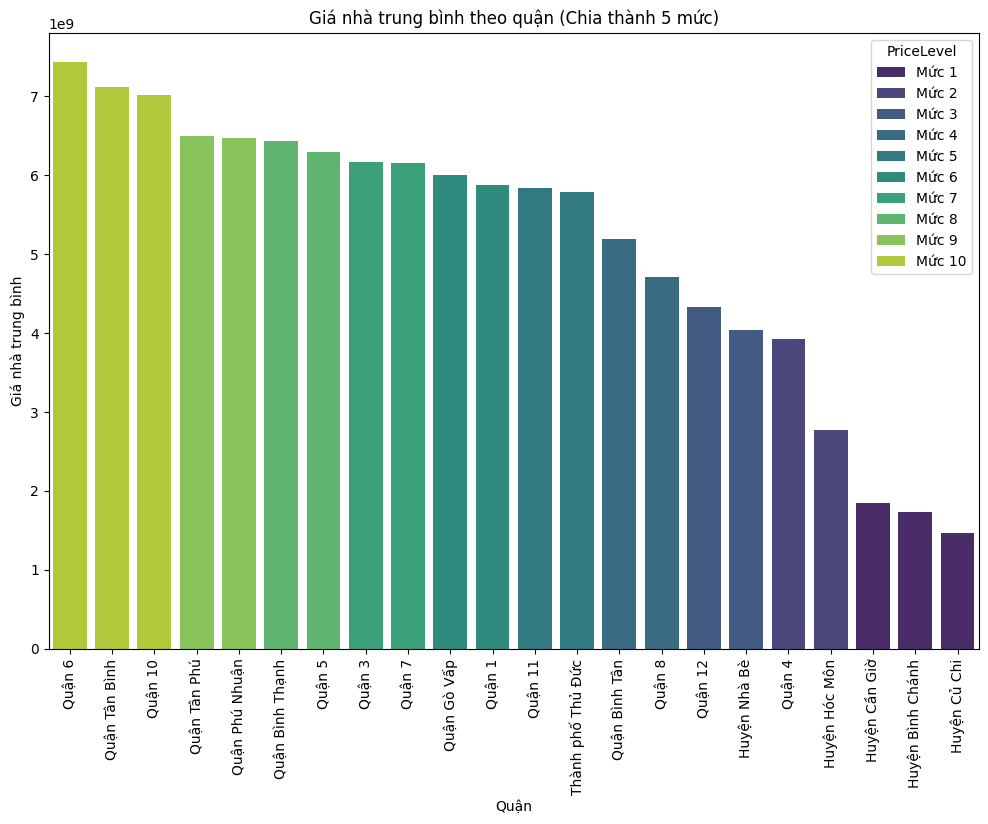

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc dữ liệu từ file CSV
df = pd.read_csv('houseDataset.csv')

# Tính giá trị trung bình của giá nhà theo quận
average_price_by_district = df.groupby('district')['Price'].mean().reset_index()

# Sắp xếp theo giá nhà trung bình giảm dần
average_price_by_district = average_price_by_district.sort_values(by='Price', ascending=False)

# Chia các quận thành 10 phần (mức) theo giá nhà trung bình
average_price_by_district['PriceLevel'] = pd.qcut(
    average_price_by_district['Price'],
    q=10,
    labels=[f'Mức {i+1}' for i in range(10)]
)

# Hiển thị kết quả để kiểm tra
print(average_price_by_district)

# Vẽ biểu đồ cột, chia theo các mức giá
plt.figure(figsize=(12, 8))
sns.barplot(
    x='district',
    y='Price',
    hue='PriceLevel',
    data=average_price_by_district,
    palette='viridis'
)

# Thêm tiêu đề và nhãn cho trục
plt.title('Giá nhà trung bình theo quận (Chia thành 5 mức)')
plt.xlabel('Quận')
plt.ylabel('Giá nhà trung bình')
plt.xticks(rotation=90)  # Xoay nhãn trục X nếu cần

# Hiển thị biểu đồ
plt.show()


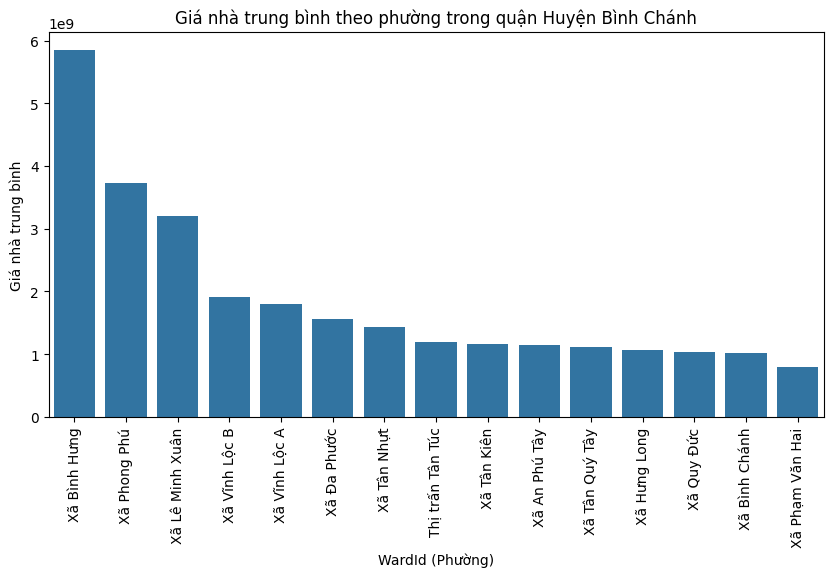

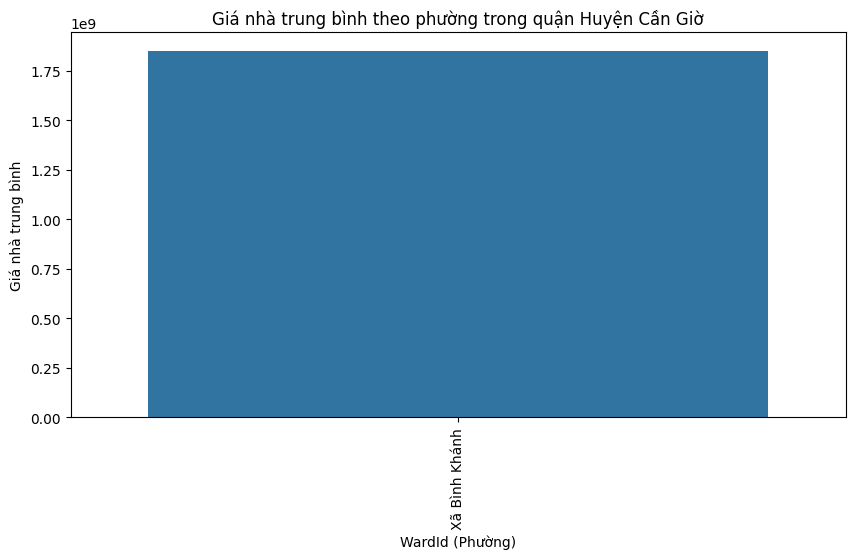

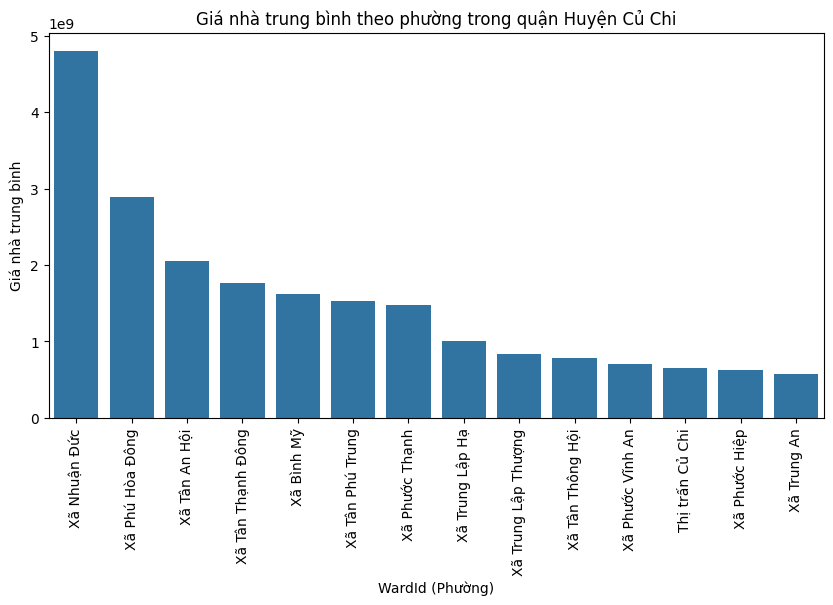

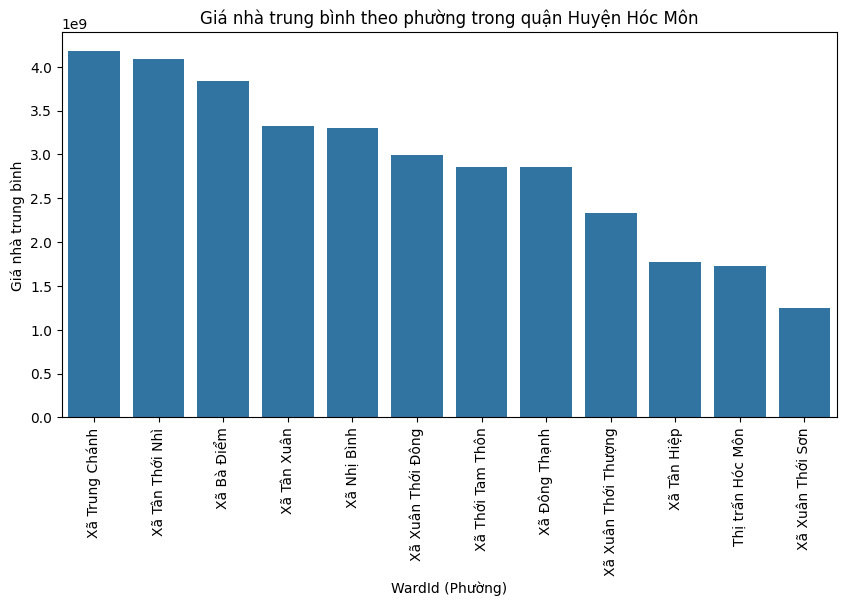

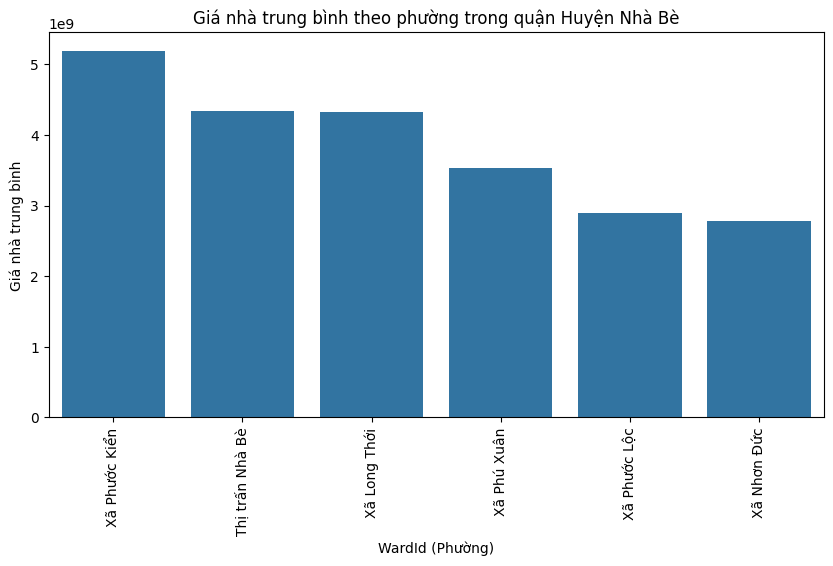

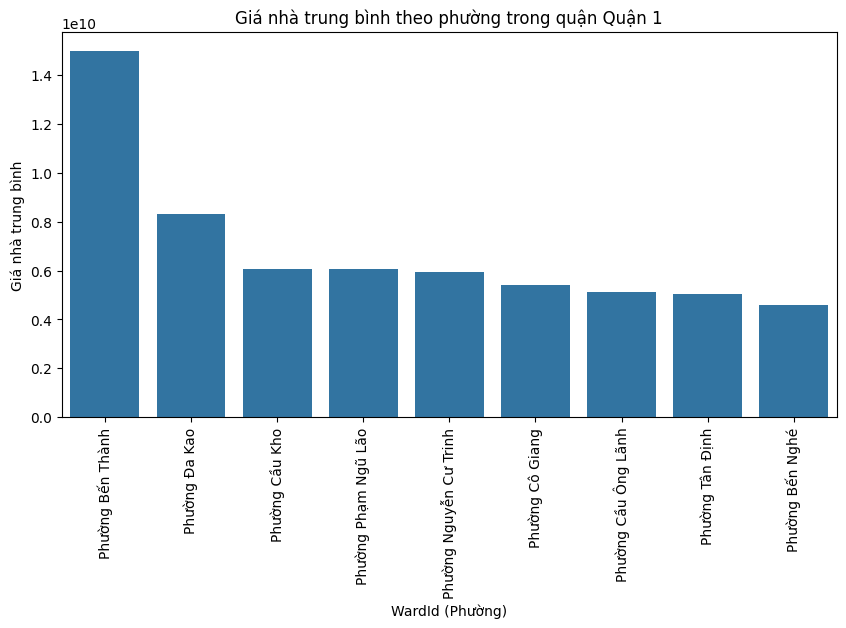

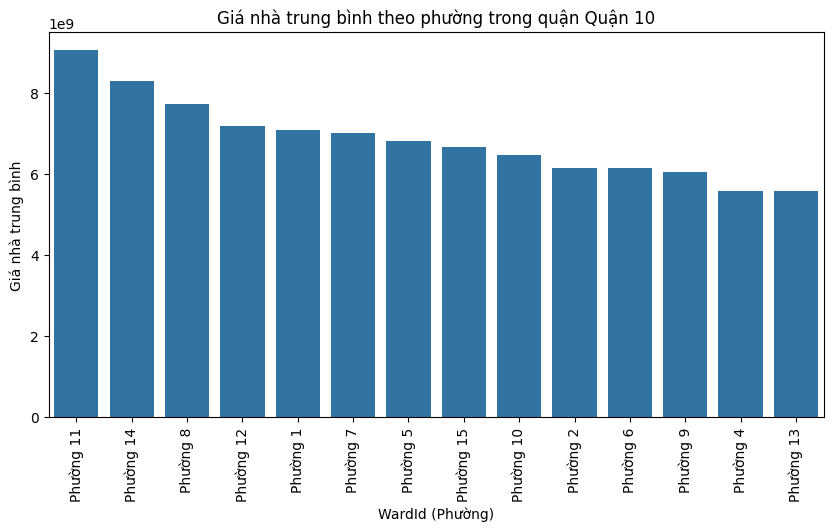

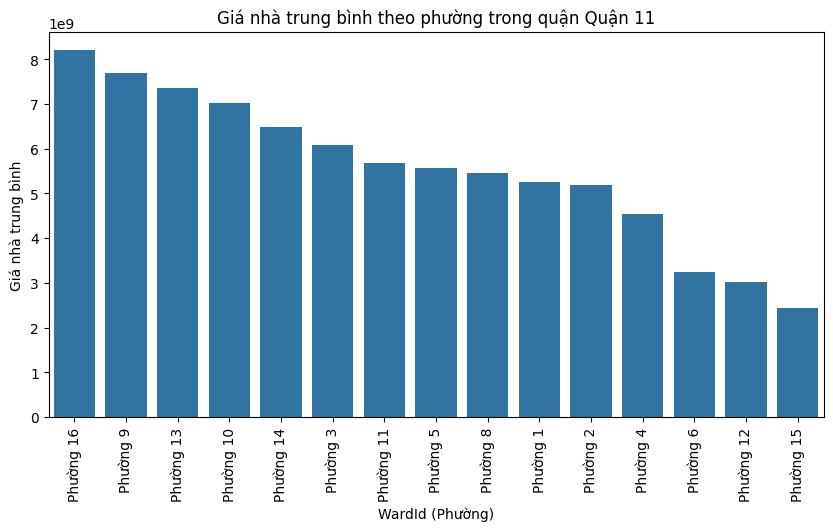

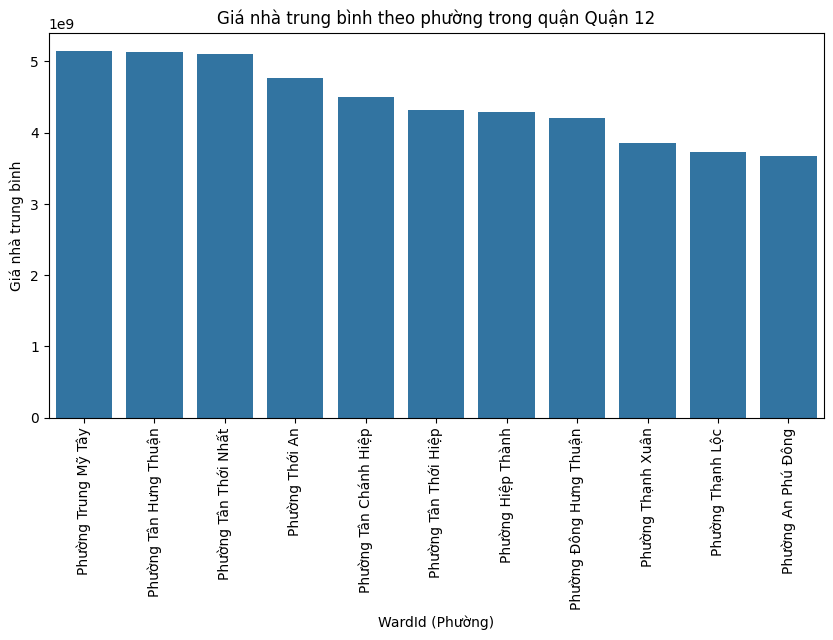

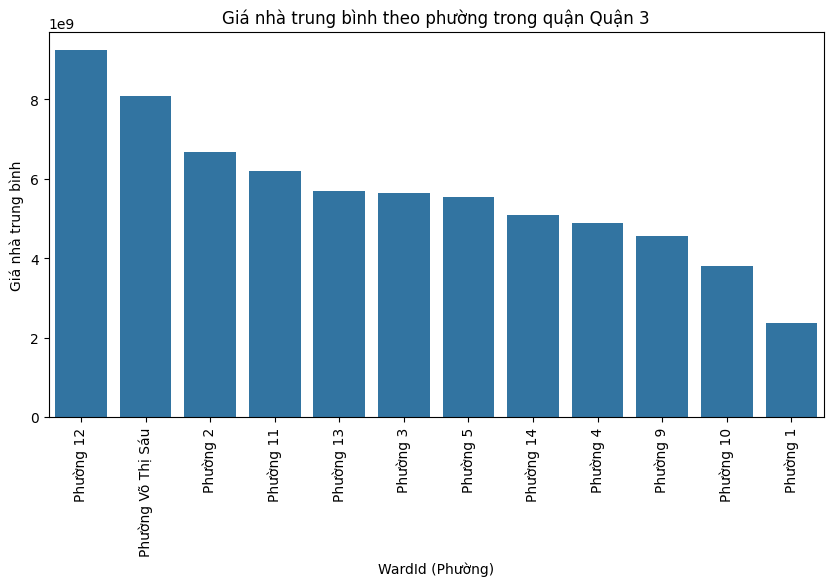

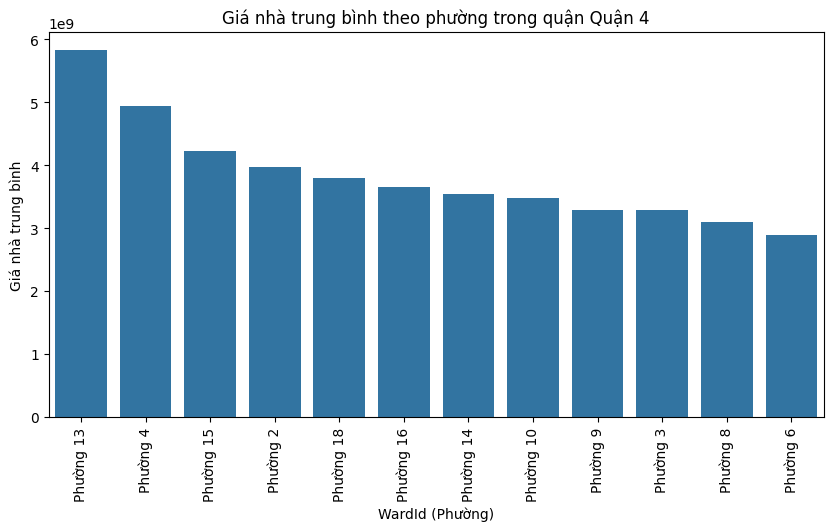

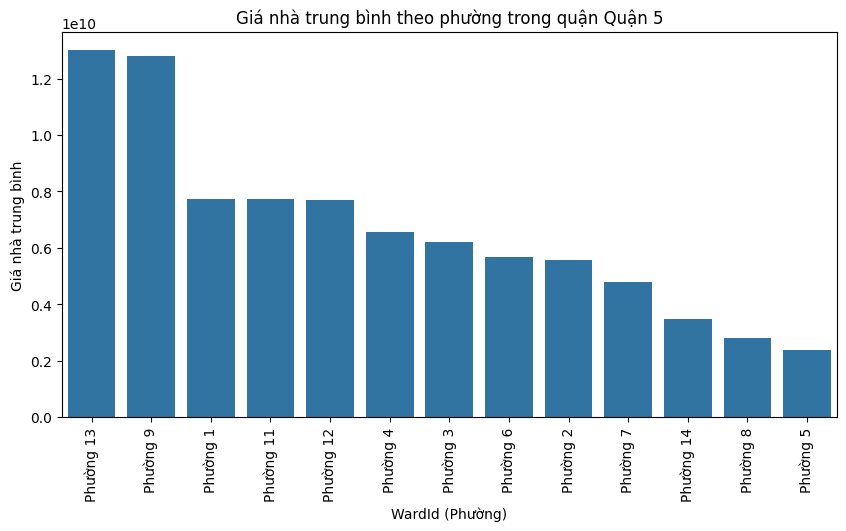

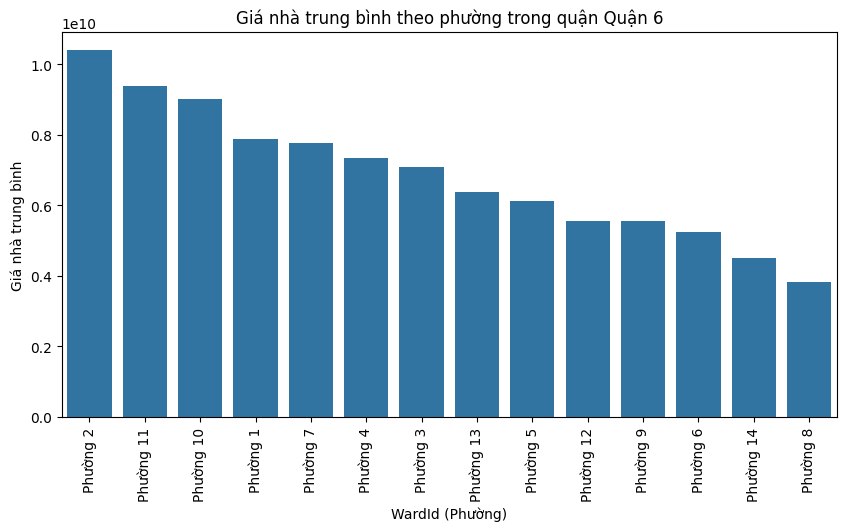

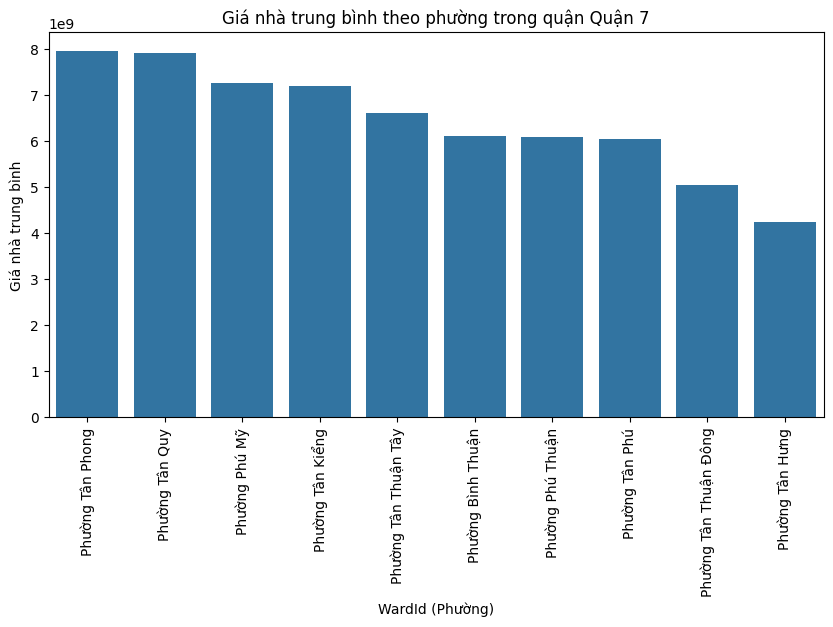

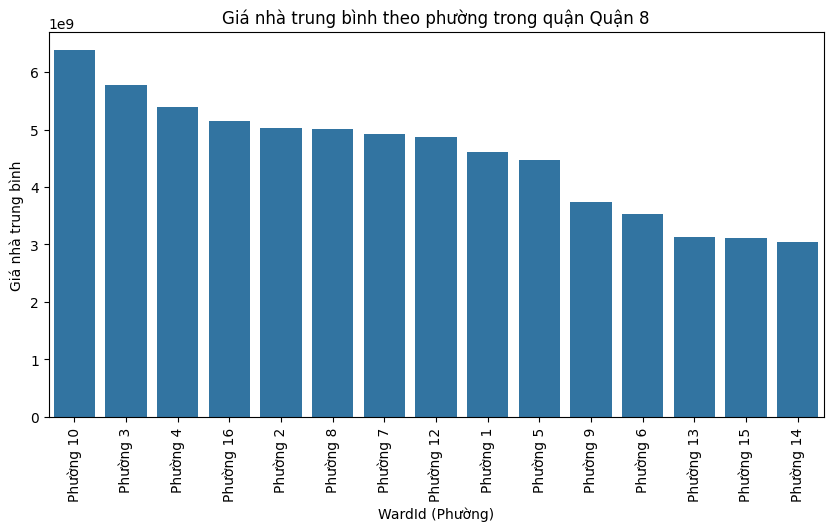

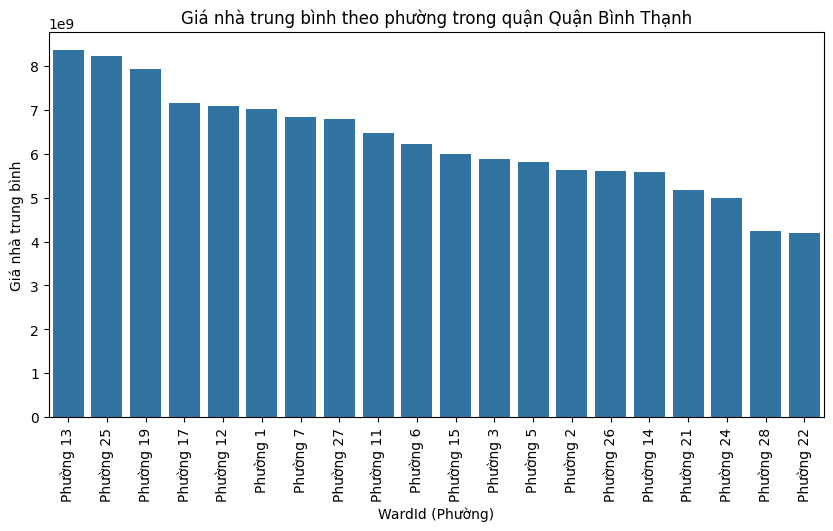

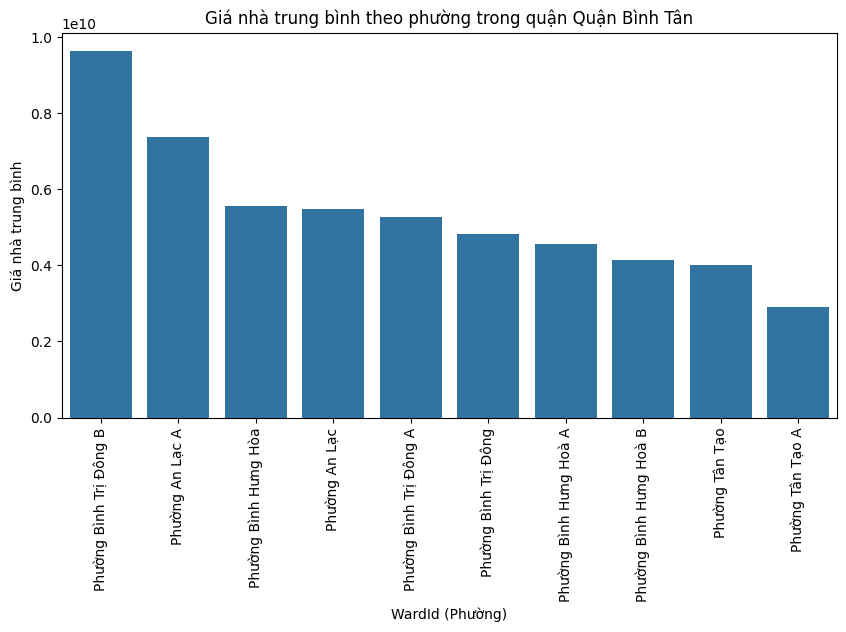

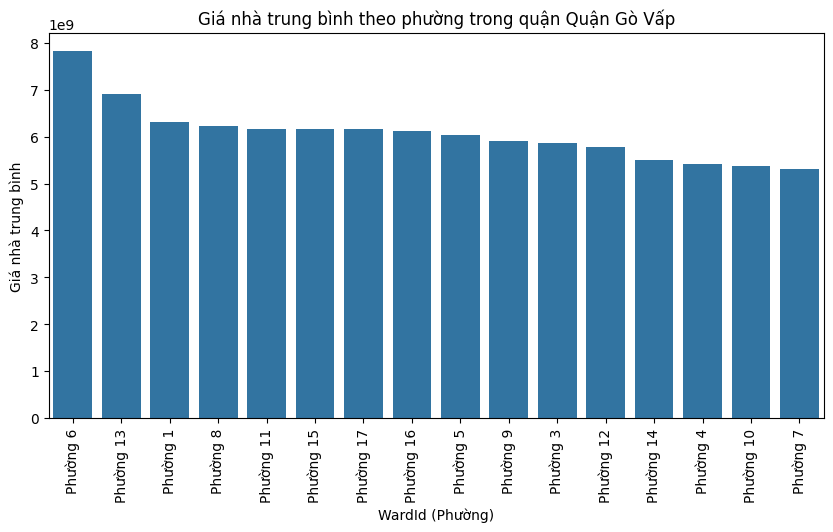

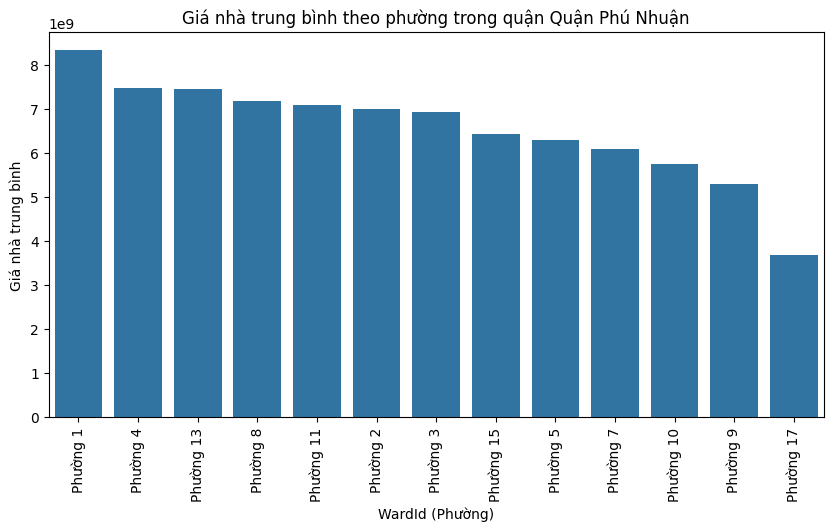

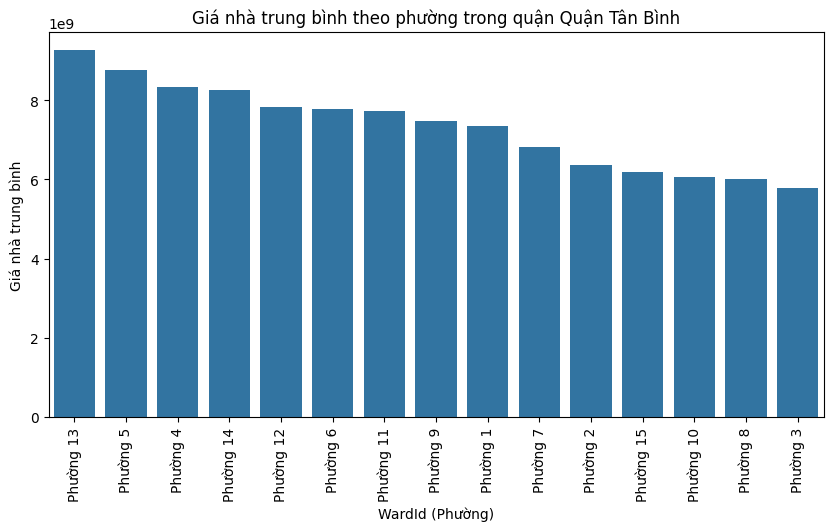

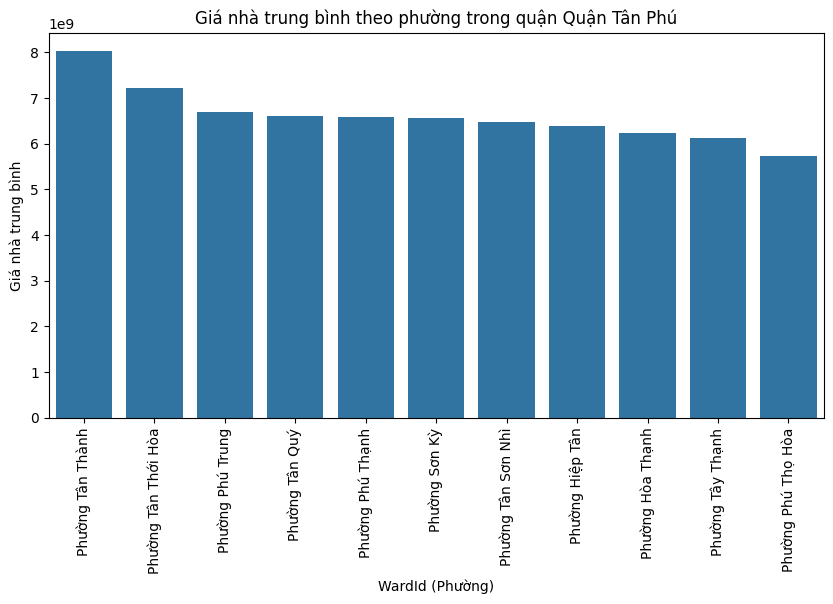

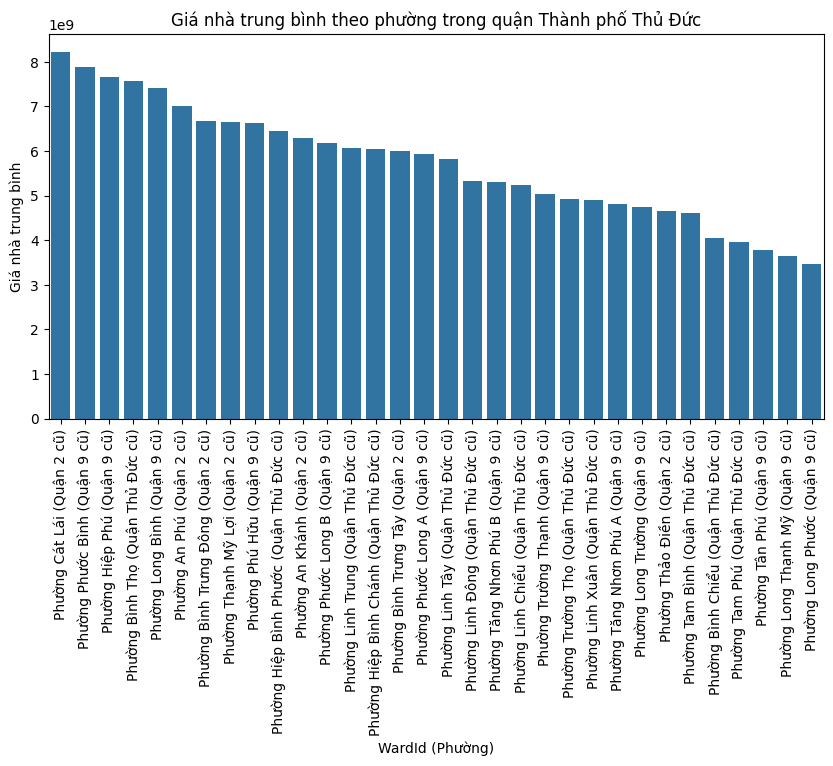

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tính giá nhà trung bình theo quận và phường
average_price_by_district_and_ward = df.groupby(['district', 'ward'])['Price'].mean().reset_index()

# Lấy danh sách các quận
districts = average_price_by_district_and_ward['district'].unique()

# Tạo một biểu đồ riêng cho từng quận
for district in districts:
    # Lọc dữ liệu cho quận cụ thể và sắp xếp theo thứ tự giảm dần của giá
    district_data = average_price_by_district_and_ward[average_price_by_district_and_ward['district'] == district]
    district_data = district_data.sort_values(by='Price', ascending=False)

    # Vẽ biểu đồ cho quận đó
    plt.figure(figsize=(10, 5))
    sns.barplot(x='ward', y='Price', data=district_data)
    plt.title(f'Giá nhà trung bình theo phường trong quận {district}')
    plt.xlabel('WardId (Phường)')
    plt.ylabel('Giá nhà trung bình')
    plt.xticks(rotation=90)  # Xoay nhãn trục X để dễ đọc
    plt.show()


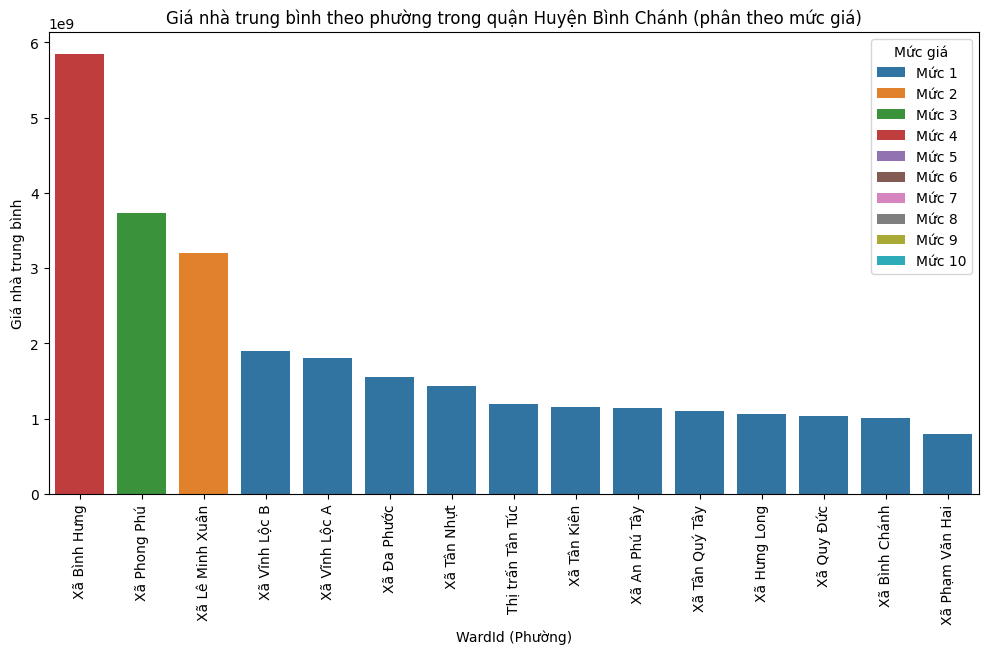

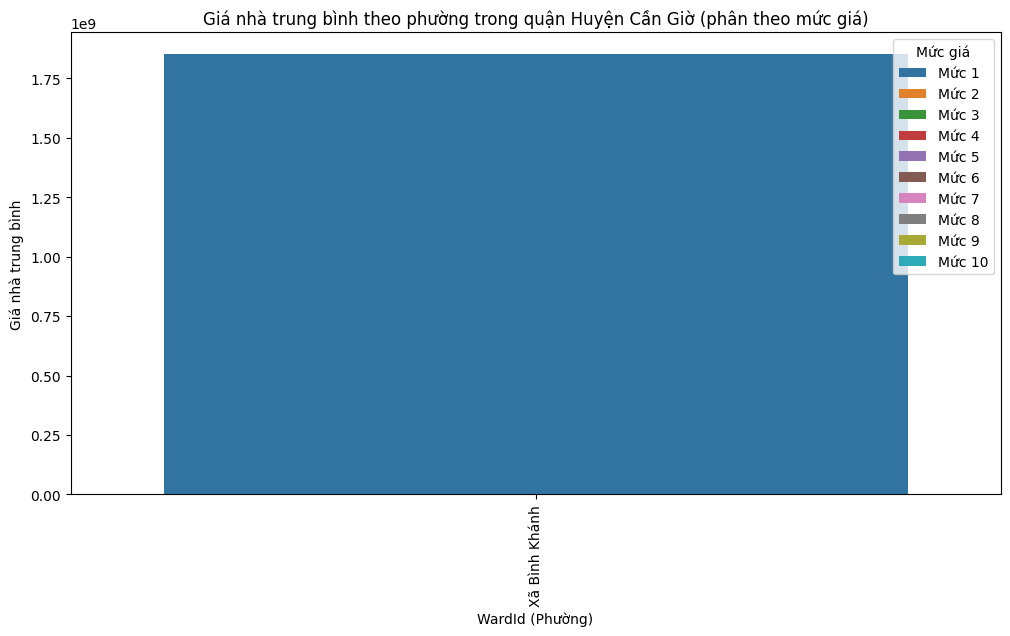

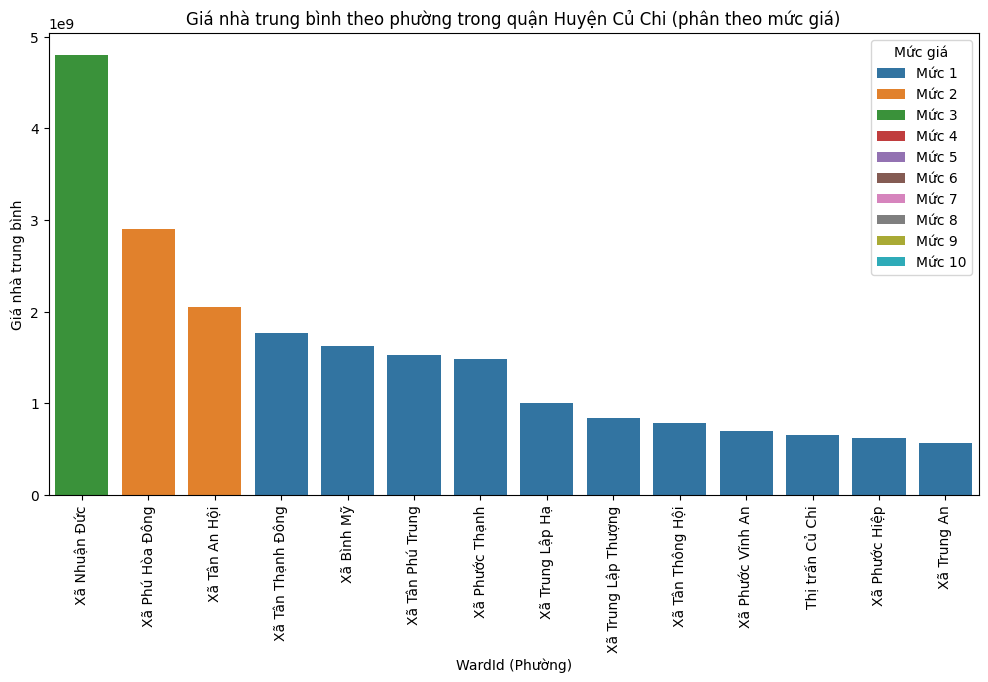

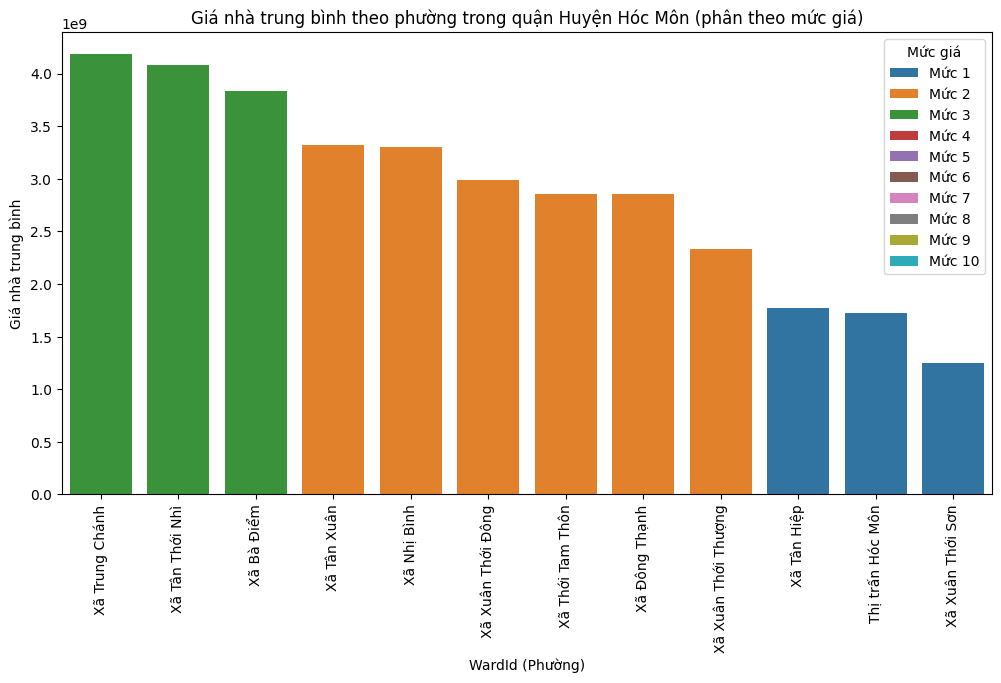

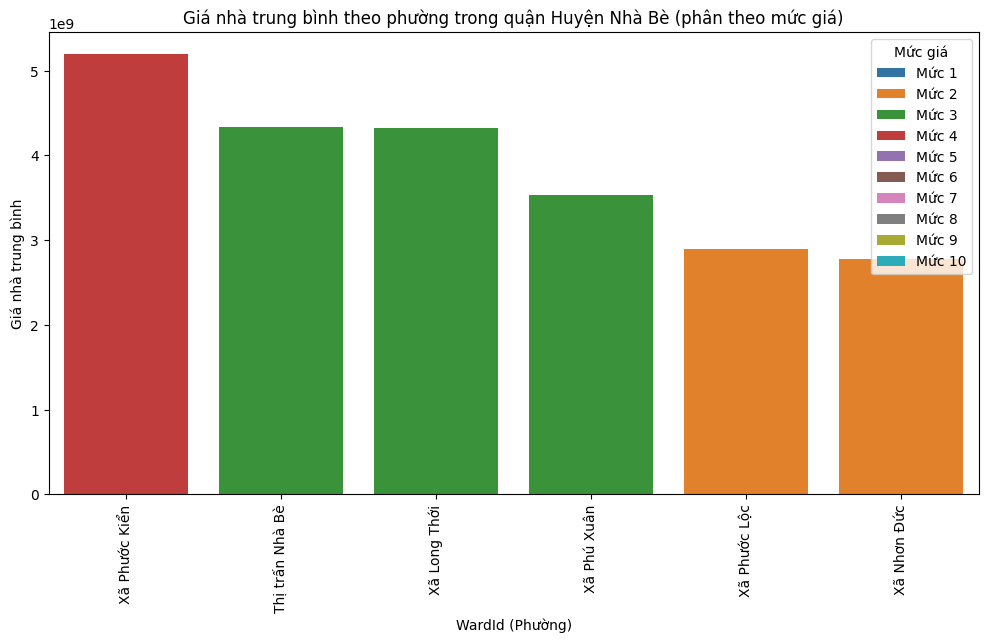

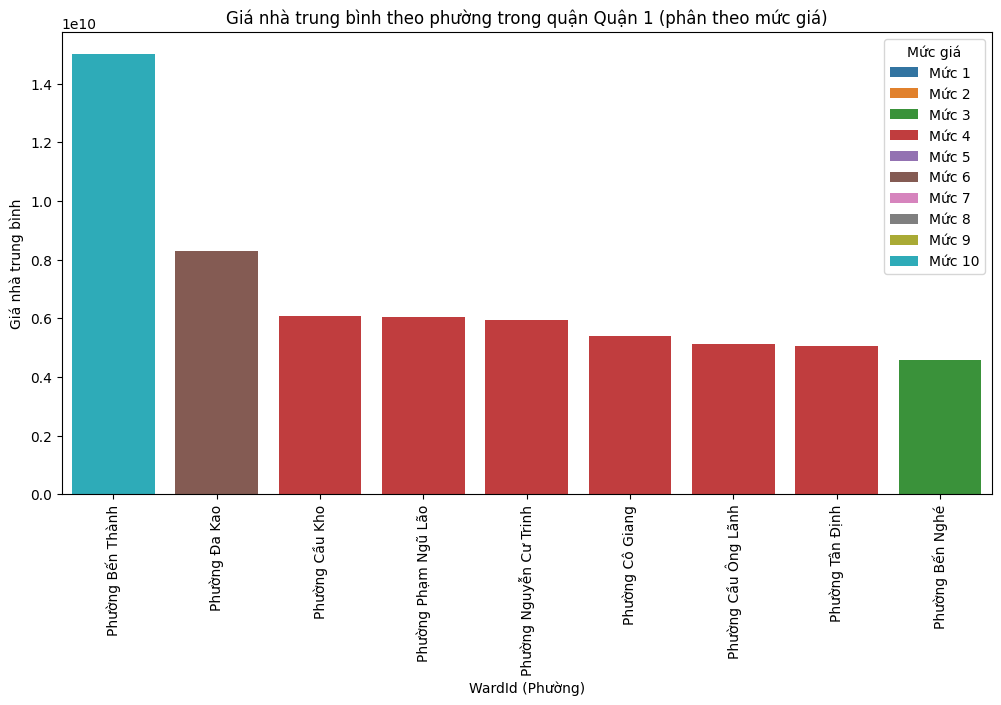

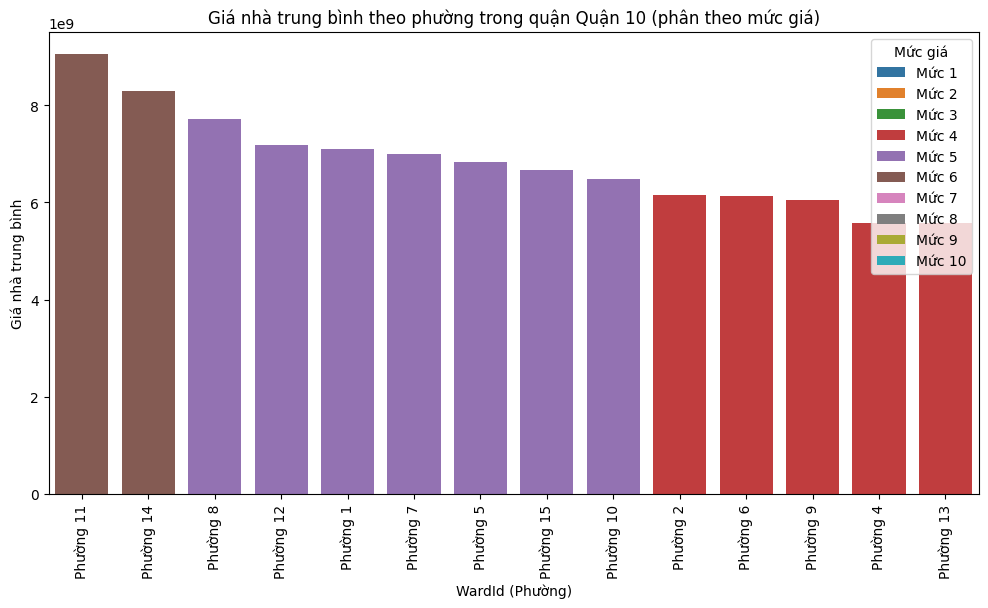

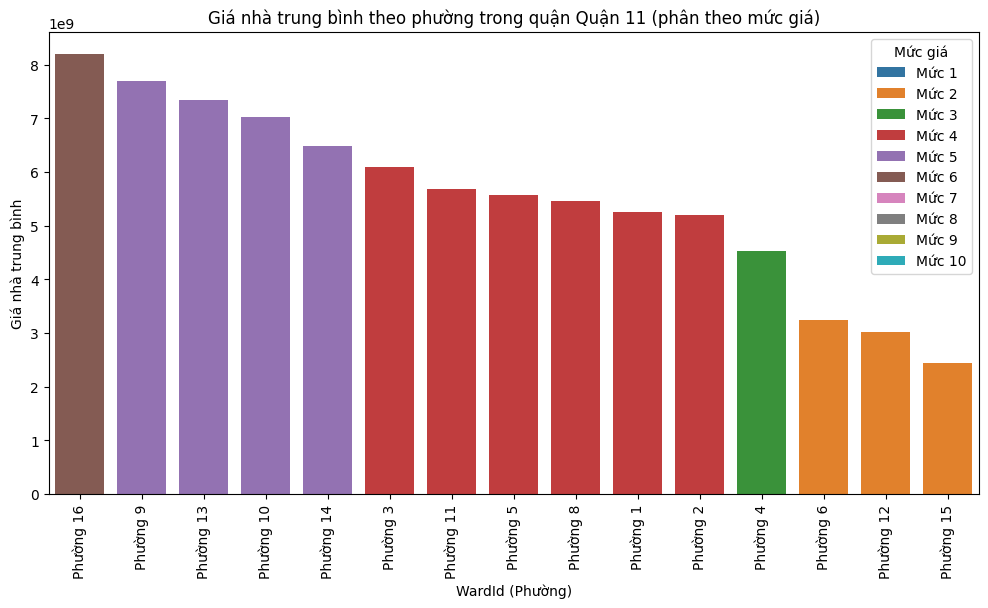

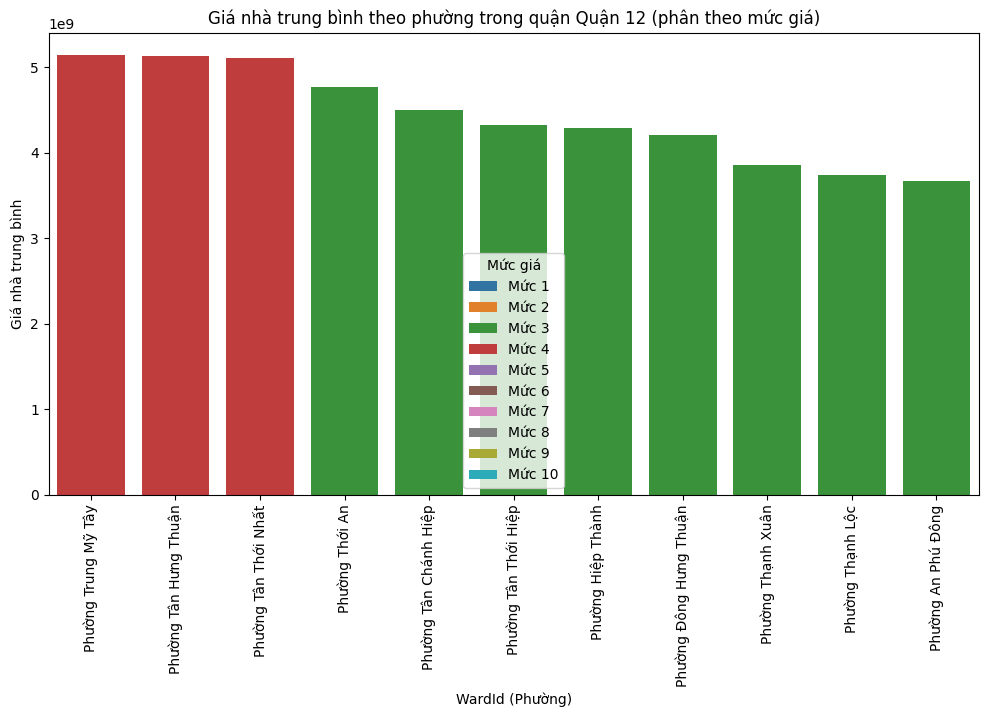

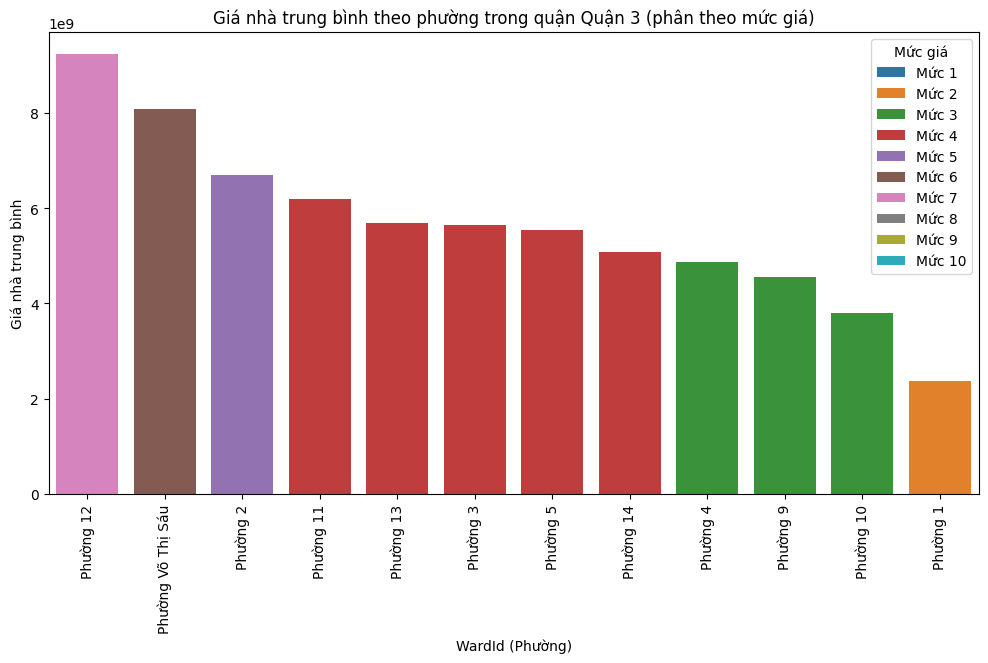

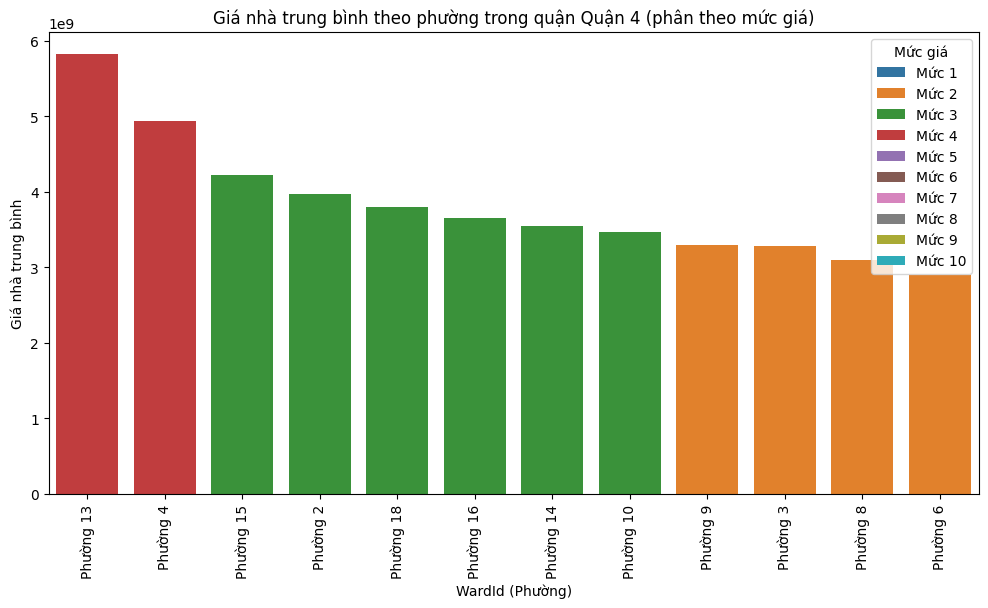

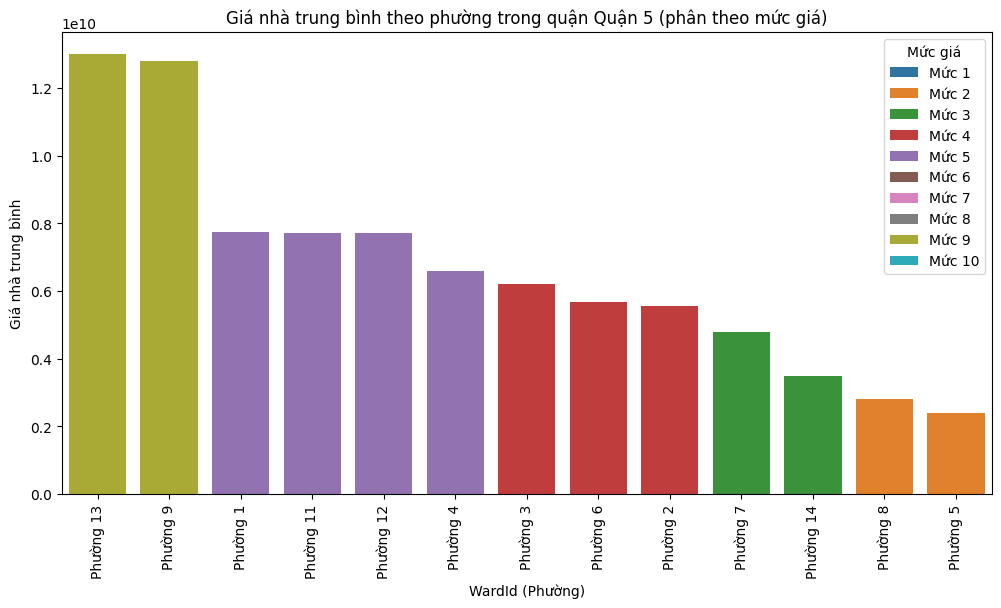

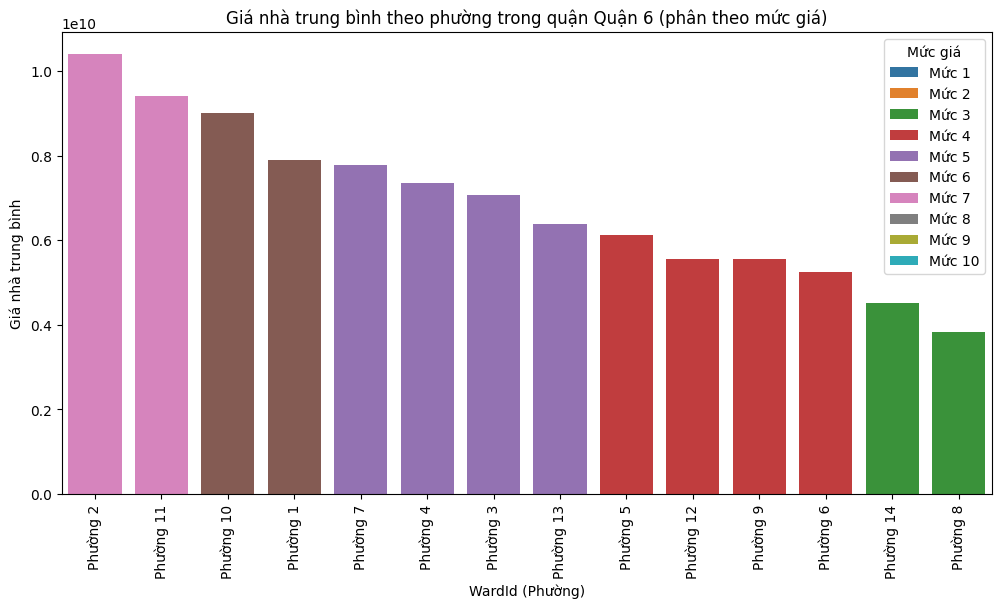

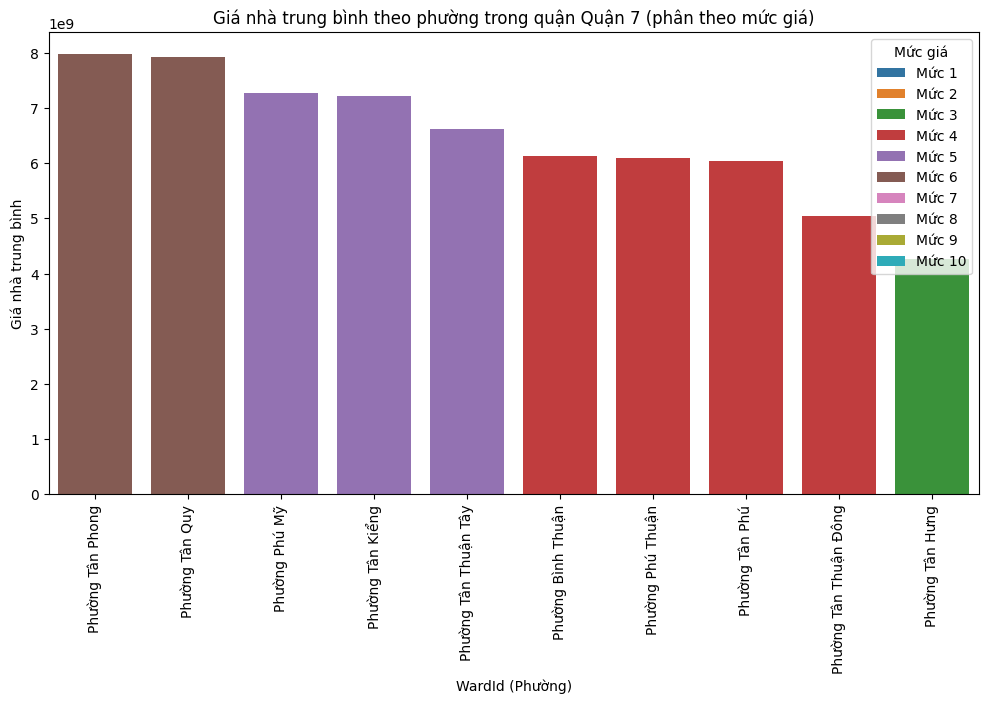

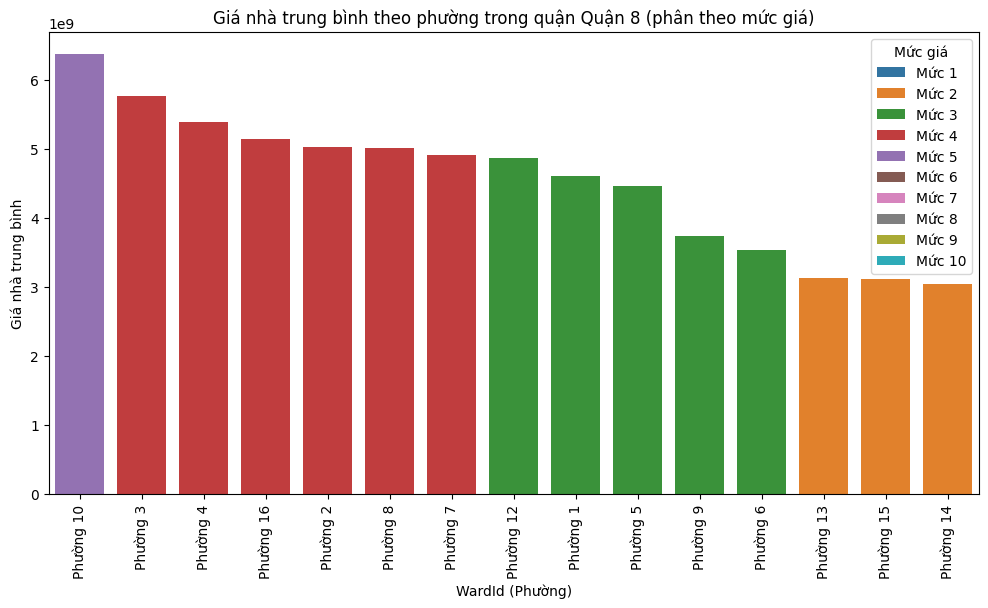

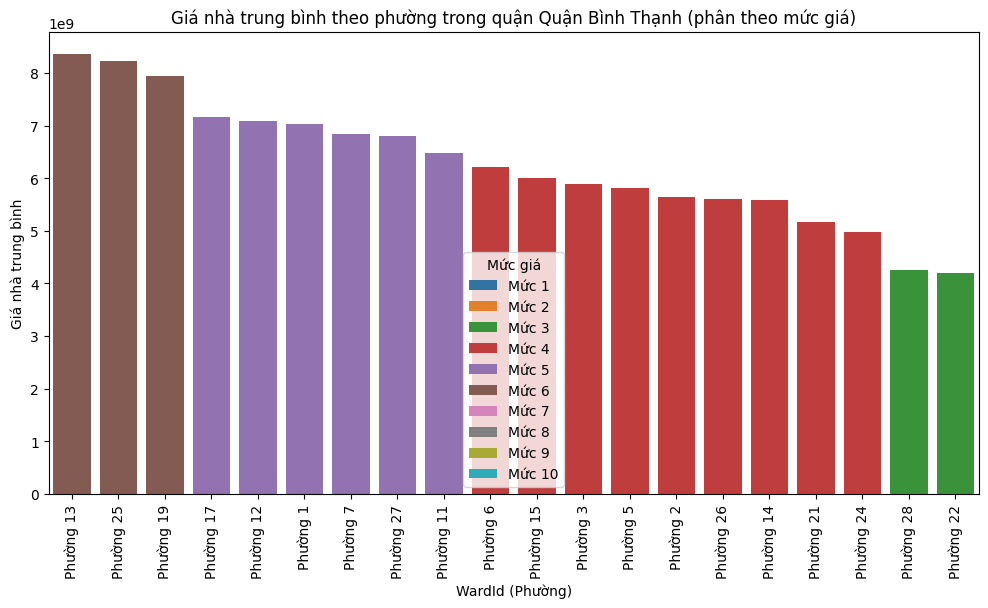

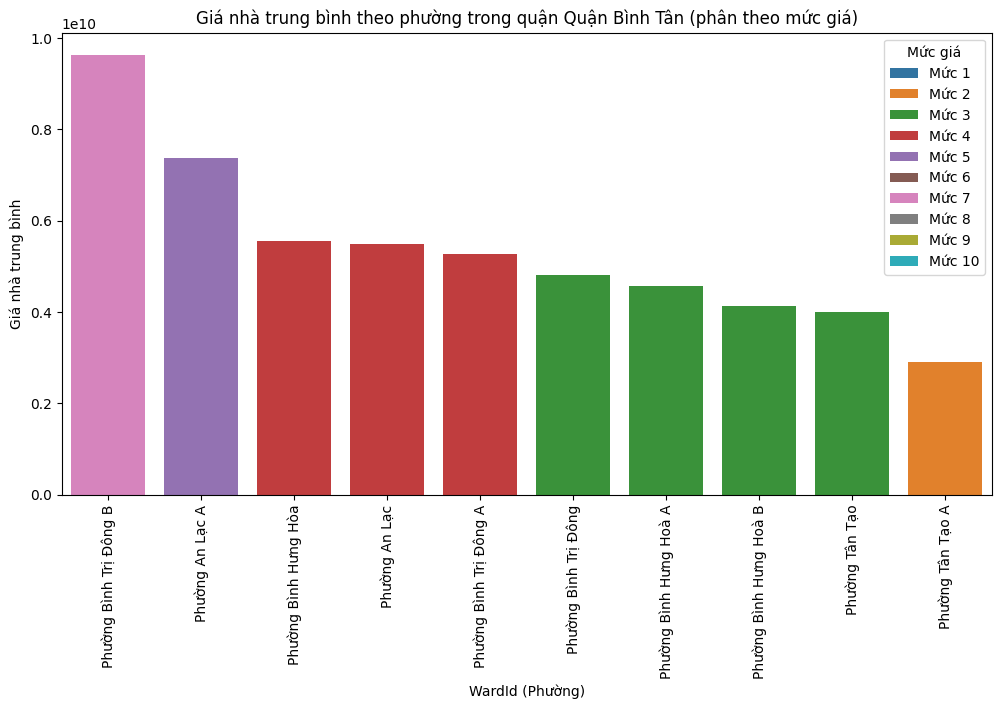

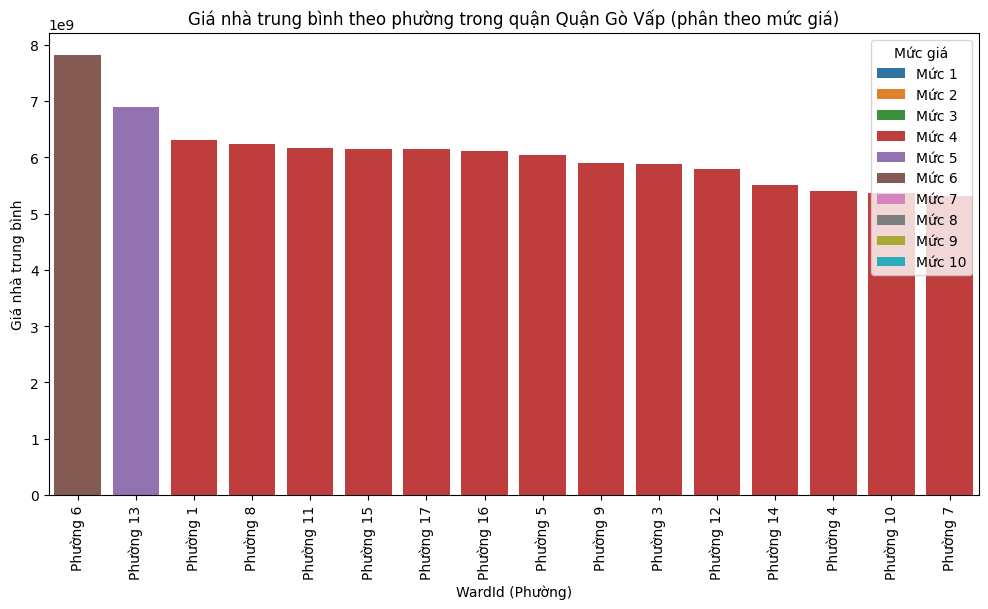

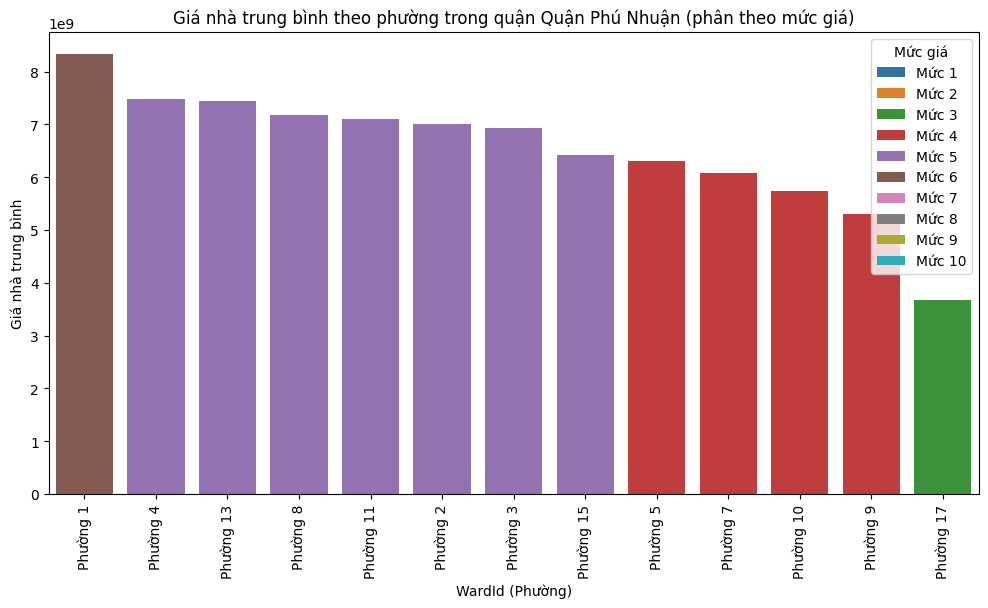

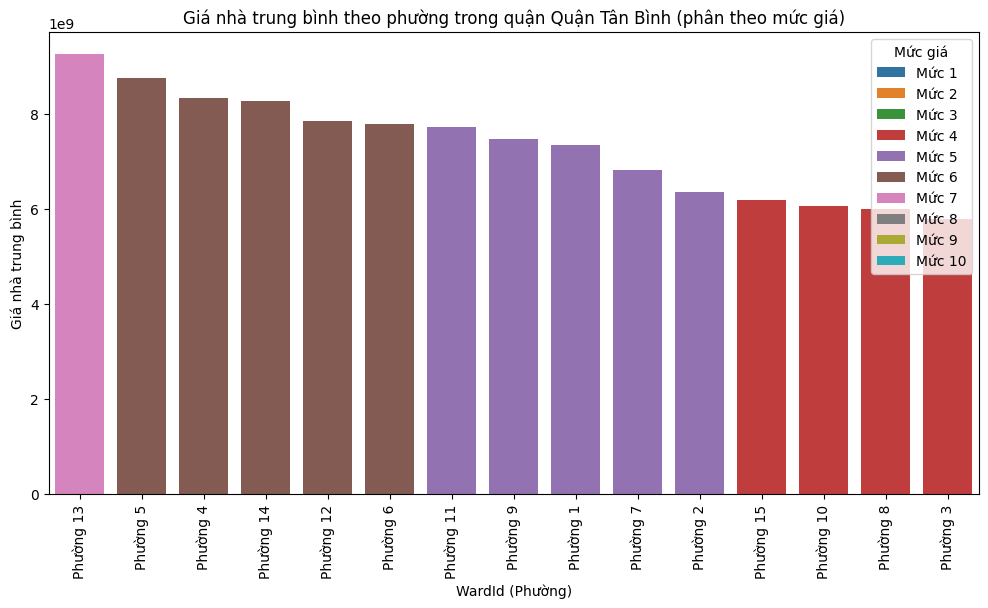

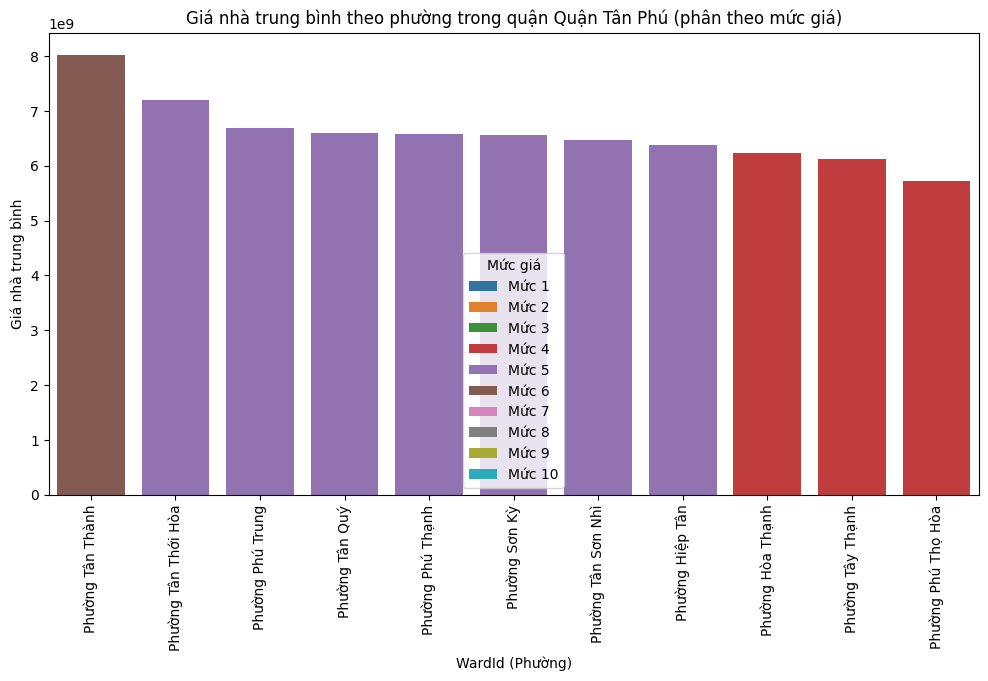

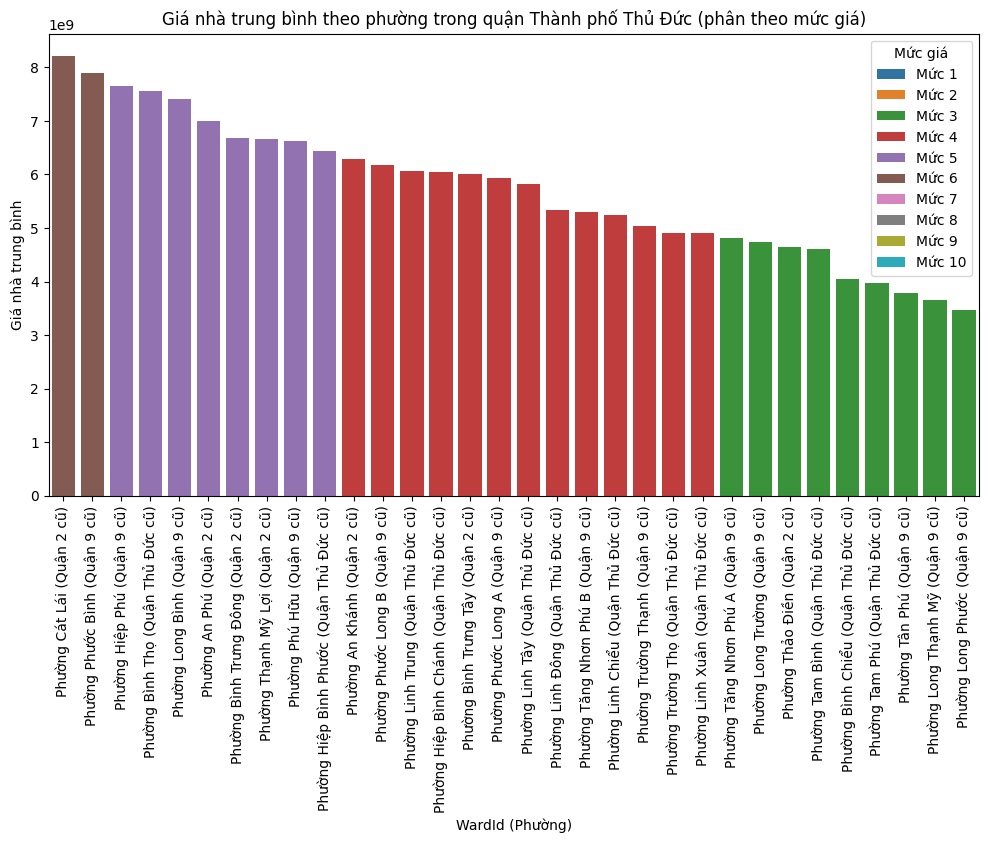

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Tính giá nhà trung bình theo quận và phường
average_price_by_district_and_ward = df.groupby(['district', 'ward'])['Price'].mean().reset_index()

# Chia giá nhà trung bình thành 10 mức
average_price_by_district_and_ward['PriceRange'] = pd.cut(
    average_price_by_district_and_ward['Price'],
    bins=10,  # Số lượng mức
    labels=[f'Mức {i+1}' for i in range(10)]
)

# Lấy danh sách các quận
districts = average_price_by_district_and_ward['district'].unique()

# Tạo một biểu đồ riêng cho từng quận, phân biệt theo mức giá
for district in districts:
    # Lọc dữ liệu cho quận cụ thể và sắp xếp theo thứ tự giảm dần của giá
    district_data = average_price_by_district_and_ward[average_price_by_district_and_ward['district'] == district]
    district_data = district_data.sort_values(by='Price', ascending=False)

    # Vẽ biểu đồ cho quận đó, sử dụng hue để phân biệt các mức giá
    plt.figure(figsize=(12, 6))
    sns.barplot(x='ward', y='Price', hue='PriceRange', data=district_data)
    plt.title(f'Giá nhà trung bình theo phường trong quận {district} (phân theo mức giá)')
    plt.xlabel('WardId (Phường)')
    plt.ylabel('Giá nhà trung bình')
    plt.xticks(rotation=90)  # Xoay nhãn trục X để dễ đọc
    plt.legend(title='Mức giá')
    plt.show()


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
import joblib

# 1. Đọc dữ liệu từ CSV và chia thành X và y
df = pd.read_csv('houseDataset.csv')
X = df[['WardId', 'DistrictId', 'Size', 'Rooms', 'Toilets', 'Floors', 'Type', 'FurnishingSell', 'Urgent', 'Characteristics']]
y = df['Price']

# 2. Chuyển đổi các cột phân loại sử dụng LabelEncoder
categorical_features = ['Type', 'FurnishingSell', 'Characteristics', 'Urgent', 'WardId', 'DistrictId']
label_encoders = {}

for feature in categorical_features:
    le = LabelEncoder()
    X[feature] = le.fit_transform(X[feature].astype(str))
    label_encoders[feature] = le

# 3. Xác định các cột số
numerical_features = ['Size', 'Rooms', 'Toilets', 'Floors']

# 4. Chuẩn hóa các cột số
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# 5. Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Tạo và huấn luyện mô hình Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# 7. Lưu mô hình đã huấn luyện và các bộ chuyển đổi
joblib.dump({
    'model': model,
    'scaler': scaler,
    'label_encoders': label_encoders
}, 'house_price_model.pkl')


C:\Users\Admin\AppData\Local\Temp\ipykernel_584\1443513575.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[feature] = le.fit_transform(X[feature].astype(str))
C:\Users\Admin\AppData\Local\Temp\ipykernel_584\1443513575.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[feature] = le.fit_transform(X[feature].astype(str))
C:\Users\Admin\AppData\Local\Temp\ipykernel_584\1443513575.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

['house_price_model.pkl']

In [2]:
# Đọc dữ liệu ngôi nhà mới vào một DataFrame
new_house = pd.DataFrame({
    'WardId': [166],
    'DistrictId': [12],
    'Size': [80],
    'Rooms': [8],
    'Toilets': [6],
    'Floors': [4],
    'Type': ['Nhà ngõ, hẻm'],
    'FurnishingSell': ['Nội thất đầy đủ'],
    'Urgent': ['0'],  
    'Characteristics': ['Hẻm xe hơi,Nhà nở hậu'],
})

# 8. Tải lại mô hình đã lưu
loaded_model = joblib.load('house_price_model.pkl')

# 9. Dự đoán giá cho ngôi nhà mới
predicted_price = loaded_model.predict(new_house)
print(f"Giá dự đoán cho ngôi nhà mới là: {predicted_price[0]:,.0f} VND")


AttributeError: 'dict' object has no attribute 'predict'